<a href="https://colab.research.google.com/github/BrainConnection/Qiskit/blob/main/Project%20Quantum%20Challenge/Quantum%20Challenge%202023%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting

In [20]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install matplotlib

In [39]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import C3XGate, SwapGate

In [3]:
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

In [4]:
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")

sampler = Sampler(backend=backend)

#1. Fair Quantum Coin Operator & Four-Sided Fair Quantum Coin Operator

1) Quantum Coin State

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


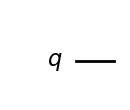

In [5]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.draw("mpl")

2) Fair Quantum Coin Operator

Fair Quantum Coin Operator

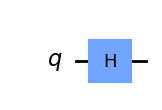

In [6]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.h(0)
Two_Sided_Fair_Coin.draw("mpl")

Verifying Fair Quantum Coin Operator

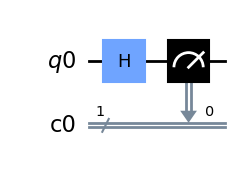

In [7]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
Two_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

Two_Sided_Fair_Coin_Circuit.h(q0)
Two_Sided_Fair_Coin_Circuit.measure(q0, c0)

Two_Sided_Fair_Coin_Circuit.draw("mpl")

>>> Job ID: cl7o83nl4q34kqgj70c0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.499, 0: 0.501}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.499, 0: 0.501}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


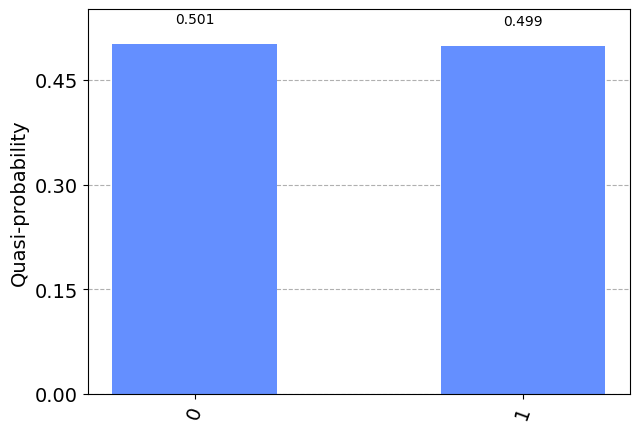

In [8]:
job = sampler.run(Two_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

3) Four-Sided Quantum Coin State

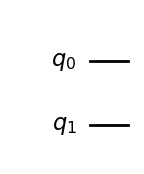

In [9]:
Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.draw("mpl")

4) Four-Sided Fair Quantum Coin Operator

Four-Sided Fair Quantum Coin Operator

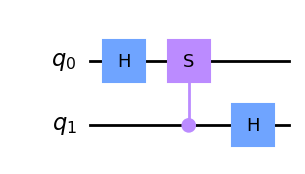

In [10]:
from qiskit.circuit.library.standard_gates import SGate, TGate

csgate = SGate().control(1) # the parameter is the amount of control points you want

Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.h(0)
Four_Sided_Fair_Coin.append(csgate, [1, 0])
Four_Sided_Fair_Coin.h(1)

Four_Sided_Fair_Coin.draw("mpl")

Verifying Four-Sided Fair Quantum Coin Operator

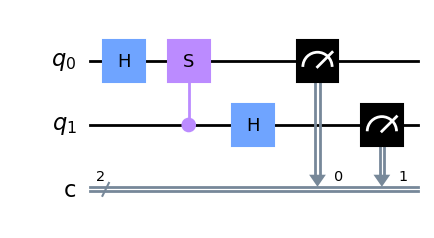

In [11]:
qubits = QuantumRegister(2, 'q')
clbits = ClassicalRegister(2, 'c')
Four_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,q1,) = qubits
(c0,c1,) = clbits

Four_Sided_Fair_Coin_Circuit.h(q0)
Four_Sided_Fair_Coin_Circuit.append(csgate, [q1, q0])
Four_Sided_Fair_Coin_Circuit.h(q1)
Four_Sided_Fair_Coin_Circuit.measure(qubits, clbits)

Four_Sided_Fair_Coin_Circuit.draw("mpl")

>>> Job ID: cl7o84fl4q34kqgj70qg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.24676, 0: 0.25248, 2: 0.25087, 3: 0.24989}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.24676, 0: 0.25248, 2: 0.25087, 3: 0.24989}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


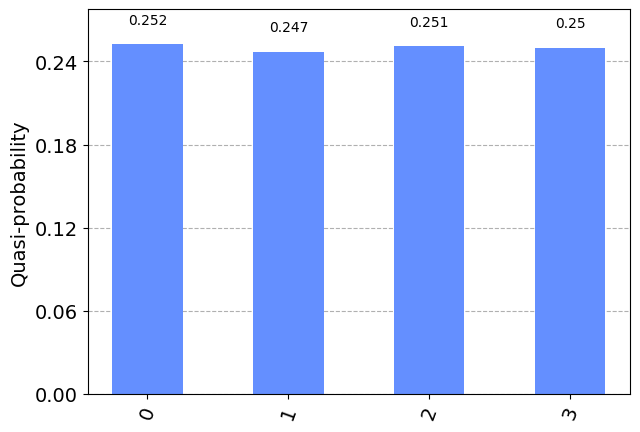

In [12]:
job = sampler.run(Four_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

5) Fairness Check

all matrix elements of each operator have same absolute value, thus unbiased coin

#2. Location on the Board

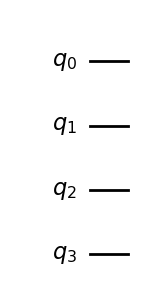

In [13]:
qreg_q = QuantumRegister(4, 'q')
Board = QuantumCircuit(qreg_q)

Board.draw("mpl")

#3. Quantum Coin with Shift Operator

1) Shift Operator

Right Shift Operator

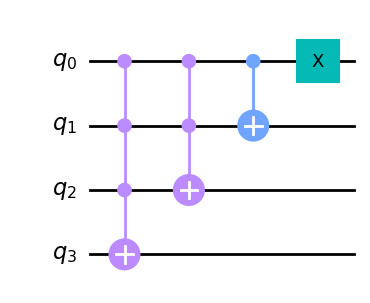

In [14]:
qreg_q = QuantumRegister(4, 'q')
Shift = QuantumCircuit(qreg_q)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.draw("mpl")

Verifying Right Shift Operator

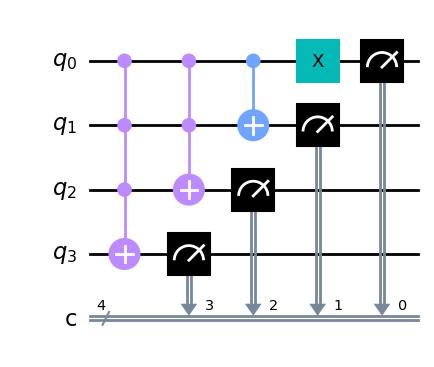

In [15]:
from qiskit.circuit.library.standard_gates import C3XGate

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
Shift = QuantumCircuit(qreg_q, creg_c)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.measure(qreg_q, creg_c)

Shift.draw("mpl")

>>> Job ID: cl7o85p6mcdhud4d81og
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


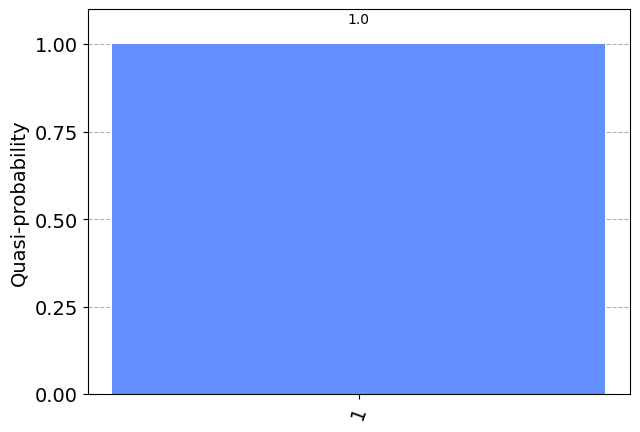

In [16]:
job = sampler.run(Shift, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Right Shift. |0000> -> |0001>
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Shift Operator with Quantum Coin Operator

Shift Operator

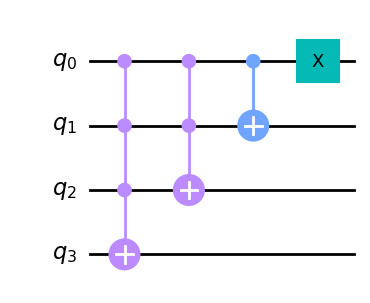

In [51]:
Shift = QuantumCircuit(4)
Shift.append(C3XGate(), [0,1,2,3])
Shift.ccx(0,1,2)
Shift.cx(0,1)
Shift.x(0)

Shift.draw("mpl")

1 Step Board Evolution Operator

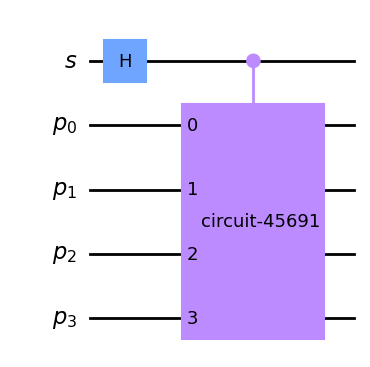

In [53]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.draw("mpl")

N Step Board Evolution Operator

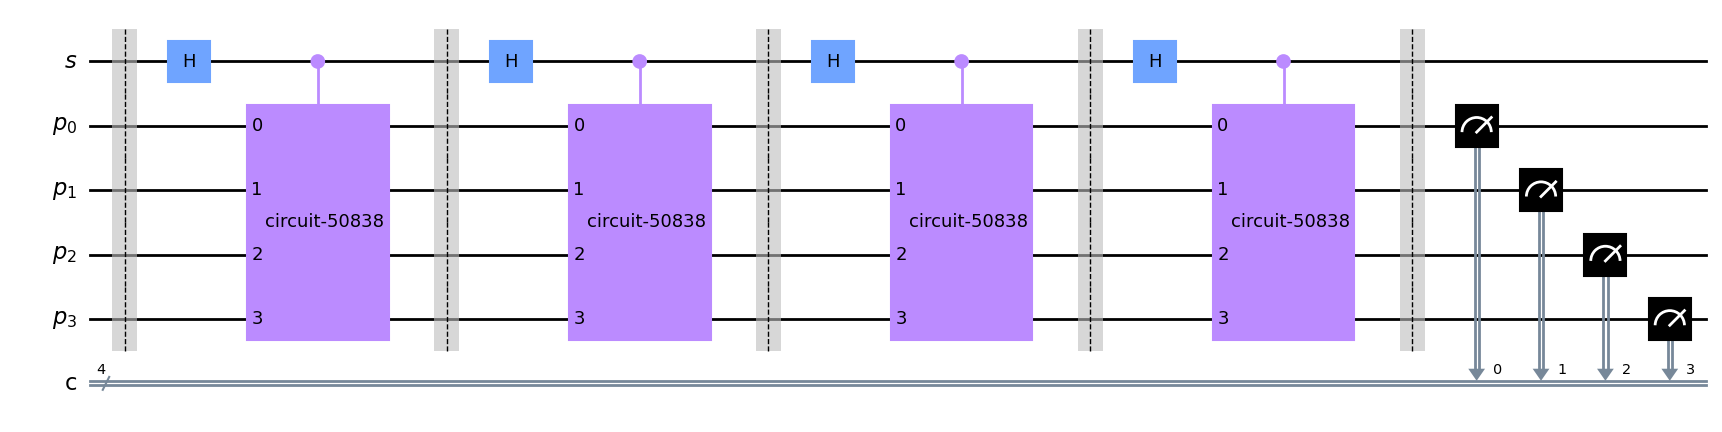

In [56]:
# varying N
N = 4

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl7oej57pau17fl0csg0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.1231, 4: 0.06316, 1: 0.62626, 0: 0.06389, 2: 0.12359}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.1231, 4: 0.06316, 1: 0.62626, 0: 0.06389, 2: 0.12359}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

4


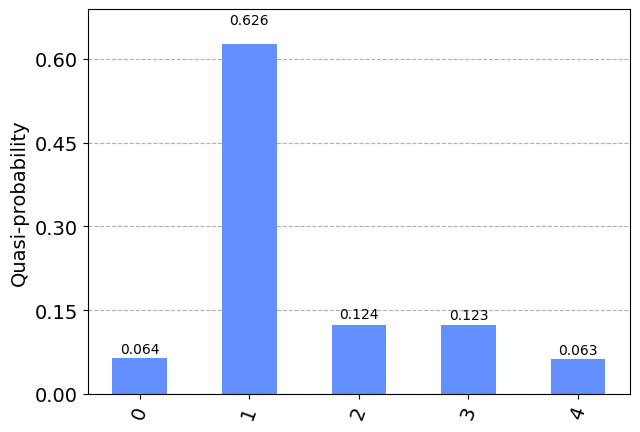

In [23]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying N Step Board Evolution Operator

>>> Job ID: cl7pobp6mcdhud4dvki0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
0
{0: 1.0}


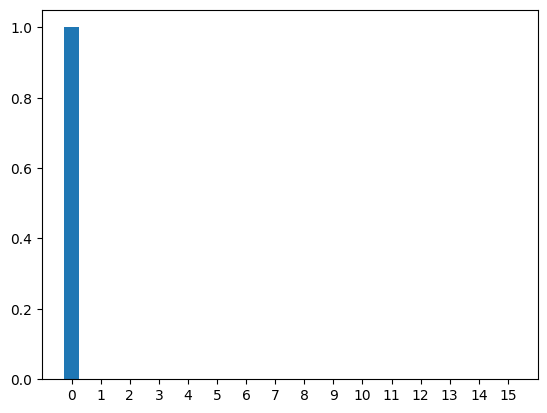



>>> Job ID: cl7podh6mcdhud4dvlqg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.50037, 0: 0.49963}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.50037, 0: 0.49963}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
1
{1: 0.50037, 0: 0.49963}


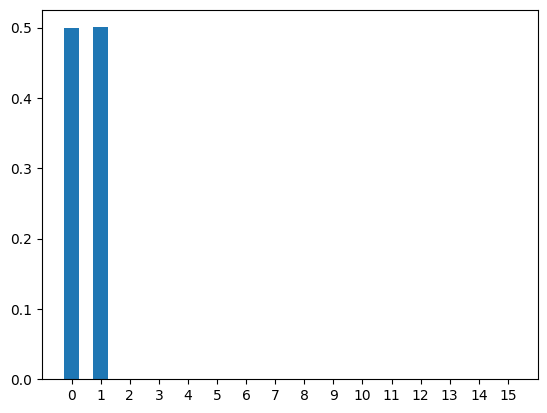



>>> Job ID: cl7poe15o5utp9bpuing
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.49616, 2: 0.25257, 0: 0.25127}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.49616, 2: 0.25257, 0: 0.25127}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
2
{1: 0.49616, 2: 0.25257, 0: 0.25127}


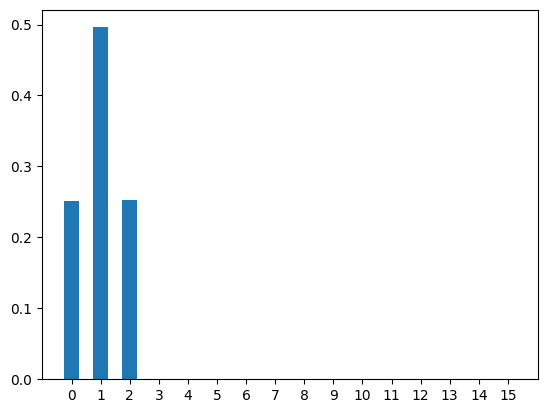



>>> Job ID: cl7poeh5o5utp9bpuiu0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.12651, 0: 0.12581, 2: 0.12373, 1: 0.62395}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.12651, 0: 0.12581, 2: 0.12373, 1: 0.62395}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
3
{3: 0.12651, 0: 0.12581, 2: 0.12373, 1: 0.62395}


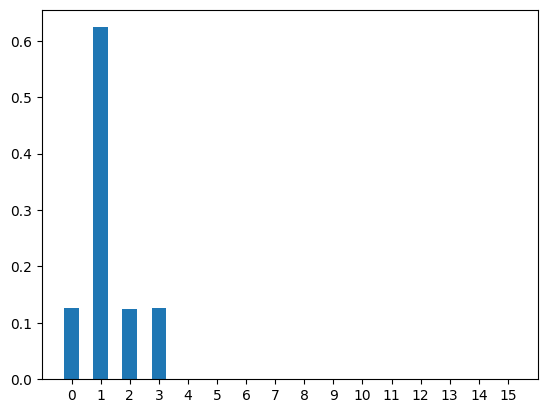



>>> Job ID: cl7pof16mcdhud4dvmh0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.06219, 3: 0.12681, 0: 0.06211, 2: 0.1249, 1: 0.62399}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.06219, 3: 0.12681, 0: 0.06211, 2: 0.1249, 1: 0.62399}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
4
{4: 0.06219, 3: 0.12681, 0: 0.06211, 2: 0.1249, 1: 0.62399}


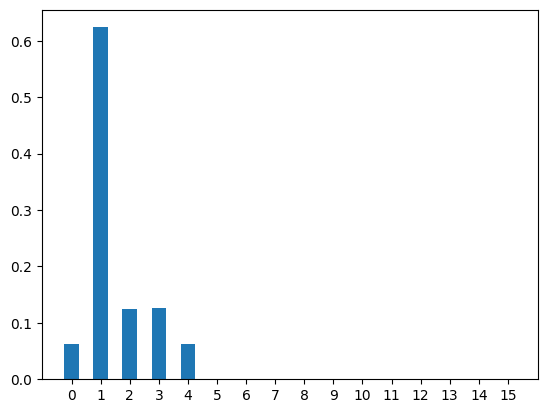



>>> Job ID: cl7poflfa6vtjv8reb5g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.03216, 2: 0.12648, 4: 0.15524, 3: 0.12499, 5: 0.03044, 1: 0.53069}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.03216, 2: 0.12648, 4: 0.15524, 3: 0.12499, 5: 0.03044, 1: 0.53069}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
5
{0: 0.03216, 2: 0.12648, 4: 0.15524, 3: 0.12499, 5: 0.03044, 1: 0.53069}


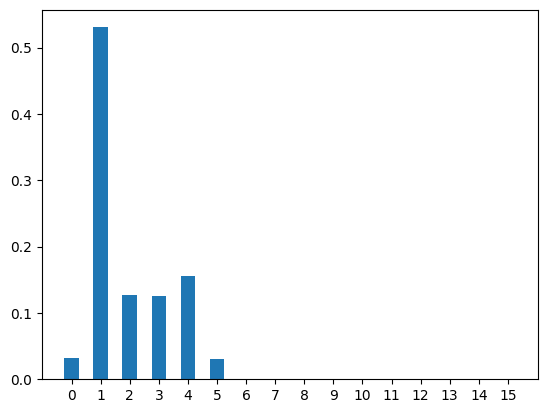



>>> Job ID: cl7pog7l4q34kqgjups0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.40427, 5: 0.15841, 6: 0.01516, 4: 0.08087, 2: 0.20116, 0: 0.01551, 3: 0.12462}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.40427, 5: 0.15841, 6: 0.01516, 4: 0.08087, 2: 0.20116, 0: 0.01551, 3: 0.12462}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
6
{1: 0.40427, 5: 0.15841, 6: 0.01516, 4: 0.08087, 2: 0.20116, 0: 0.01551, 3: 0.12462}


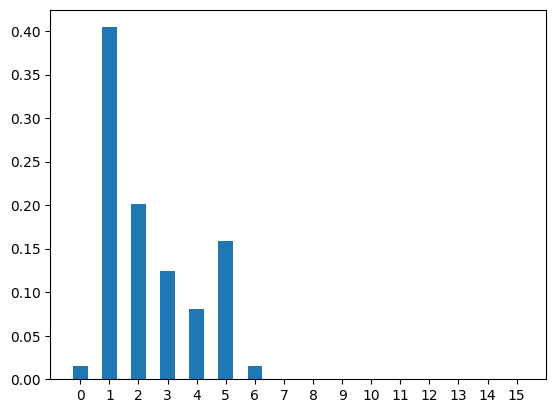



>>> Job ID: cl7pogn75e3r3c6dd870
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{5: 0.03897, 2: 0.32099, 1: 0.29089, 7: 0.00757, 0: 0.00794, 3: 0.13206, 6: 0.13149, 4: 0.07009}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {5: 0.03897, 2: 0.32099, 1: 0.29089, 7: 0.00757, 0: 0.00794, 3: 0.13206, 6: 0.13149, 4: 0.07009}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
7
{5: 0.03897, 2: 0.32099, 1: 0.29089, 7: 0.00757, 0: 0.00794, 3: 0.13206, 6: 0.13149, 4: 0.07009}


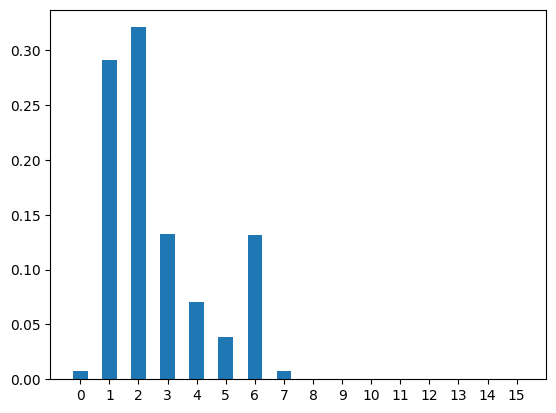



>>> Job ID: cl7poh15o5utp9bpuk10
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.00393, 2: 0.41302, 1: 0.19578, 5: 0.07014, 0: 0.00395, 7: 0.10141, 3: 0.10037, 6: 0.04018, 4: 0.07122}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.00393, 2: 0.41302, 1: 0.19578, 5: 0.07014, 0: 0.00395, 7: 0.10141, 3: 0.10037, 6: 0.04018, 4: 0.07122}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
8
{8: 0.00393, 2: 0.41302, 1: 0.19578, 5: 0.07014, 0: 0.00395, 7: 0.10141, 3: 0.10037, 6: 0.04018, 4: 0.07122}


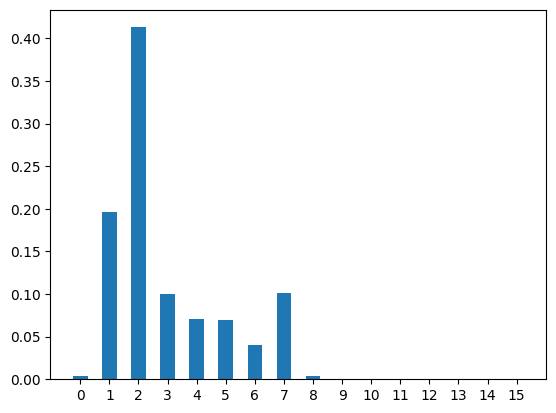



>>> Job ID: cl7pohtfa6vtjv8rec60
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00192, 1: 0.1278, 0: 0.00196, 3: 0.06138, 7: 0.06261, 2: 0.4525, 8: 0.07335, 5: 0.06991, 6: 0.07815, 4: 0.07042}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00192, 1: 0.1278, 0: 0.00196, 3: 0.06138, 7: 0.06261, 2: 0.4525, 8: 0.07335, 5: 0.06991, 6: 0.07815, 4: 0.07042}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
9
{9: 0.00192, 1: 0.1278, 0: 0.00196, 3: 0.06138, 7: 0.06261, 2: 0.4525, 8: 0.07335, 5: 0.06991, 6: 0.07815, 4: 0.07042}


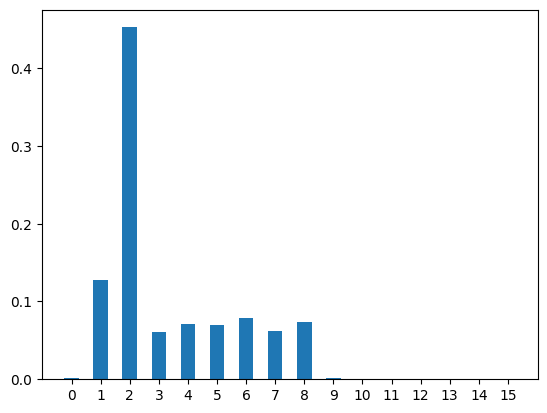



>>> Job ID: cl7poil7pau17fl11es0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00104, 1: 0.08005, 0: 0.00092, 3: 0.06187, 7: 0.06312, 2: 0.43399, 5: 0.07129, 8: 0.08938, 9: 0.0493, 6: 0.05076, 4: 0.09828}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00104, 1: 0.08005, 0: 0.00092, 3: 0.06187, 7: 0.06312, 2: 0.43399, 5: 0.07129, 8: 0.08938, 9: 0.0493, 6: 0.05076, 4: 0.09828}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
10
{10: 0.00104, 1: 0.08005, 0: 0.00092, 3: 0.06187, 7: 0.06312, 2: 0.43399, 5: 0.07129, 8: 0.08938, 9: 0.0493, 6: 0.05076, 4: 0.09828}


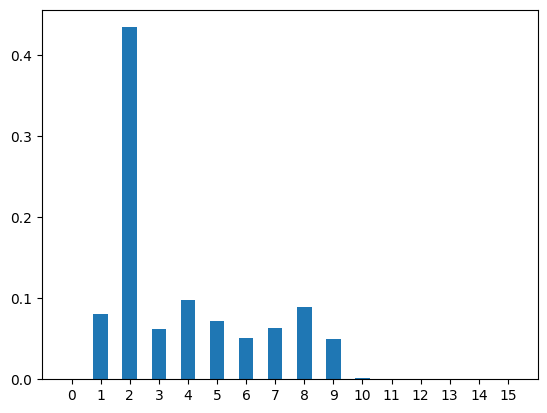



>>> Job ID: cl7poj16mcdhud4dvo6g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.00051, 8: 0.03522, 10: 0.03185, 9: 0.1016, 1: 0.04895, 2: 0.38757, 6: 0.04861, 4: 0.12668, 0: 0.00052, 7: 0.03279, 3: 0.11355, 5: 0.07215}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.00051, 8: 0.03522, 10: 0.03185, 9: 0.1016, 1: 0.04895, 2: 0.38757, 6: 0.04861, 4: 0.12668, 0: 0.00052, 7: 0.03279, 3: 0.11355, 5: 0.07215}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
11
{11: 0.00051, 8: 0.03522, 10: 0.03185, 9: 0.1016, 1: 0.04895, 2: 0.38757, 6: 0.04861, 4: 0.12668, 0: 0.00052, 7: 0.03279, 3: 0.11355, 5: 0.07215}


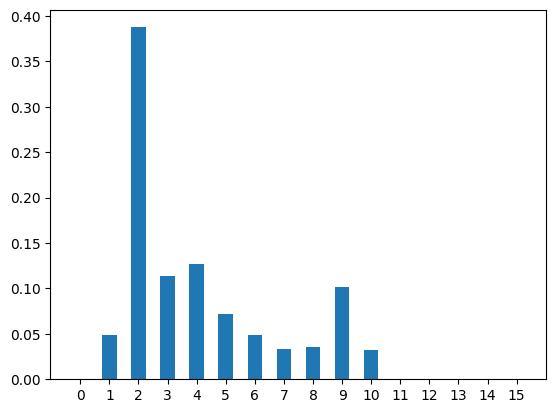



>>> Job ID: cl7pom5fa6vtjv8reehg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01836, 11: 0.02008, 8: 0.03862, 1: 0.03017, 2: 0.31995, 6: 0.05018, 4: 0.12328, 0: 0.00028, 7: 0.04869, 3: 0.19499, 10: 0.09962, 12: 0.00031, 5: 0.05547}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01836, 11: 0.02008, 8: 0.03862, 1: 0.03017, 2: 0.31995, 6: 0.05018, 4: 0.12328, 0: 0.00028, 7: 0.04869, 3: 0.19499, 10: 0.09962, 12: 0.00031, 5: 0.05547}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
12
{9: 0.01836, 11: 0.02008, 8: 0.03862, 1: 0.03017, 2: 0.31995, 6: 0.05018, 4: 0.12328, 0: 0.00028, 7: 0.04869, 3: 0.19499, 10: 0.09962, 12: 0.00031, 5: 0.05547}


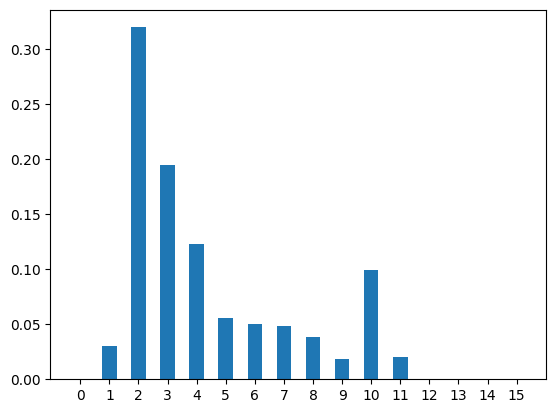



>>> Job ID: cl7pomt7pau17fl11h70
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00011, 9: 0.05313, 10: 0.01801, 11: 0.08898, 1: 0.01798, 8: 0.05307, 0: 9e-05, 7: 0.04916, 3: 0.2776, 2: 0.24908, 4: 0.08879, 6: 0.04886, 5: 0.04272, 12: 0.01242}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00011, 9: 0.05313, 10: 0.01801, 11: 0.08898, 1: 0.01798, 8: 0.05307, 0: 9e-05, 7: 0.04916, 3: 0.2776, 2: 0.24908, 4: 0.08879, 6: 0.04886, 5: 0.04272, 12: 0.01242}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
13
{13: 0.00011, 9: 0.05313, 10: 0.01801, 11: 0.08898, 1: 0.01798, 8: 0.05307, 0: 9e-05, 7: 0.04916, 3: 0.2776, 2: 0.24908, 4: 0.08879, 6: 0.04886, 5: 0.04272, 12: 0.01242}


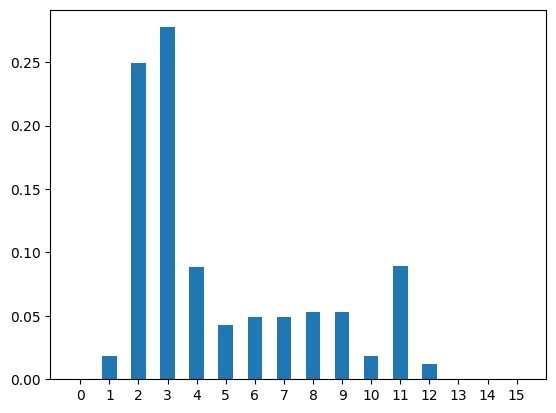



>>> Job ID: cl7ponfl4q34kqgjutbg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 3e-05, 13: 0.00732, 1: 0.01045, 11: 0.03117, 2: 0.18585, 8: 0.03774, 10: 0.05871, 0: 3e-05, 3: 0.33648, 7: 0.04876, 9: 0.03902, 6: 0.06236, 4: 0.05005, 12: 0.07647, 5: 0.05556}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 3e-05, 13: 0.00732, 1: 0.01045, 11: 0.03117, 2: 0.18585, 8: 0.03774, 10: 0.05871, 0: 3e-05, 3: 0.33648, 7: 0.04876, 9: 0.03902, 6: 0.06236, 4: 0.05005, 12: 0.07647, 5: 0.05556}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
14
{14: 3e-05, 13: 0.00732, 1: 0.01045, 11: 0.03117, 2: 0.18585, 8: 0.03774, 10: 0.05871, 0: 3e-05, 3: 0.33648, 7: 0.04876, 9: 0.03902, 6: 0.06236, 4: 0.05005, 12: 0.07647, 5: 0.05556}


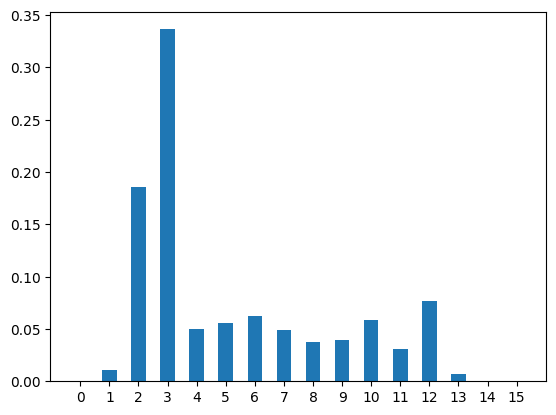



>>> Job ID: cl7poo7l4q34kqgjuthg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00612, 14: 0.00409, 15: 3e-05, 10: 0.02334, 13: 0.05918, 11: 0.04841, 9: 0.02848, 0: 1e-05, 7: 0.0515, 3: 0.36089, 8: 0.03719, 5: 0.08937, 12: 0.0507, 2: 0.13093, 6: 0.07496, 4: 0.0348}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00612, 14: 0.00409, 15: 3e-05, 10: 0.02334, 13: 0.05918, 11: 0.04841, 9: 0.02848, 0: 1e-05, 7: 0.0515, 3: 0.36089, 8: 0.03719, 5: 0.08937, 12: 0.0507, 2: 0.13093, 6: 0.07496, 4: 0.0348}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
15
{1: 0.00612, 14: 0.00409, 15: 3e-05, 10: 0.02334, 13: 0.05918, 11: 0.04841, 9: 0.02848, 0: 1e-05, 7: 0.0515, 3: 0.36089, 8: 0.03719, 5: 0.08937, 12: 0.0507, 2: 0.13093, 6: 0.07496, 4: 0.0348}


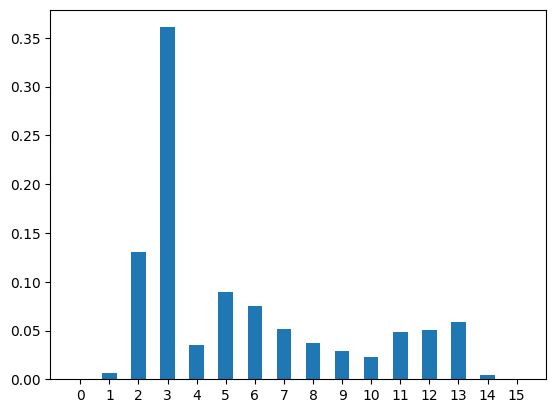



>>> Job ID: cl7poov75e3r3c6ddc3g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00336, 11: 0.01839, 15: 0.00258, 10: 0.03201, 13: 0.06773, 12: 0.0296, 5: 0.11883, 8: 0.03653, 9: 0.03717, 4: 0.05569, 6: 0.06497, 2: 0.09226, 14: 0.04458, 0: 5e-05, 3: 0.35555, 7: 0.0407}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00336, 11: 0.01839, 15: 0.00258, 10: 0.03201, 13: 0.06773, 12: 0.0296, 5: 0.11883, 8: 0.03653, 9: 0.03717, 4: 0.05569, 6: 0.06497, 2: 0.09226, 14: 0.04458, 0: 5e-05, 3: 0.35555, 7: 0.0407}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
16
{1: 0.00336, 11: 0.01839, 15: 0.00258, 10: 0.03201, 13: 0.06773, 12: 0.0296, 5: 0.11883, 8: 0.03653, 9: 0.03717, 4: 0.05569, 6: 0.06497, 2: 0.09226, 14: 0.04458, 0: 5e-05, 3: 0.35555, 7: 0.0407}


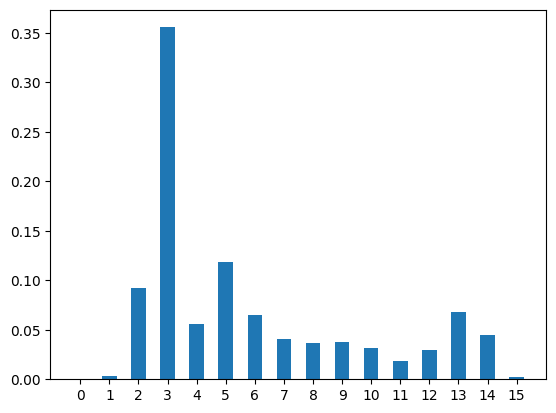



>>> Job ID: cl7popl7pau17fl11ie0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0018, 8: 0.03771, 10: 0.03902, 15: 0.03205, 13: 0.0142, 11: 0.04182, 6: 0.04096, 4: 0.1086, 2: 0.06374, 14: 0.07688, 0: 0.0018, 7: 0.03497, 3: 0.32159, 12: 0.02785, 5: 0.1198, 9: 0.03721}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0018, 8: 0.03771, 10: 0.03902, 15: 0.03205, 13: 0.0142, 11: 0.04182, 6: 0.04096, 4: 0.1086, 2: 0.06374, 14: 0.07688, 0: 0.0018, 7: 0.03497, 3: 0.32159, 12: 0.02785, 5: 0.1198, 9: 0.03721}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
17
{1: 0.0018, 8: 0.03771, 10: 0.03902, 15: 0.03205, 13: 0.0142, 11: 0.04182, 6: 0.04096, 4: 0.1086, 2: 0.06374, 14: 0.07688, 0: 0.0018, 7: 0.03497, 3: 0.32159, 12: 0.02785, 5: 0.1198, 9: 0.03721}


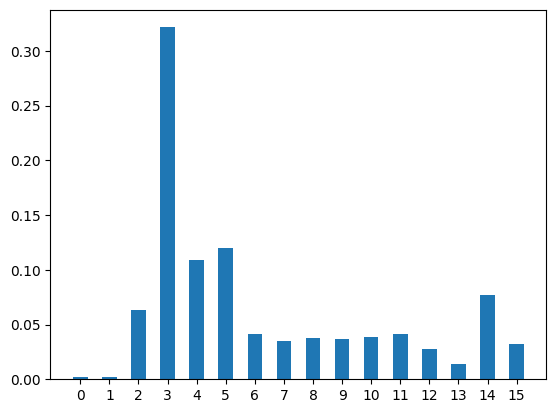



>>> Job ID: cl7posh5o5utp9bpuphg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.002, 14: 0.00921, 2: 0.04262, 10: 0.03076, 15: 0.07608, 11: 0.02988, 5: 0.09365, 12: 0.03952, 6: 0.02992, 4: 0.17477, 13: 0.04014, 8: 0.04557, 9: 0.0374, 0: 0.02223, 3: 0.27991, 7: 0.04634}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.002, 14: 0.00921, 2: 0.04262, 10: 0.03076, 15: 0.07608, 11: 0.02988, 5: 0.09365, 12: 0.03952, 6: 0.02992, 4: 0.17477, 13: 0.04014, 8: 0.04557, 9: 0.0374, 0: 0.02223, 3: 0.27991, 7: 0.04634}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
18
{1: 0.002, 14: 0.00921, 2: 0.04262, 10: 0.03076, 15: 0.07608, 11: 0.02988, 5: 0.09365, 12: 0.03952, 6: 0.02992, 4: 0.17477, 13: 0.04014, 8: 0.04557, 9: 0.0374, 0: 0.02223, 3: 0.27991, 7: 0.04634}


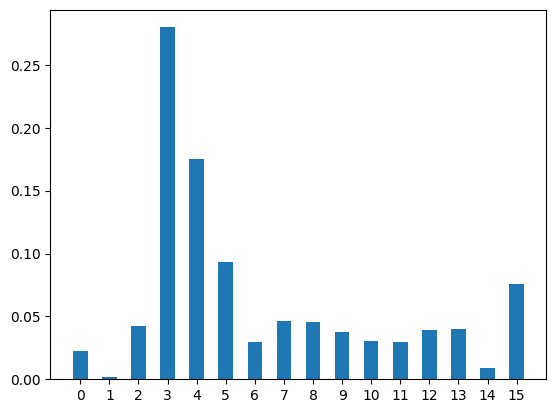



>>> Job ID: cl7potdfa6vtjv8rehr0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.02468, 2: 0.02842, 1: 0.01555, 13: 0.02641, 14: 0.04727, 9: 0.0379, 15: 0.01458, 10: 0.0303, 7: 0.06553, 0: 0.07006, 3: 0.22967, 8: 0.05129, 12: 0.01997, 5: 0.05732, 6: 0.0459, 4: 0.23515}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.02468, 2: 0.02842, 1: 0.01555, 13: 0.02641, 14: 0.04727, 9: 0.0379, 15: 0.01458, 10: 0.0303, 7: 0.06553, 0: 0.07006, 3: 0.22967, 8: 0.05129, 12: 0.01997, 5: 0.05732, 6: 0.0459, 4: 0.23515}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
19
{11: 0.02468, 2: 0.02842, 1: 0.01555, 13: 0.02641, 14: 0.04727, 9: 0.0379, 15: 0.01458, 10: 0.0303, 7: 0.06553, 0: 0.07006, 3: 0.22967, 8: 0.05129, 12: 0.01997, 5: 0.05732, 6: 0.0459, 4: 0.23515}


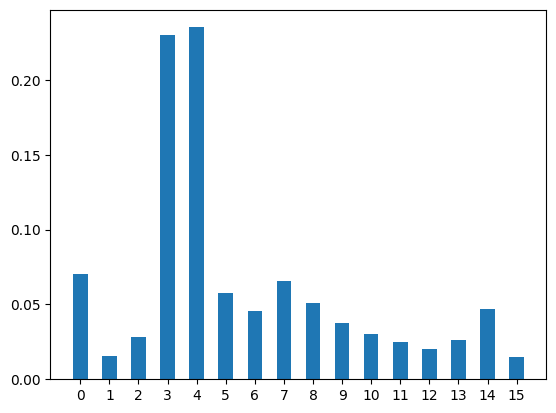



>>> Job ID: cl7pou7l4q34kqgjv0n0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.01999, 11: 0.03144, 2: 0.02728, 5: 0.02926, 12: 0.02702, 14: 0.01484, 8: 0.04174, 1: 0.0665, 6: 0.07677, 4: 0.28043, 9: 0.03119, 0: 0.02741, 7: 0.0727, 3: 0.18065, 10: 0.03064, 15: 0.04214}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.01999, 11: 0.03144, 2: 0.02728, 5: 0.02926, 12: 0.02702, 14: 0.01484, 8: 0.04174, 1: 0.0665, 6: 0.07677, 4: 0.28043, 9: 0.03119, 0: 0.02741, 7: 0.0727, 3: 0.18065, 10: 0.03064, 15: 0.04214}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
20
{13: 0.01999, 11: 0.03144, 2: 0.02728, 5: 0.02926, 12: 0.02702, 14: 0.01484, 8: 0.04174, 1: 0.0665, 6: 0.07677, 4: 0.28043, 9: 0.03119, 0: 0.02741, 7: 0.0727, 3: 0.18065, 10: 0.03064, 15: 0.04214}


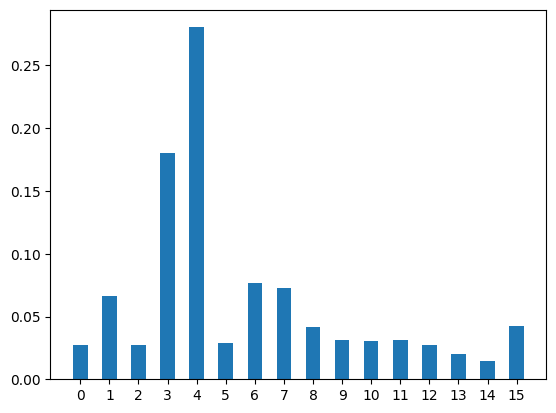



>>> Job ID: cl7poup5o5utp9bpuqcg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.0286, 13: 0.03363, 11: 0.03054, 1: 0.03809, 9: 0.0289, 5: 0.02806, 12: 0.03129, 8: 0.028, 2: 0.05744, 7: 0.05907, 3: 0.15174, 0: 0.0292, 4: 0.30809, 6: 0.10508, 15: 0.01185, 10: 0.03042}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.0286, 13: 0.03363, 11: 0.03054, 1: 0.03809, 9: 0.0289, 5: 0.02806, 12: 0.03129, 8: 0.028, 2: 0.05744, 7: 0.05907, 3: 0.15174, 0: 0.0292, 4: 0.30809, 6: 0.10508, 15: 0.01185, 10: 0.03042}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
21
{14: 0.0286, 13: 0.03363, 11: 0.03054, 1: 0.03809, 9: 0.0289, 5: 0.02806, 12: 0.03129, 8: 0.028, 2: 0.05744, 7: 0.05907, 3: 0.15174, 0: 0.0292, 4: 0.30809, 6: 0.10508, 15: 0.01185, 10: 0.03042}


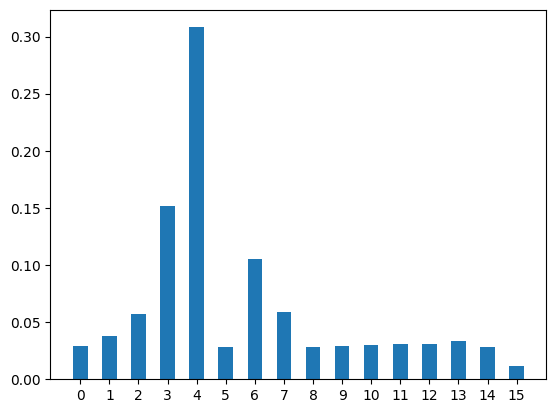



>>> Job ID: cl7povlfa6vtjv8reipg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.02852, 11: 0.03147, 14: 0.02919, 1: 0.01773, 10: 0.03512, 15: 0.03445, 2: 0.07423, 13: 0.0247, 9: 0.037, 6: 0.11388, 4: 0.29323, 7: 0.03684, 0: 0.01934, 3: 0.15142, 12: 0.02533, 5: 0.04755}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.02852, 11: 0.03147, 14: 0.02919, 1: 0.01773, 10: 0.03512, 15: 0.03445, 2: 0.07423, 13: 0.0247, 9: 0.037, 6: 0.11388, 4: 0.29323, 7: 0.03684, 0: 0.01934, 3: 0.15142, 12: 0.02533, 5: 0.04755}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
22
{8: 0.02852, 11: 0.03147, 14: 0.02919, 1: 0.01773, 10: 0.03512, 15: 0.03445, 2: 0.07423, 13: 0.0247, 9: 0.037, 6: 0.11388, 4: 0.29323, 7: 0.03684, 0: 0.01934, 3: 0.15142, 12: 0.02533, 5: 0.04755}


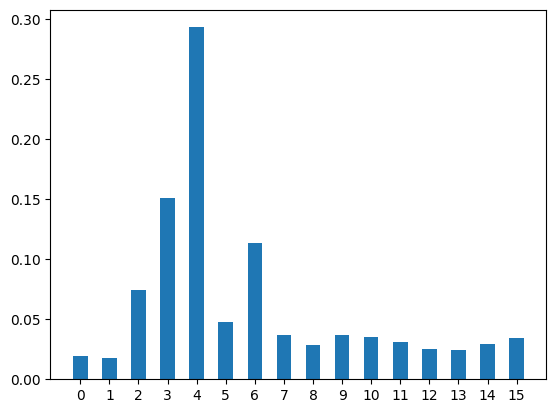



>>> Job ID: cl7pp0dfa6vtjv8rejcg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00335, 1: 0.03227, 15: 0.01954, 10: 0.03925, 7: 0.02344, 0: 0.03239, 3: 0.10178, 9: 0.0493, 5: 0.1192, 12: 0.02514, 11: 0.0302, 6: 0.10069, 4: 0.34267, 8: 0.04263, 14: 0.01711, 13: 0.02104}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00335, 1: 0.03227, 15: 0.01954, 10: 0.03925, 7: 0.02344, 0: 0.03239, 3: 0.10178, 9: 0.0493, 5: 0.1192, 12: 0.02514, 11: 0.0302, 6: 0.10069, 4: 0.34267, 8: 0.04263, 14: 0.01711, 13: 0.02104}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
23
{2: 0.00335, 1: 0.03227, 15: 0.01954, 10: 0.03925, 7: 0.02344, 0: 0.03239, 3: 0.10178, 9: 0.0493, 5: 0.1192, 12: 0.02514, 11: 0.0302, 6: 0.10069, 4: 0.34267, 8: 0.04263, 14: 0.01711, 13: 0.02104}


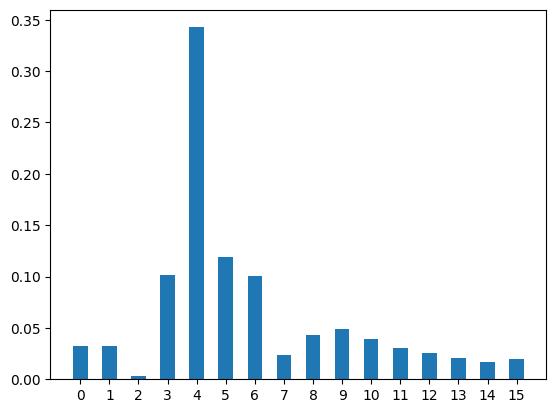



>>> Job ID: cl7pp2t7pau17fl11n6g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.02635, 14: 0.02454, 9: 0.04917, 13: 0.02571, 1: 0.02149, 15: 0.01893, 10: 0.03216, 12: 0.02564, 5: 0.1233, 8: 0.06427, 4: 0.34075, 6: 0.07011, 3: 0.09668, 7: 0.03456, 0: 0.0122, 2: 0.03414}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.02635, 14: 0.02454, 9: 0.04917, 13: 0.02571, 1: 0.02149, 15: 0.01893, 10: 0.03216, 12: 0.02564, 5: 0.1233, 8: 0.06427, 4: 0.34075, 6: 0.07011, 3: 0.09668, 7: 0.03456, 0: 0.0122, 2: 0.03414}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
24
{11: 0.02635, 14: 0.02454, 9: 0.04917, 13: 0.02571, 1: 0.02149, 15: 0.01893, 10: 0.03216, 12: 0.02564, 5: 0.1233, 8: 0.06427, 4: 0.34075, 6: 0.07011, 3: 0.09668, 7: 0.03456, 0: 0.0122, 2: 0.03414}


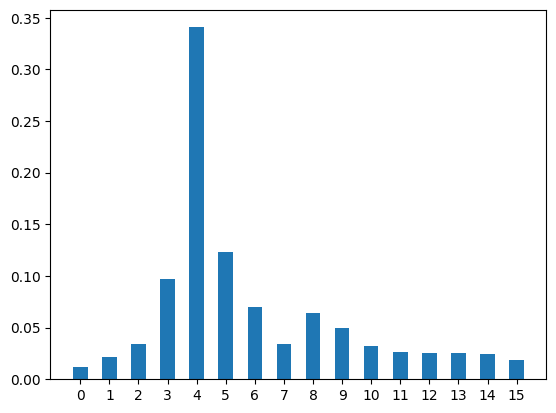



>>> Job ID: cl7pp3p5o5utp9bpusr0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01507, 2: 0.01925, 9: 0.0359, 13: 0.025, 10: 0.0233, 15: 0.02718, 8: 0.07209, 12: 0.02512, 5: 0.30594, 14: 0.02656, 7: 0.04889, 3: 0.08446, 0: 0.02592, 6: 0.08149, 4: 0.15985, 11: 0.02398}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01507, 2: 0.01925, 9: 0.0359, 13: 0.025, 10: 0.0233, 15: 0.02718, 8: 0.07209, 12: 0.02512, 5: 0.30594, 14: 0.02656, 7: 0.04889, 3: 0.08446, 0: 0.02592, 6: 0.08149, 4: 0.15985, 11: 0.02398}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
25
{1: 0.01507, 2: 0.01925, 9: 0.0359, 13: 0.025, 10: 0.0233, 15: 0.02718, 8: 0.07209, 12: 0.02512, 5: 0.30594, 14: 0.02656, 7: 0.04889, 3: 0.08446, 0: 0.02592, 6: 0.08149, 4: 0.15985, 11: 0.02398}


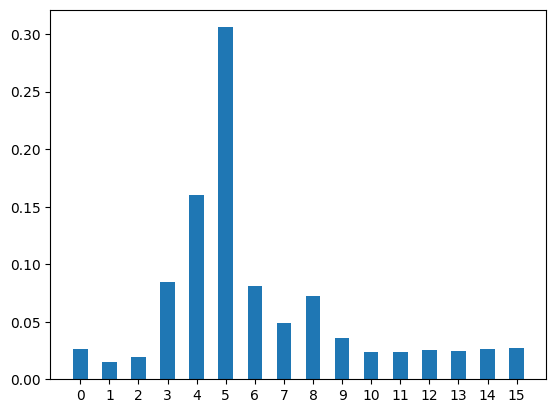



>>> Job ID: cl7pp4n75e3r3c6ddhg0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.02231, 13: 0.0253, 1: 0.02755, 14: 0.02128, 8: 0.05908, 15: 0.02073, 10: 0.02658, 3: 0.00453, 0: 0.02332, 7: 0.13055, 12: 0.0293, 5: 0.3079, 6: 0.01362, 4: 0.22562, 11: 0.0311, 2: 0.03123}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.02231, 13: 0.0253, 1: 0.02755, 14: 0.02128, 8: 0.05908, 15: 0.02073, 10: 0.02658, 3: 0.00453, 0: 0.02332, 7: 0.13055, 12: 0.0293, 5: 0.3079, 6: 0.01362, 4: 0.22562, 11: 0.0311, 2: 0.03123}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
26
{9: 0.02231, 13: 0.0253, 1: 0.02755, 14: 0.02128, 8: 0.05908, 15: 0.02073, 10: 0.02658, 3: 0.00453, 0: 0.02332, 7: 0.13055, 12: 0.0293, 5: 0.3079, 6: 0.01362, 4: 0.22562, 11: 0.0311, 2: 0.03123}


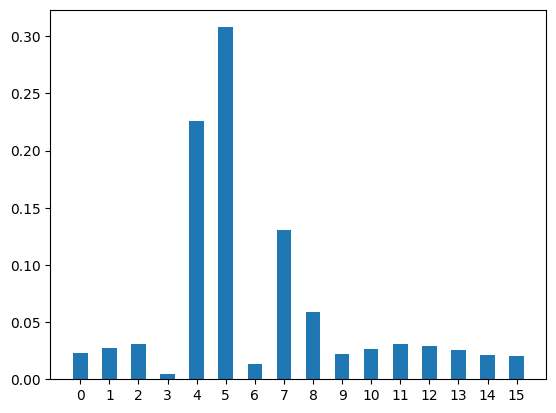



>>> Job ID: cl7pp5fl4q34kqgjv42g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.02473, 14: 0.02279, 2: 0.02319, 11: 0.03913, 1: 0.0161, 9: 0.03049, 10: 0.03804, 15: 0.01875, 8: 0.03086, 12: 0.03017, 5: 0.2205, 6: 0.09801, 4: 0.22706, 0: 0.01579, 3: 0.03328, 7: 0.13111}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.02473, 14: 0.02279, 2: 0.02319, 11: 0.03913, 1: 0.0161, 9: 0.03049, 10: 0.03804, 15: 0.01875, 8: 0.03086, 12: 0.03017, 5: 0.2205, 6: 0.09801, 4: 0.22706, 0: 0.01579, 3: 0.03328, 7: 0.13111}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
27
{13: 0.02473, 14: 0.02279, 2: 0.02319, 11: 0.03913, 1: 0.0161, 9: 0.03049, 10: 0.03804, 15: 0.01875, 8: 0.03086, 12: 0.03017, 5: 0.2205, 6: 0.09801, 4: 0.22706, 0: 0.01579, 3: 0.03328, 7: 0.13111}


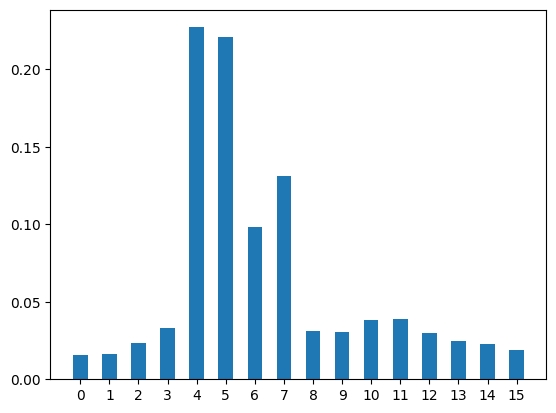



>>> Job ID: cl7pp696mcdhud4e00sg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01742, 9: 0.02449, 13: 0.02236, 2: 0.00887, 14: 0.02153, 0: 0.02011, 3: 0.0398, 7: 0.12, 8: 0.1143, 11: 0.03606, 10: 0.05181, 15: 0.02172, 4: 0.14163, 6: 0.09827, 12: 0.02732, 5: 0.23431}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01742, 9: 0.02449, 13: 0.02236, 2: 0.00887, 14: 0.02153, 0: 0.02011, 3: 0.0398, 7: 0.12, 8: 0.1143, 11: 0.03606, 10: 0.05181, 15: 0.02172, 4: 0.14163, 6: 0.09827, 12: 0.02732, 5: 0.23431}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
28
{1: 0.01742, 9: 0.02449, 13: 0.02236, 2: 0.00887, 14: 0.02153, 0: 0.02011, 3: 0.0398, 7: 0.12, 8: 0.1143, 11: 0.03606, 10: 0.05181, 15: 0.02172, 4: 0.14163, 6: 0.09827, 12: 0.02732, 5: 0.23431}


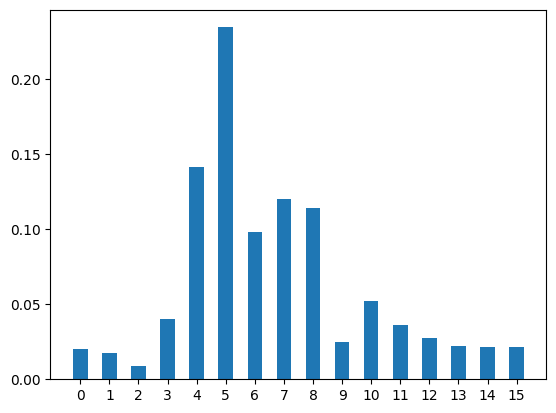



>>> Job ID: cl7pp715o5utp9bpuu90
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.01418, 14: 0.02225, 1: 0.02343, 13: 0.02046, 15: 0.0221, 10: 0.05173, 9: 0.12693, 11: 0.02447, 4: 0.041, 6: 0.09151, 2: 0.02108, 12: 0.02053, 5: 0.33129, 0: 0.02259, 3: 0.04155, 7: 0.1249}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.01418, 14: 0.02225, 1: 0.02343, 13: 0.02046, 15: 0.0221, 10: 0.05173, 9: 0.12693, 11: 0.02447, 4: 0.041, 6: 0.09151, 2: 0.02108, 12: 0.02053, 5: 0.33129, 0: 0.02259, 3: 0.04155, 7: 0.1249}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
29
{8: 0.01418, 14: 0.02225, 1: 0.02343, 13: 0.02046, 15: 0.0221, 10: 0.05173, 9: 0.12693, 11: 0.02447, 4: 0.041, 6: 0.09151, 2: 0.02108, 12: 0.02053, 5: 0.33129, 0: 0.02259, 3: 0.04155, 7: 0.1249}


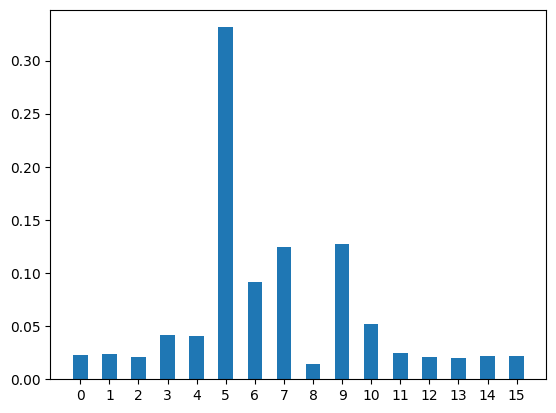



>>> Job ID: cl7pp7p5o5utp9bpuuk0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01794, 14: 0.02448, 8: 0.03187, 13: 0.0262, 15: 0.02203, 10: 0.03353, 2: 0.02052, 9: 0.12338, 12: 0.0213, 5: 0.33609, 0: 0.0198, 3: 0.03033, 7: 0.12624, 11: 0.03571, 4: 0.05662, 6: 0.07396}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01794, 14: 0.02448, 8: 0.03187, 13: 0.0262, 15: 0.02203, 10: 0.03353, 2: 0.02052, 9: 0.12338, 12: 0.0213, 5: 0.33609, 0: 0.0198, 3: 0.03033, 7: 0.12624, 11: 0.03571, 4: 0.05662, 6: 0.07396}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
30
{1: 0.01794, 14: 0.02448, 8: 0.03187, 13: 0.0262, 15: 0.02203, 10: 0.03353, 2: 0.02052, 9: 0.12338, 12: 0.0213, 5: 0.33609, 0: 0.0198, 3: 0.03033, 7: 0.12624, 11: 0.03571, 4: 0.05662, 6: 0.07396}


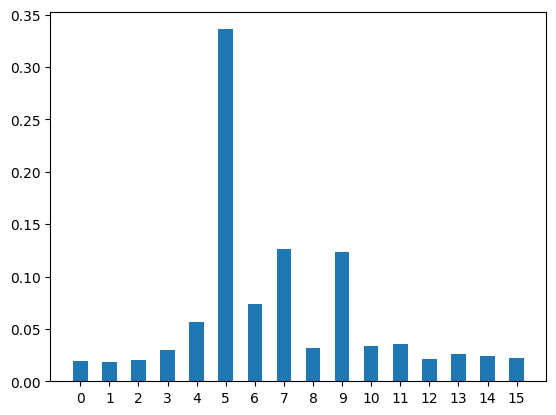



>>> Job ID: cl7pp8t7pau17fl11pdg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.03307, 11: 0.00638, 1: 0.01645, 2: 0.01642, 0: 0.01988, 3: 0.0065, 7: 0.01997, 8: 0.14066, 12: 0.04426, 5: 0.23677, 13: 0.03034, 4: 0.08506, 6: 0.1639, 15: 0.02167, 10: 0.1324, 14: 0.02627}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.03307, 11: 0.00638, 1: 0.01645, 2: 0.01642, 0: 0.01988, 3: 0.0065, 7: 0.01997, 8: 0.14066, 12: 0.04426, 5: 0.23677, 13: 0.03034, 4: 0.08506, 6: 0.1639, 15: 0.02167, 10: 0.1324, 14: 0.02627}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
31
{9: 0.03307, 11: 0.00638, 1: 0.01645, 2: 0.01642, 0: 0.01988, 3: 0.0065, 7: 0.01997, 8: 0.14066, 12: 0.04426, 5: 0.23677, 13: 0.03034, 4: 0.08506, 6: 0.1639, 15: 0.02167, 10: 0.1324, 14: 0.02627}


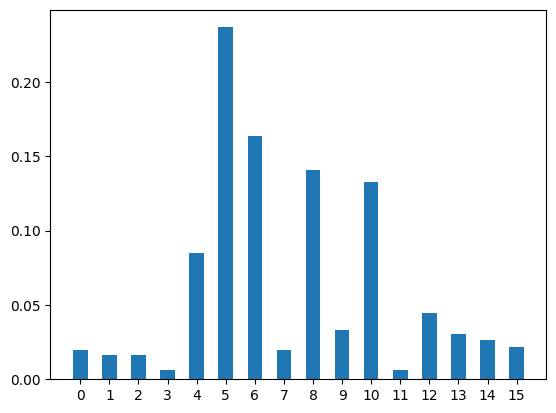



>>> Job ID: cl7pp9l7pau17fl11pog
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01958, 9: 0.04993, 11: 0.12918, 7: 0.00184, 3: 0.00823, 0: 0.01956, 14: 0.02373, 1: 0.01968, 8: 0.13924, 13: 0.02813, 4: 0.08452, 6: 0.28717, 10: 0.01069, 15: 0.01955, 5: 0.11339, 12: 0.04558}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01958, 9: 0.04993, 11: 0.12918, 7: 0.00184, 3: 0.00823, 0: 0.01956, 14: 0.02373, 1: 0.01968, 8: 0.13924, 13: 0.02813, 4: 0.08452, 6: 0.28717, 10: 0.01069, 15: 0.01955, 5: 0.11339, 12: 0.04558}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
32
{2: 0.01958, 9: 0.04993, 11: 0.12918, 7: 0.00184, 3: 0.00823, 0: 0.01956, 14: 0.02373, 1: 0.01968, 8: 0.13924, 13: 0.02813, 4: 0.08452, 6: 0.28717, 10: 0.01069, 15: 0.01955, 5: 0.11339, 12: 0.04558}


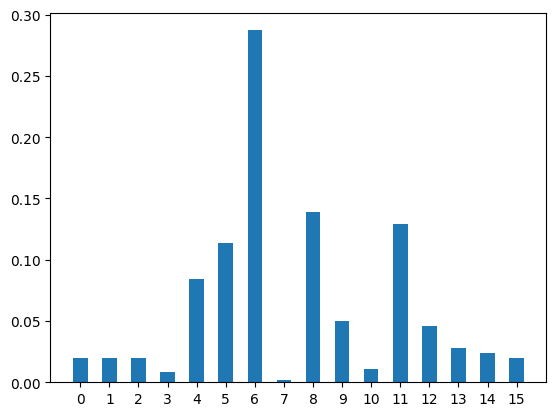



>>> Job ID: cl7ppa96mcdhud4e02j0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01933, 1: 0.01991, 13: 0.05326, 10: 0.01059, 15: 0.01972, 14: 0.01167, 11: 0.08934, 8: 0.11864, 5: 0.10542, 12: 0.05299, 9: 0.07239, 4: 0.05957, 6: 0.32653, 7: 0.00214, 3: 0.01946, 0: 0.01904}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01933, 1: 0.01991, 13: 0.05326, 10: 0.01059, 15: 0.01972, 14: 0.01167, 11: 0.08934, 8: 0.11864, 5: 0.10542, 12: 0.05299, 9: 0.07239, 4: 0.05957, 6: 0.32653, 7: 0.00214, 3: 0.01946, 0: 0.01904}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
33
{2: 0.01933, 1: 0.01991, 13: 0.05326, 10: 0.01059, 15: 0.01972, 14: 0.01167, 11: 0.08934, 8: 0.11864, 5: 0.10542, 12: 0.05299, 9: 0.07239, 4: 0.05957, 6: 0.32653, 7: 0.00214, 3: 0.01946, 0: 0.01904}


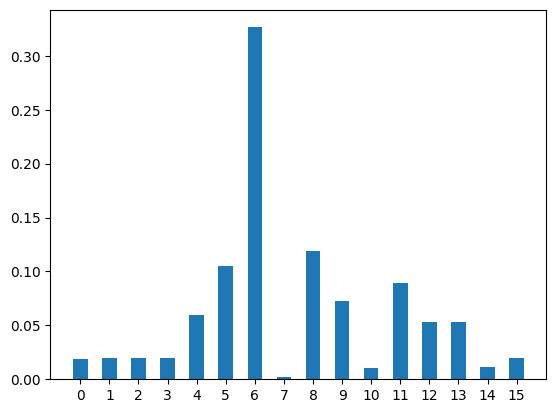



>>> Job ID: cl7ppcp5o5utp9bpv0qg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00483, 2: 0.01684, 15: 0.01871, 10: 0.07827, 8: 0.04996, 11: 0.03636, 14: 0.05166, 4: 0.02061, 6: 0.27481, 9: 0.07202, 5: 0.15229, 12: 0.10483, 1: 0.01899, 3: 0.02158, 0: 0.02177, 7: 0.05647}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00483, 2: 0.01684, 15: 0.01871, 10: 0.07827, 8: 0.04996, 11: 0.03636, 14: 0.05166, 4: 0.02061, 6: 0.27481, 9: 0.07202, 5: 0.15229, 12: 0.10483, 1: 0.01899, 3: 0.02158, 0: 0.02177, 7: 0.05647}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
34
{13: 0.00483, 2: 0.01684, 15: 0.01871, 10: 0.07827, 8: 0.04996, 11: 0.03636, 14: 0.05166, 4: 0.02061, 6: 0.27481, 9: 0.07202, 5: 0.15229, 12: 0.10483, 1: 0.01899, 3: 0.02158, 0: 0.02177, 7: 0.05647}


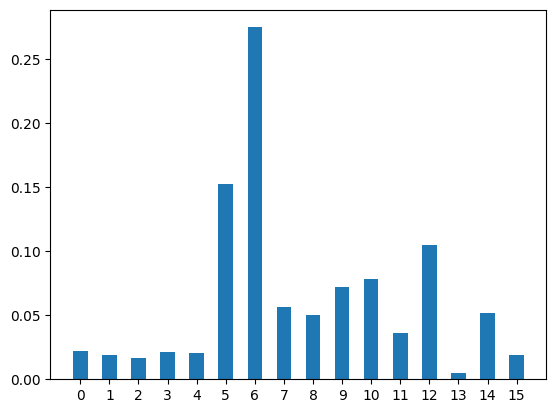



>>> Job ID: cl7ppdv75e3r3c6ddlrg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01938, 2: 0.01631, 11: 0.02325, 14: 0.03701, 13: 0.10576, 8: 0.06253, 15: 0.03866, 10: 0.11176, 12: 0.02505, 5: 0.16877, 0: 0.02267, 7: 0.13458, 3: 0.02138, 4: 0.00024, 6: 0.17506, 9: 0.03759}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01938, 2: 0.01631, 11: 0.02325, 14: 0.03701, 13: 0.10576, 8: 0.06253, 15: 0.03866, 10: 0.11176, 12: 0.02505, 5: 0.16877, 0: 0.02267, 7: 0.13458, 3: 0.02138, 4: 0.00024, 6: 0.17506, 9: 0.03759}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
35
{1: 0.01938, 2: 0.01631, 11: 0.02325, 14: 0.03701, 13: 0.10576, 8: 0.06253, 15: 0.03866, 10: 0.11176, 12: 0.02505, 5: 0.16877, 0: 0.02267, 7: 0.13458, 3: 0.02138, 4: 0.00024, 6: 0.17506, 9: 0.03759}


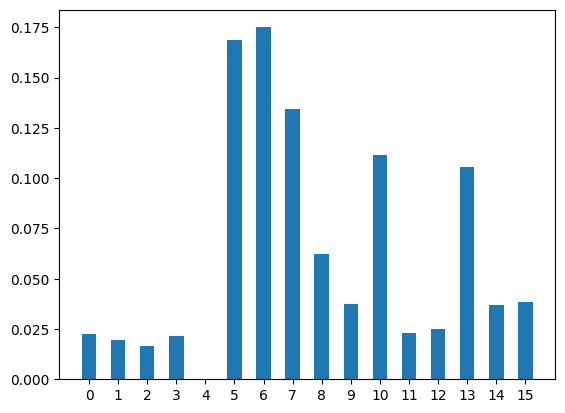



>>> Job ID: cl7ppf57pau17fl11s8g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01582, 9: 0.03691, 13: 0.05722, 4: 0.00957, 6: 0.1459, 11: 0.02455, 8: 0.0746, 12: 0.01496, 5: 0.13862, 1: 0.02032, 14: 0.06664, 15: 0.0663, 10: 0.11202, 0: 0.01324, 3: 0.02019, 7: 0.18314}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01582, 9: 0.03691, 13: 0.05722, 4: 0.00957, 6: 0.1459, 11: 0.02455, 8: 0.0746, 12: 0.01496, 5: 0.13862, 1: 0.02032, 14: 0.06664, 15: 0.0663, 10: 0.11202, 0: 0.01324, 3: 0.02019, 7: 0.18314}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
36
{2: 0.01582, 9: 0.03691, 13: 0.05722, 4: 0.00957, 6: 0.1459, 11: 0.02455, 8: 0.0746, 12: 0.01496, 5: 0.13862, 1: 0.02032, 14: 0.06664, 15: 0.0663, 10: 0.11202, 0: 0.01324, 3: 0.02019, 7: 0.18314}


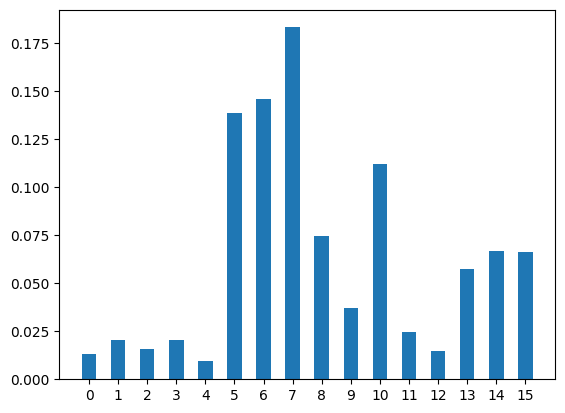



>>> Job ID: cl7ppg15o5utp9bpv23g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0062, 9: 0.03169, 11: 0.07166, 15: 0.01376, 10: 0.0637, 12: 0.0199, 5: 0.07757, 4: 0.02378, 6: 0.1986, 14: 0.05965, 8: 0.07083, 13: 0.06086, 3: 0.01684, 7: 0.18842, 0: 0.07604, 2: 0.0205}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0062, 9: 0.03169, 11: 0.07166, 15: 0.01376, 10: 0.0637, 12: 0.0199, 5: 0.07757, 4: 0.02378, 6: 0.1986, 14: 0.05965, 8: 0.07083, 13: 0.06086, 3: 0.01684, 7: 0.18842, 0: 0.07604, 2: 0.0205}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
37
{1: 0.0062, 9: 0.03169, 11: 0.07166, 15: 0.01376, 10: 0.0637, 12: 0.0199, 5: 0.07757, 4: 0.02378, 6: 0.1986, 14: 0.05965, 8: 0.07083, 13: 0.06086, 3: 0.01684, 7: 0.18842, 0: 0.07604, 2: 0.0205}


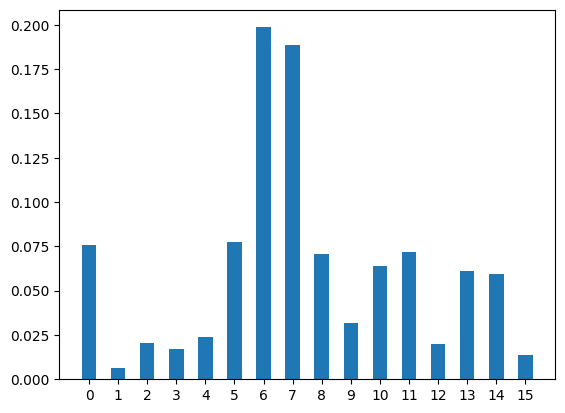



>>> Job ID: cl7ppgvl4q34kqgjv8u0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01411, 11: 0.07348, 13: 0.00932, 8: 0.06316, 0: 0.01983, 3: 0.01643, 7: 0.14979, 10: 0.00651, 15: 0.05403, 1: 0.06165, 6: 0.25099, 4: 0.0296, 5: 0.0213, 12: 0.07836, 9: 0.08585, 14: 0.06559}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01411, 11: 0.07348, 13: 0.00932, 8: 0.06316, 0: 0.01983, 3: 0.01643, 7: 0.14979, 10: 0.00651, 15: 0.05403, 1: 0.06165, 6: 0.25099, 4: 0.0296, 5: 0.0213, 12: 0.07836, 9: 0.08585, 14: 0.06559}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
38
{2: 0.01411, 11: 0.07348, 13: 0.00932, 8: 0.06316, 0: 0.01983, 3: 0.01643, 7: 0.14979, 10: 0.00651, 15: 0.05403, 1: 0.06165, 6: 0.25099, 4: 0.0296, 5: 0.0213, 12: 0.07836, 9: 0.08585, 14: 0.06559}


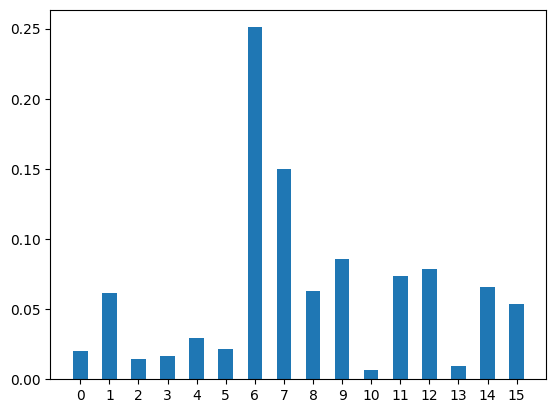



>>> Job ID: cl7pphp5o5utp9bpv2o0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00864, 13: 0.01383, 11: 0.06984, 2: 0.03158, 8: 0.05029, 10: 0.00223, 15: 0.06571, 4: 0.03027, 6: 0.25169, 9: 0.14131, 5: 0.0037, 12: 0.08183, 3: 0.0173, 0: 0.04932, 7: 0.11935, 1: 0.06311}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00864, 13: 0.01383, 11: 0.06984, 2: 0.03158, 8: 0.05029, 10: 0.00223, 15: 0.06571, 4: 0.03027, 6: 0.25169, 9: 0.14131, 5: 0.0037, 12: 0.08183, 3: 0.0173, 0: 0.04932, 7: 0.11935, 1: 0.06311}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
39
{14: 0.00864, 13: 0.01383, 11: 0.06984, 2: 0.03158, 8: 0.05029, 10: 0.00223, 15: 0.06571, 4: 0.03027, 6: 0.25169, 9: 0.14131, 5: 0.0037, 12: 0.08183, 3: 0.0173, 0: 0.04932, 7: 0.11935, 1: 0.06311}


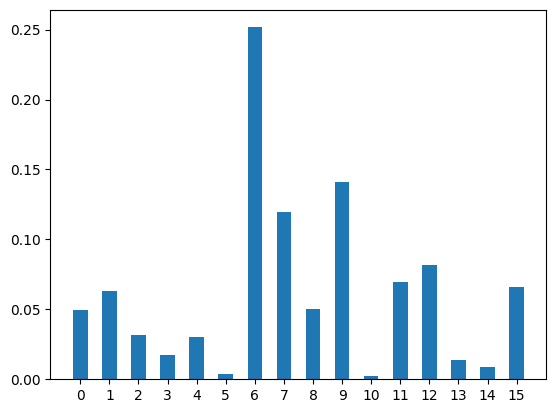



>>> Job ID: cl7ppj775e3r3c6ddnt0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0194, 14: 0.00773, 8: 0.05467, 2: 0.09244, 13: 0.02794, 0: 0.04536, 3: 0.00499, 7: 0.16548, 5: 0.01571, 12: 0.08343, 9: 0.15408, 6: 0.19046, 4: 0.02807, 11: 0.05242, 10: 0.00326, 15: 0.05456}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0194, 14: 0.00773, 8: 0.05467, 2: 0.09244, 13: 0.02794, 0: 0.04536, 3: 0.00499, 7: 0.16548, 5: 0.01571, 12: 0.08343, 9: 0.15408, 6: 0.19046, 4: 0.02807, 11: 0.05242, 10: 0.00326, 15: 0.05456}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
40
{1: 0.0194, 14: 0.00773, 8: 0.05467, 2: 0.09244, 13: 0.02794, 0: 0.04536, 3: 0.00499, 7: 0.16548, 5: 0.01571, 12: 0.08343, 9: 0.15408, 6: 0.19046, 4: 0.02807, 11: 0.05242, 10: 0.00326, 15: 0.05456}


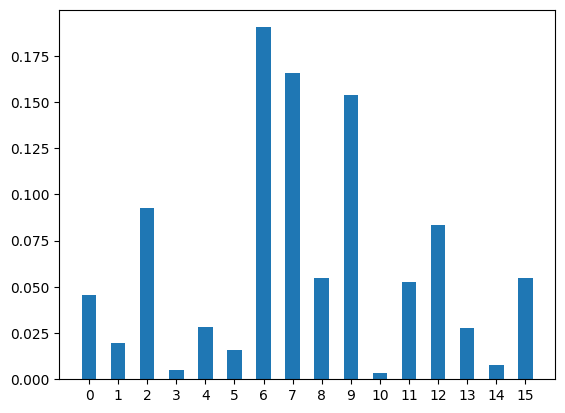



>>> Job ID: cl7ppll7pau17fl11uq0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.02712, 1: 0.01816, 2: 0.00547, 8: 0.05621, 10: 0.03487, 15: 0.0229, 5: 0.04408, 12: 0.03734, 9: 0.11953, 13: 0.07458, 4: 0.00171, 6: 0.10344, 14: 0.03284, 0: 0.07973, 3: 0.09318, 7: 0.24884}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.02712, 1: 0.01816, 2: 0.00547, 8: 0.05621, 10: 0.03487, 15: 0.0229, 5: 0.04408, 12: 0.03734, 9: 0.11953, 13: 0.07458, 4: 0.00171, 6: 0.10344, 14: 0.03284, 0: 0.07973, 3: 0.09318, 7: 0.24884}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
41
{11: 0.02712, 1: 0.01816, 2: 0.00547, 8: 0.05621, 10: 0.03487, 15: 0.0229, 5: 0.04408, 12: 0.03734, 9: 0.11953, 13: 0.07458, 4: 0.00171, 6: 0.10344, 14: 0.03284, 0: 0.07973, 3: 0.09318, 7: 0.24884}


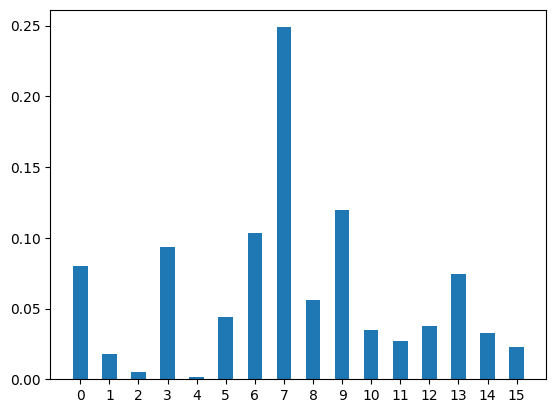



>>> Job ID: cl7ppmd7pau17fl11v7g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01504, 14: 0.06376, 11: 0.04206, 8: 0.04624, 12: 0.00749, 5: 0.04294, 6: 0.04101, 4: 0.06464, 0: 0.02003, 3: 0.03296, 7: 0.3113, 15: 0.00926, 10: 0.0931, 9: 0.05745, 13: 0.073, 1: 0.07972}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01504, 14: 0.06376, 11: 0.04206, 8: 0.04624, 12: 0.00749, 5: 0.04294, 6: 0.04101, 4: 0.06464, 0: 0.02003, 3: 0.03296, 7: 0.3113, 15: 0.00926, 10: 0.0931, 9: 0.05745, 13: 0.073, 1: 0.07972}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
42
{2: 0.01504, 14: 0.06376, 11: 0.04206, 8: 0.04624, 12: 0.00749, 5: 0.04294, 6: 0.04101, 4: 0.06464, 0: 0.02003, 3: 0.03296, 7: 0.3113, 15: 0.00926, 10: 0.0931, 9: 0.05745, 13: 0.073, 1: 0.07972}


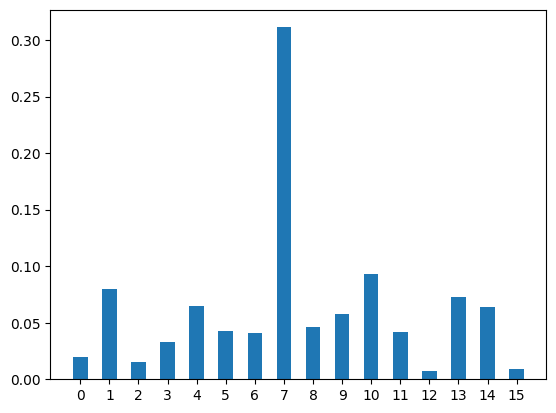



>>> Job ID: cl7ppndfa6vtjv8ret20
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.06181, 12: 0.00757, 5: 0.05666, 11: 0.05429, 13: 0.0732, 1: 0.03643, 0: 0.00893, 3: 0.01257, 7: 0.30777, 15: 0.00866, 10: 0.13706, 6: 0.02784, 4: 0.06627, 8: 0.06574, 14: 0.06317, 9: 0.01203}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.06181, 12: 0.00757, 5: 0.05666, 11: 0.05429, 13: 0.0732, 1: 0.03643, 0: 0.00893, 3: 0.01257, 7: 0.30777, 15: 0.00866, 10: 0.13706, 6: 0.02784, 4: 0.06627, 8: 0.06574, 14: 0.06317, 9: 0.01203}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
43
{2: 0.06181, 12: 0.00757, 5: 0.05666, 11: 0.05429, 13: 0.0732, 1: 0.03643, 0: 0.00893, 3: 0.01257, 7: 0.30777, 15: 0.00866, 10: 0.13706, 6: 0.02784, 4: 0.06627, 8: 0.06574, 14: 0.06317, 9: 0.01203}


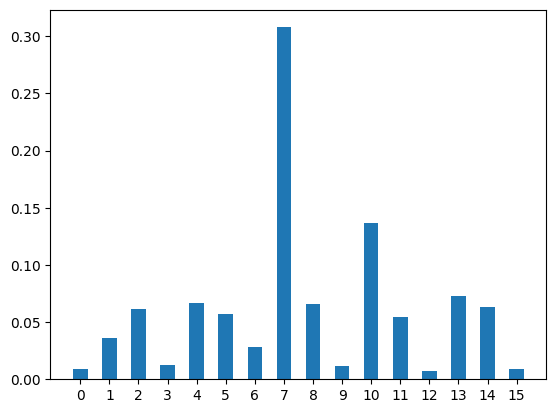



>>> Job ID: cl7ppodfa6vtjv8rete0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00077, 4: 0.00056, 6: 0.02695, 11: 0.05048, 1: 0.03972, 14: 0.06475, 2: 0.05217, 13: 0.04343, 8: 0.13216, 12: 0.00877, 5: 0.12134, 15: 0.0382, 10: 0.1474, 0: 0.00627, 3: 0.02401, 7: 0.24302}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00077, 4: 0.00056, 6: 0.02695, 11: 0.05048, 1: 0.03972, 14: 0.06475, 2: 0.05217, 13: 0.04343, 8: 0.13216, 12: 0.00877, 5: 0.12134, 15: 0.0382, 10: 0.1474, 0: 0.00627, 3: 0.02401, 7: 0.24302}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
44
{9: 0.00077, 4: 0.00056, 6: 0.02695, 11: 0.05048, 1: 0.03972, 14: 0.06475, 2: 0.05217, 13: 0.04343, 8: 0.13216, 12: 0.00877, 5: 0.12134, 15: 0.0382, 10: 0.1474, 0: 0.00627, 3: 0.02401, 7: 0.24302}


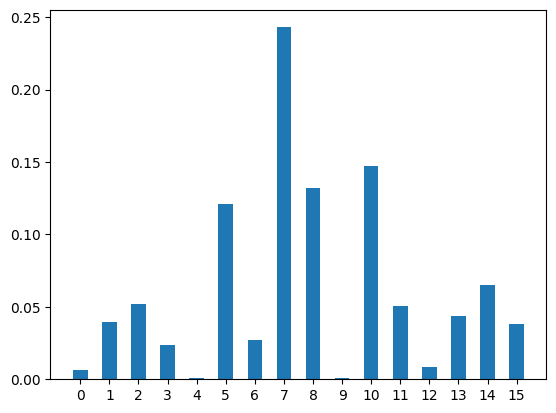



>>> Job ID: cl7pppfl4q34kqgjvcfg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00068, 1: 0.00727, 5: 7e-05, 12: 0.04101, 14: 0.03315, 13: 0.01064, 2: 0.05141, 11: 0.05131, 8: 0.2524, 4: 0.00057, 6: 0.13727, 15: 0.07029, 10: 0.111, 0: 0.04031, 3: 0.05821, 7: 0.13441}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00068, 1: 0.00727, 5: 7e-05, 12: 0.04101, 14: 0.03315, 13: 0.01064, 2: 0.05141, 11: 0.05131, 8: 0.2524, 4: 0.00057, 6: 0.13727, 15: 0.07029, 10: 0.111, 0: 0.04031, 3: 0.05821, 7: 0.13441}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
45
{9: 0.00068, 1: 0.00727, 5: 7e-05, 12: 0.04101, 14: 0.03315, 13: 0.01064, 2: 0.05141, 11: 0.05131, 8: 0.2524, 4: 0.00057, 6: 0.13727, 15: 0.07029, 10: 0.111, 0: 0.04031, 3: 0.05821, 7: 0.13441}


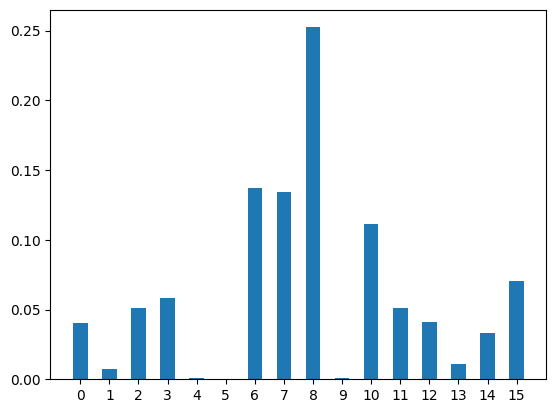



>>> Job ID: cl7ppqv75e3r3c6ddre0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00049, 13: 0.00857, 2: 0.0048, 1: 0.00909, 5: 0.0004, 12: 0.08892, 10: 0.0555, 15: 0.06941, 14: 0.02251, 11: 0.05861, 6: 0.109, 4: 0.05749, 8: 0.27881, 0: 0.05054, 3: 0.05042, 7: 0.13544}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00049, 13: 0.00857, 2: 0.0048, 1: 0.00909, 5: 0.0004, 12: 0.08892, 10: 0.0555, 15: 0.06941, 14: 0.02251, 11: 0.05861, 6: 0.109, 4: 0.05749, 8: 0.27881, 0: 0.05054, 3: 0.05042, 7: 0.13544}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
46
{9: 0.00049, 13: 0.00857, 2: 0.0048, 1: 0.00909, 5: 0.0004, 12: 0.08892, 10: 0.0555, 15: 0.06941, 14: 0.02251, 11: 0.05861, 6: 0.109, 4: 0.05749, 8: 0.27881, 0: 0.05054, 3: 0.05042, 7: 0.13544}


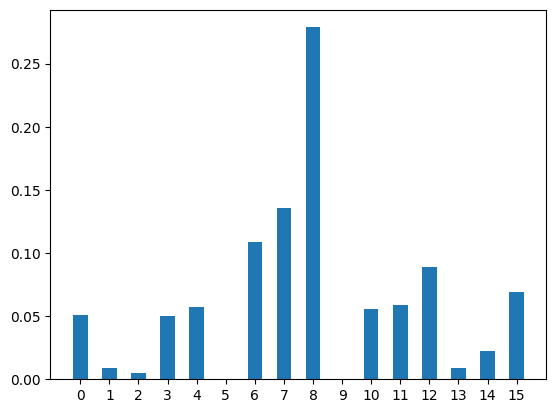



>>> Job ID: cl7ppsnl4q34kqgjve0g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01064, 9: 0.05948, 11: 0.07077, 5: 0.03285, 12: 0.10561, 6: 0.05188, 4: 0.04681, 7: 0.07298, 3: 0.03043, 0: 0.05446, 2: 0.00464, 13: 0.0094, 8: 0.34065, 10: 0.02355, 15: 0.06457, 14: 0.02128}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01064, 9: 0.05948, 11: 0.07077, 5: 0.03285, 12: 0.10561, 6: 0.05188, 4: 0.04681, 7: 0.07298, 3: 0.03043, 0: 0.05446, 2: 0.00464, 13: 0.0094, 8: 0.34065, 10: 0.02355, 15: 0.06457, 14: 0.02128}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
47
{1: 0.01064, 9: 0.05948, 11: 0.07077, 5: 0.03285, 12: 0.10561, 6: 0.05188, 4: 0.04681, 7: 0.07298, 3: 0.03043, 0: 0.05446, 2: 0.00464, 13: 0.0094, 8: 0.34065, 10: 0.02355, 15: 0.06457, 14: 0.02128}


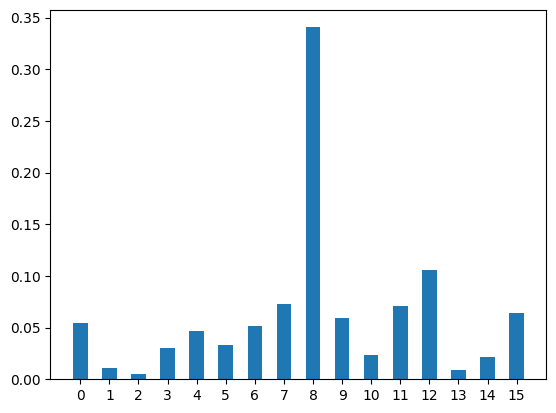



>>> Job ID: cl7pptlfa6vtjv8revt0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.01401, 2: 0.01133, 13: 0.01821, 11: 0.08265, 1: 0.04519, 6: 0.03995, 4: 0.05802, 9: 0.04262, 12: 0.09666, 5: 0.01977, 8: 0.34098, 10: 0.03447, 15: 0.03184, 3: 0.02094, 0: 0.05426, 7: 0.0891}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.01401, 2: 0.01133, 13: 0.01821, 11: 0.08265, 1: 0.04519, 6: 0.03995, 4: 0.05802, 9: 0.04262, 12: 0.09666, 5: 0.01977, 8: 0.34098, 10: 0.03447, 15: 0.03184, 3: 0.02094, 0: 0.05426, 7: 0.0891}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
48
{14: 0.01401, 2: 0.01133, 13: 0.01821, 11: 0.08265, 1: 0.04519, 6: 0.03995, 4: 0.05802, 9: 0.04262, 12: 0.09666, 5: 0.01977, 8: 0.34098, 10: 0.03447, 15: 0.03184, 3: 0.02094, 0: 0.05426, 7: 0.0891}


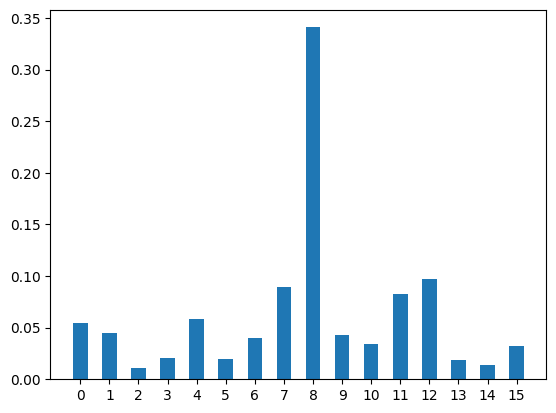



>>> Job ID: cl7ppuh6mcdhud4e0bug
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.0388, 13: 0.05245, 4: 0.02365, 6: 0.05, 1: 0.06379, 9: 0.2603, 15: 0.00313, 10: 0.03886, 8: 0.12457, 12: 0.05506, 5: 0.0598, 14: 0.03029, 0: 0.03385, 3: 0.00478, 7: 0.08704, 11: 0.07363}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.0388, 13: 0.05245, 4: 0.02365, 6: 0.05, 1: 0.06379, 9: 0.2603, 15: 0.00313, 10: 0.03886, 8: 0.12457, 12: 0.05506, 5: 0.0598, 14: 0.03029, 0: 0.03385, 3: 0.00478, 7: 0.08704, 11: 0.07363}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
49
{2: 0.0388, 13: 0.05245, 4: 0.02365, 6: 0.05, 1: 0.06379, 9: 0.2603, 15: 0.00313, 10: 0.03886, 8: 0.12457, 12: 0.05506, 5: 0.0598, 14: 0.03029, 0: 0.03385, 3: 0.00478, 7: 0.08704, 11: 0.07363}


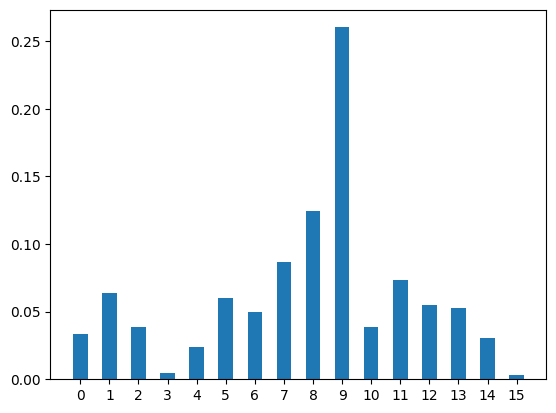

In [57]:
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  job = sampler.run(circuit, shots=100000)
  print(f">>> Job ID: {job.job_id()}")
  print(f">>> Job Status: {job.status()}")

  result = job.result()
  print(f">>> {result}")
  print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
  print(f"  > Metadata: {result.metadata[0]}")

  print(N)
  cnts = dict(result.quasi_dists[0])
  print(cnts)

  board = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  prob = []
  for i in range(16):
    prob.append(cnts.get(i, 0))

  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

#4. Adding Chutes and Ladders in Board

1) Chutes & Ladder Operator (Notated CL)

Chutes & Ladder Operator

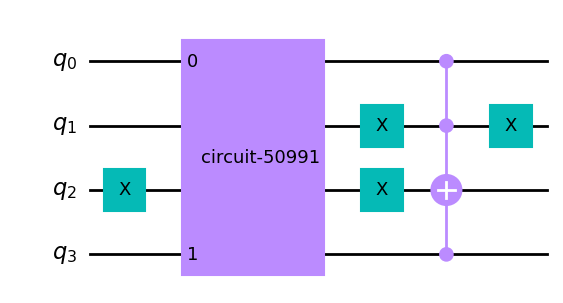

In [55]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

Verifying Chutes & Ladder Operator (3 <-> 10)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


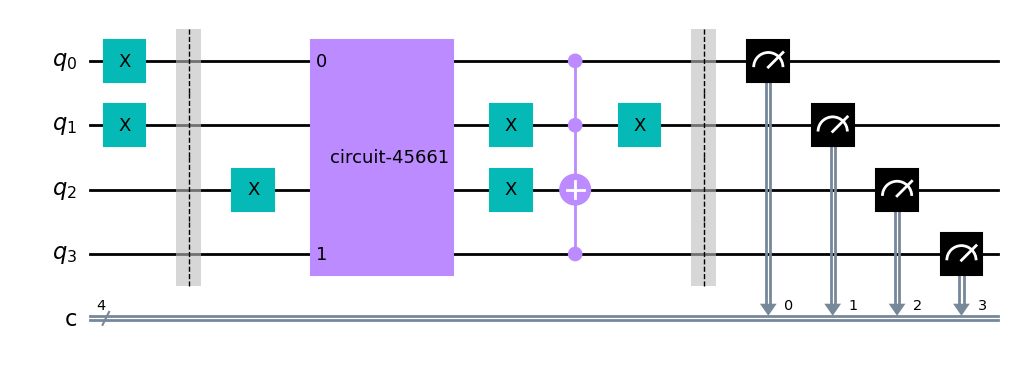

In [46]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl7pg615o5utp9bpr29g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


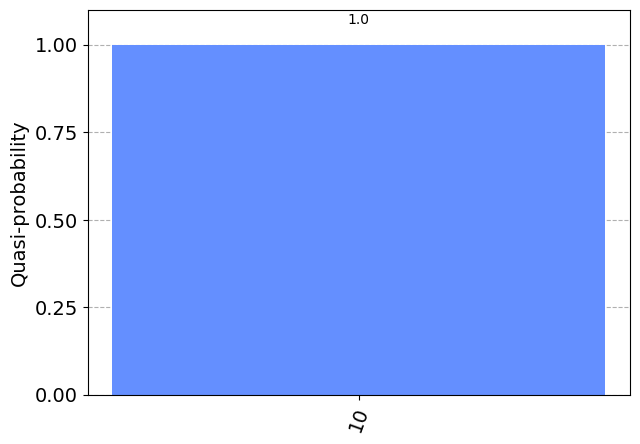

In [47]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 3 <-> 10
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying Chutes & Ladder Operator (9 <-> 13)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


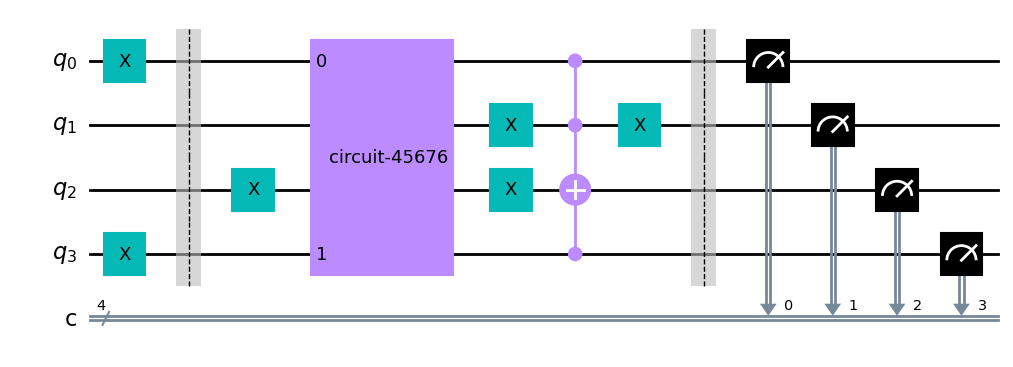

In [48]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(3)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl7ph5f75e3r3c6da4u0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


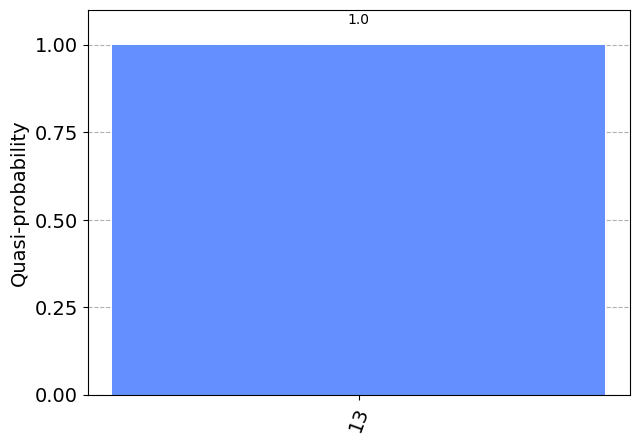

In [49]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 9 <-> 13
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying Chutes & Ladder Operator (7 <-> 7)

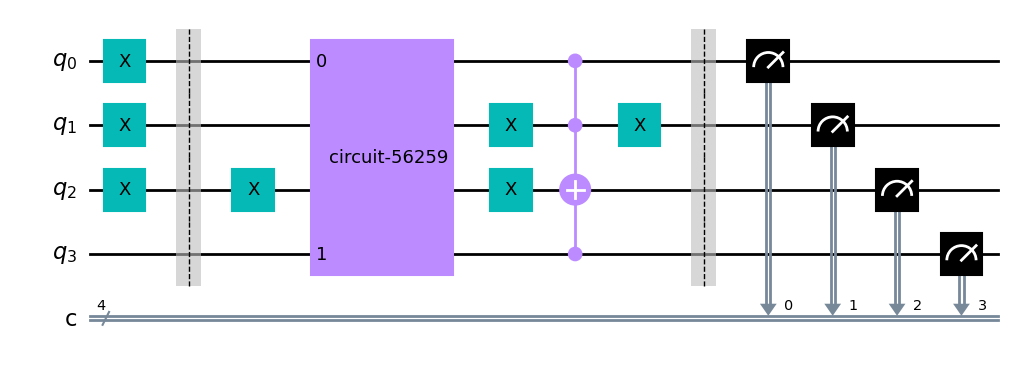

In [60]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)
CL.x(2)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl7psld7pau17fl139cg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{7: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {7: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


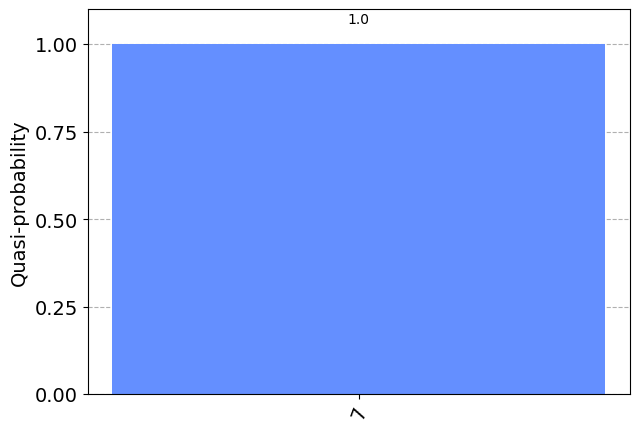

In [61]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 7 <-> 7
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Chutes & Ladders Board Evolution Operator

Chutes & Ladder Operator

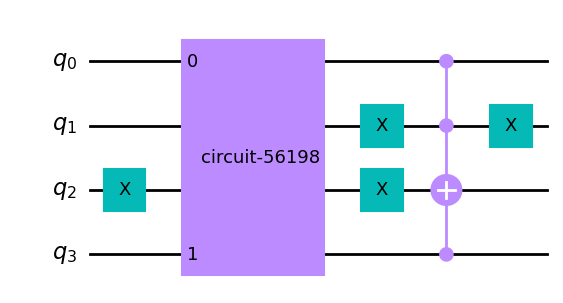

In [58]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

1 Step Chutes & Ladders Board Evolution Operator

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


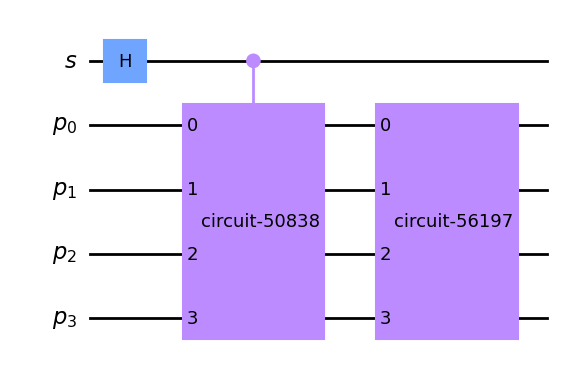

In [59]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])
circuit.append(CL, [p0, p1, p2, p3])

circuit.draw("mpl")

#5. Discussion

1) Role of Measurement in Quantum Chutes and Ladders Game

State measurement make wave function collapse. Collapse of wave function arises randomness of Quantum Chutes and Ladders Game.

2) Measurement between Turns

Repetition of measurement and initializaing states is just repetition of 1 step evolution. Repetition of measurement can obtain probability of each state after 1 step evolution.

3) No Measurement between Turns

DD

4) Quantum Analog of the "Memoryless" Nature of the Classical Game?

Quantum walks are quantum analogues of classical random walks.

Classical Walk : Walker occupy definite states and randomness arises from stocastic transitions defined by Markov's Process.

Quantum Walk : Randomness arises through quantum superposition of states, non-random, reversible unitary evolution and collapse of the wave function due to state measurements.

#6. Compare between #3 & #4 (10 Step)

1) Task 3 (Not Containing Chutes & Ladders)

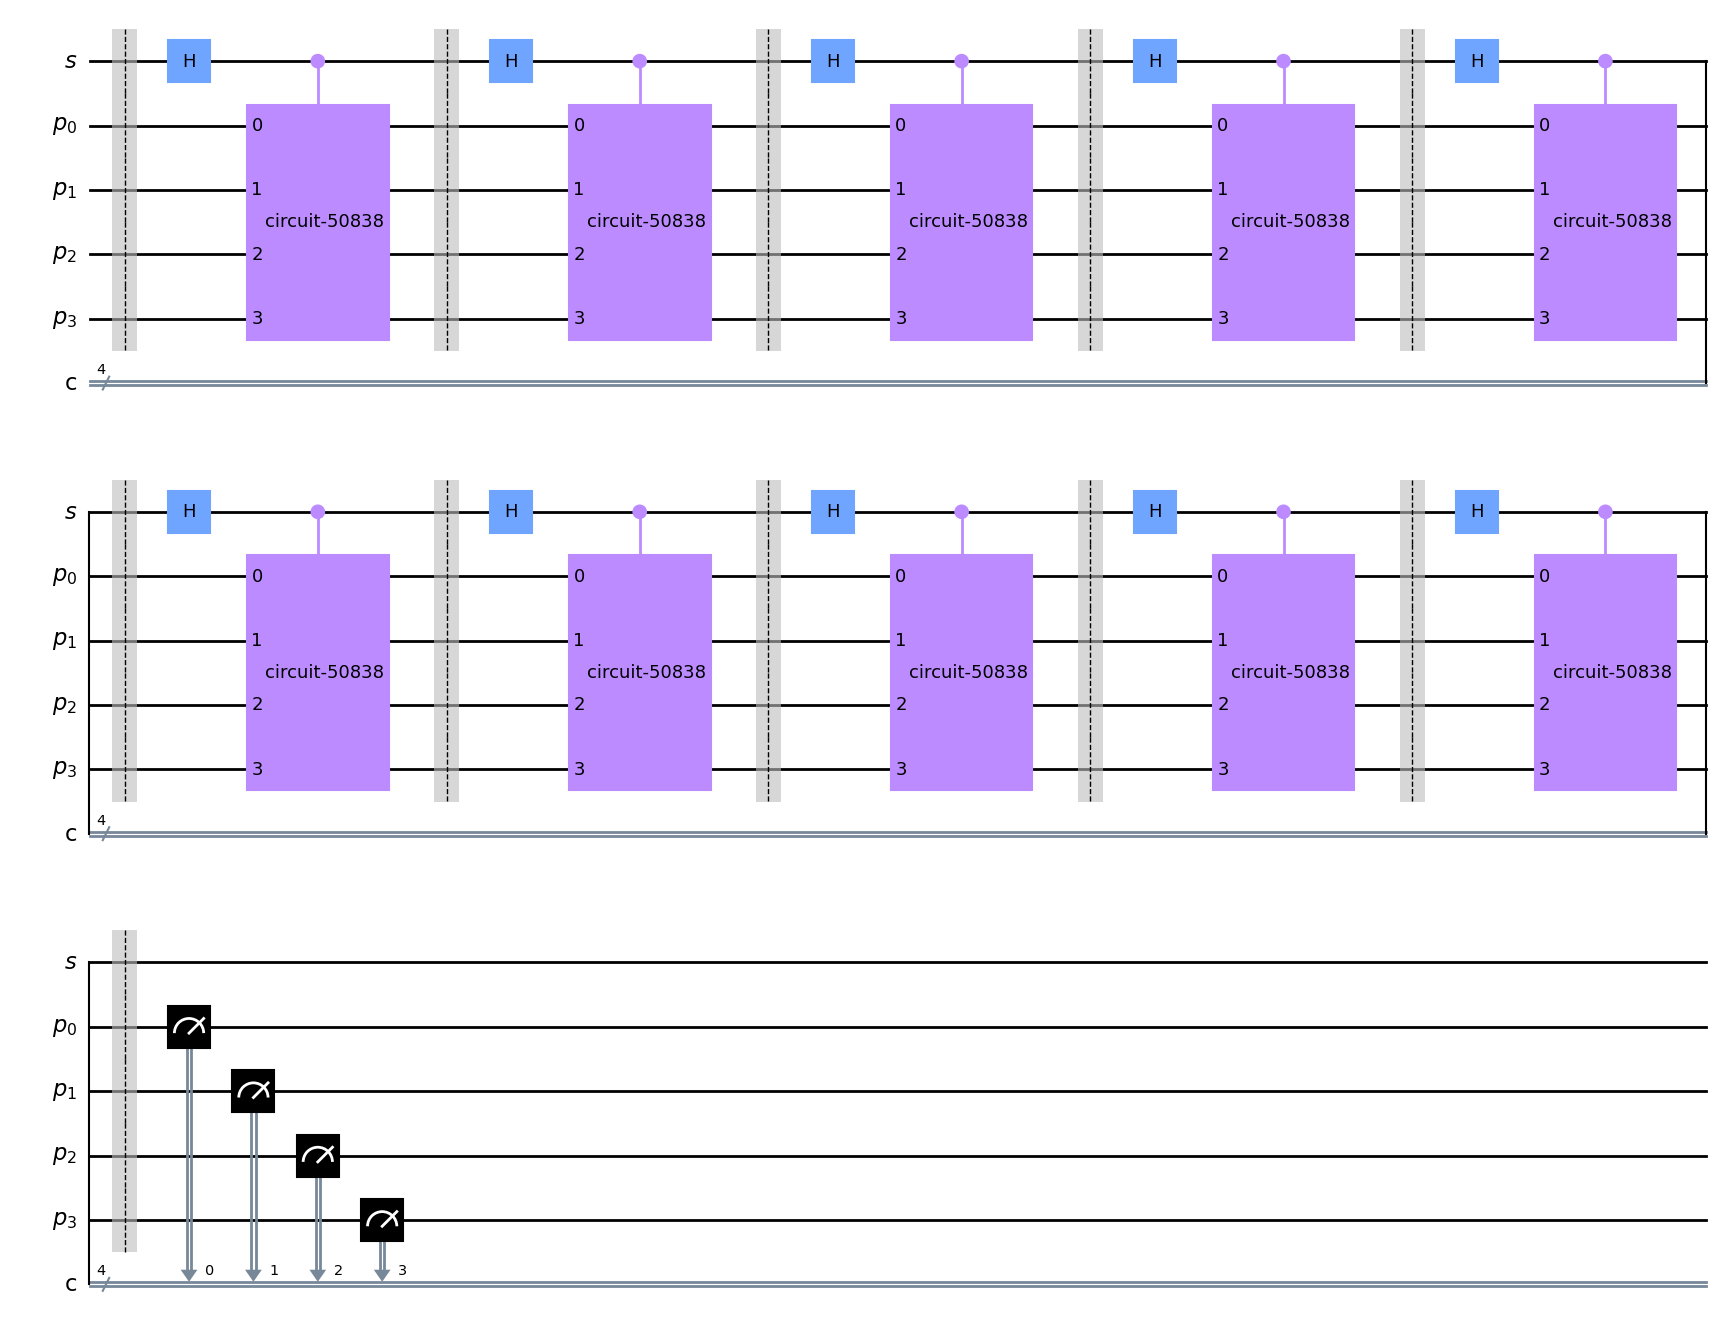

In [62]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl7q1fv75e3r3c6dh31g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.0008, 9: 0.04906, 8: 0.0872, 1: 0.08023, 5: 0.07001, 0: 0.00109, 3: 0.06134, 7: 0.06234, 2: 0.43947, 4: 0.09746, 6: 0.051}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.0008, 9: 0.04906, 8: 0.0872, 1: 0.08023, 5: 0.07001, 0: 0.00109, 3: 0.06134, 7: 0.06234, 2: 0.43947, 4: 0.09746, 6: 0.051}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

10


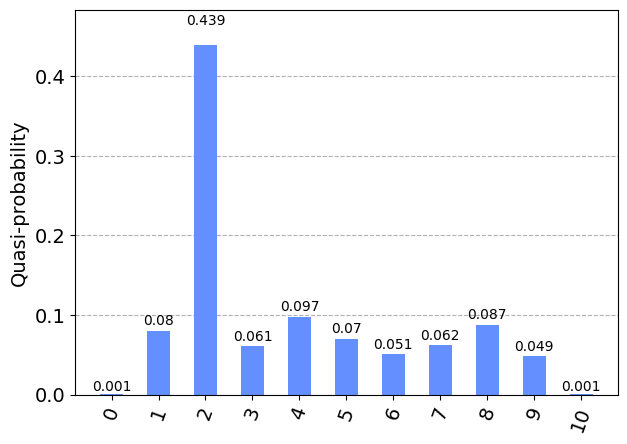

In [63]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Task 4 (Not Containing Chutes & Ladders)

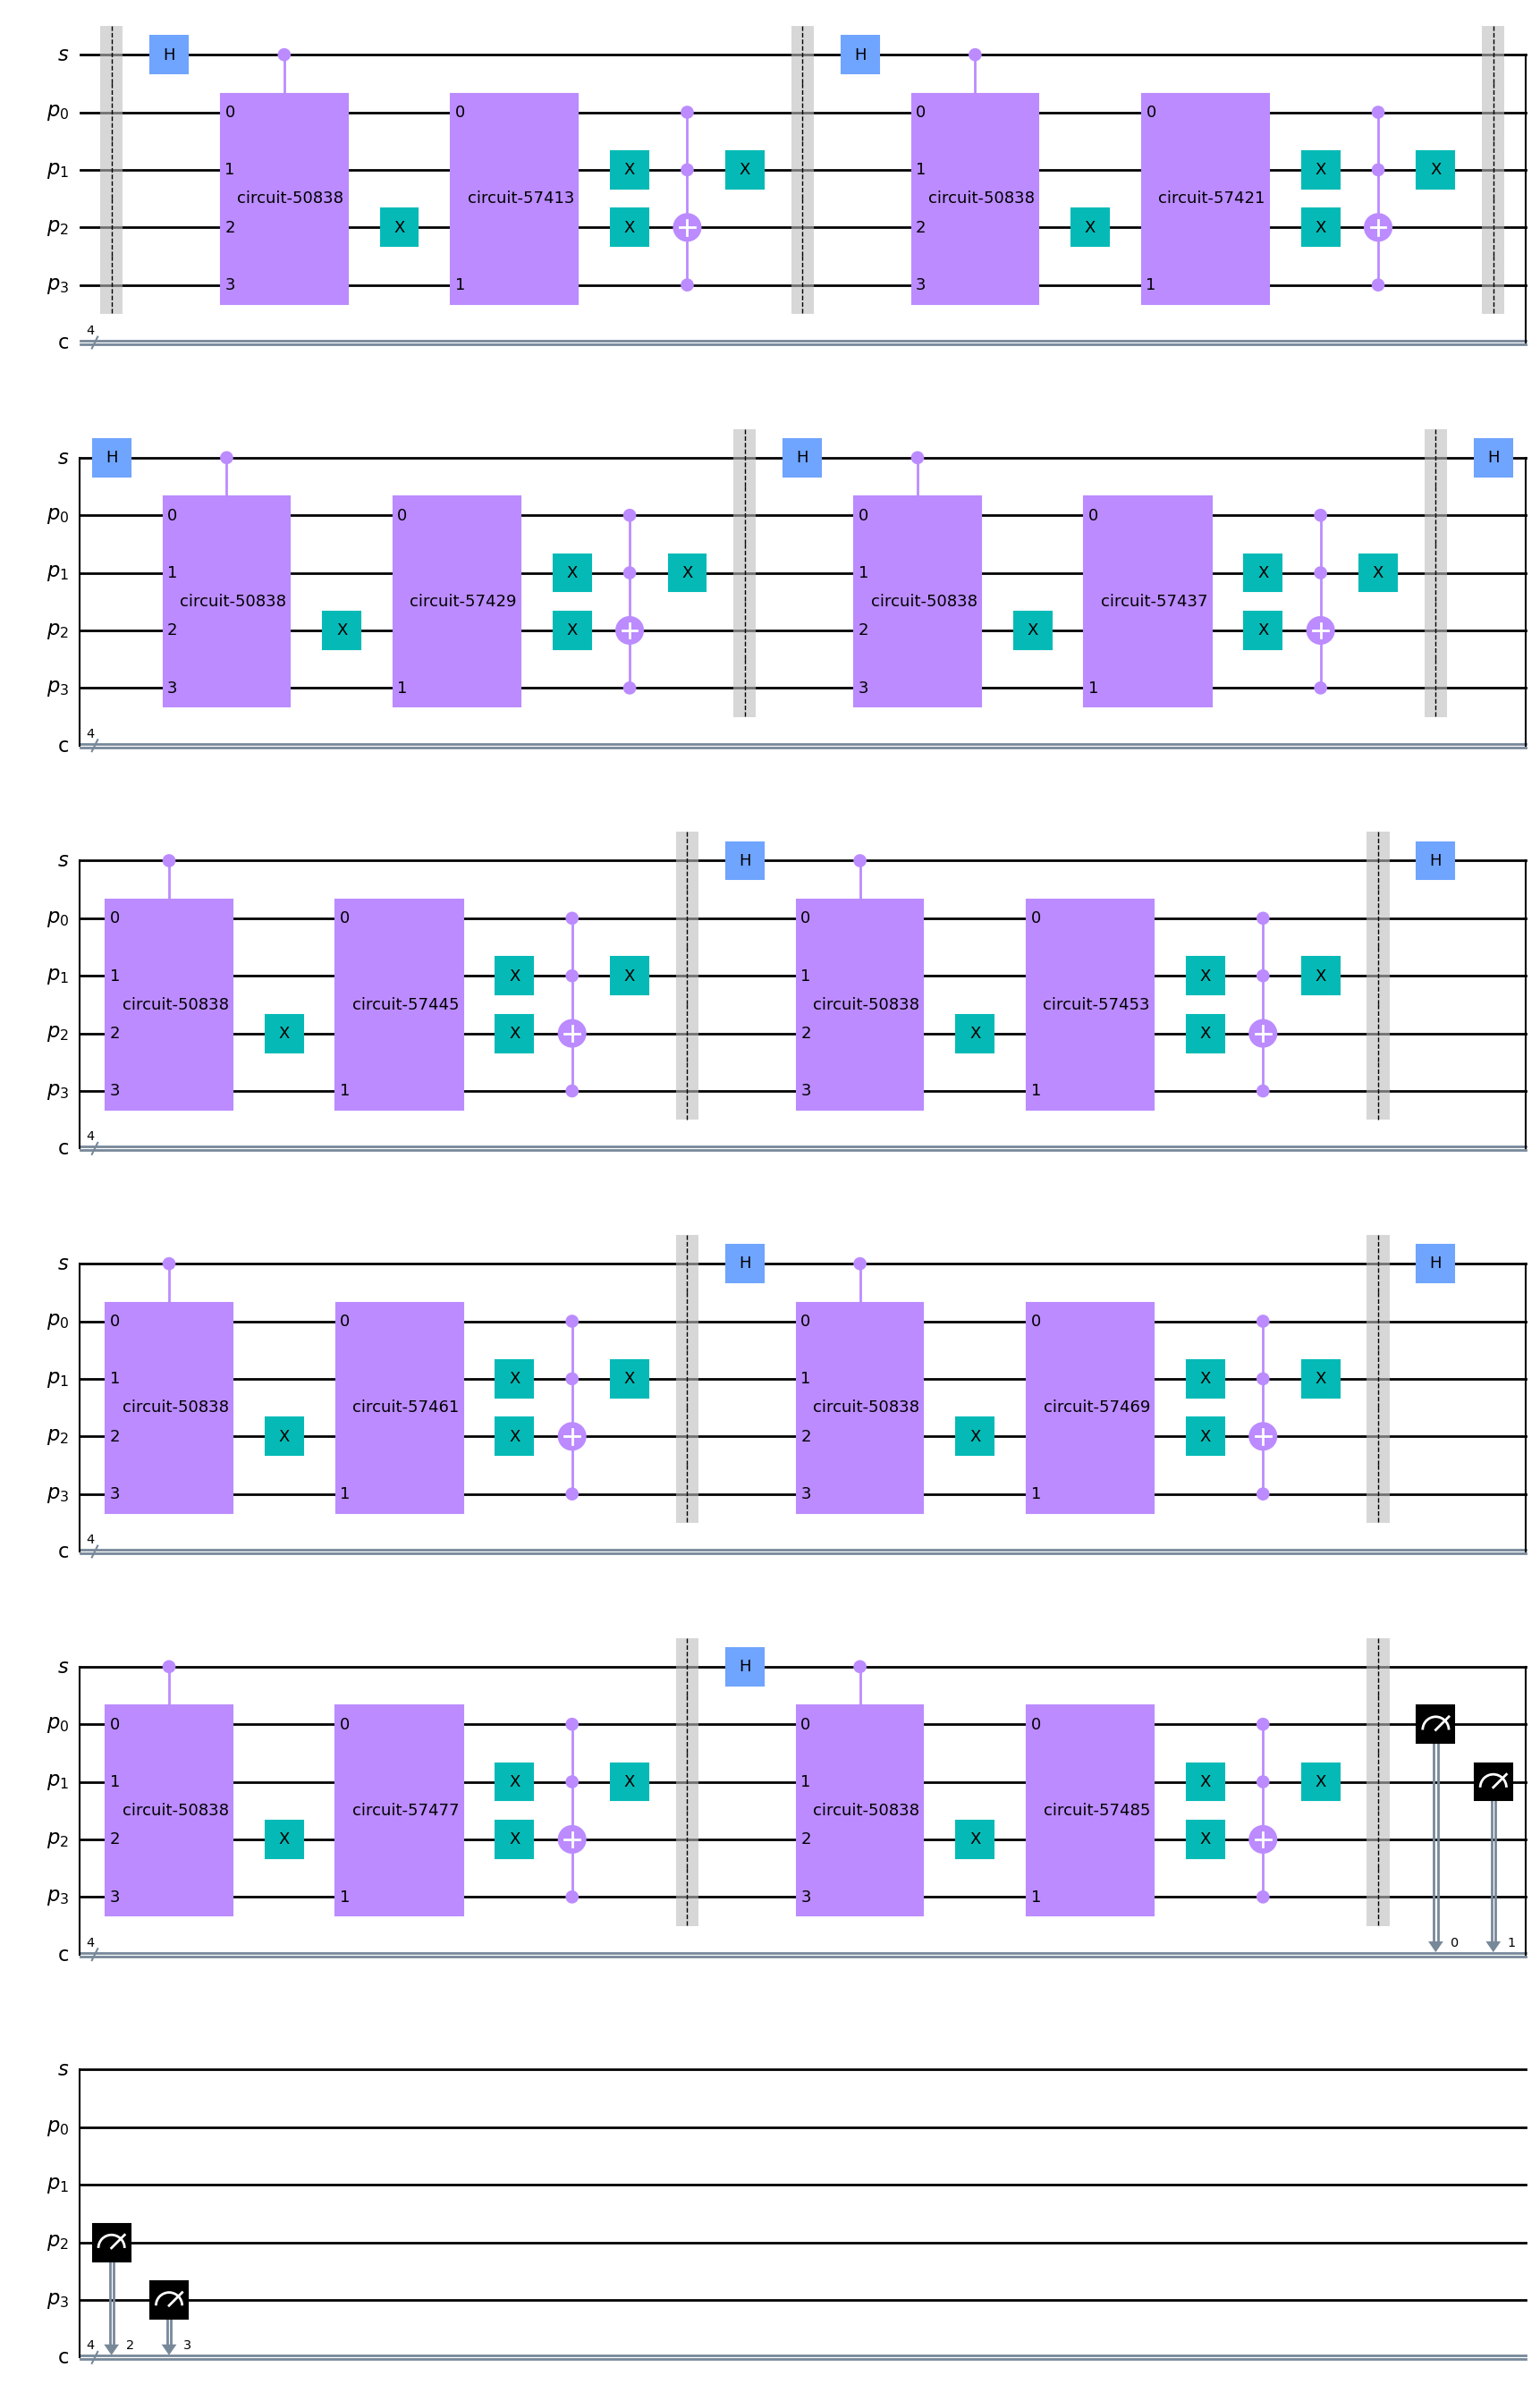

In [80]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

  qc1 = QuantumCircuit(2)
  qc1.swap(0,1)
  CSwapgate = qc1.to_gate().control(2)

  circuit.x(p2)
  circuit.append(CSwapgate, [p1,p2,p0,p3])
  circuit.x(p2)
  circuit.x(p1)
  circuit.append(C3XGate(), [p0,p1,p3,p2])
  circuit.x(p1)

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl7q9bd7pau17fl18fkg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.01004, 14: 0.00473, 9: 0.03651, 8: 0.02547, 0: 0.00213, 7: 0.01248, 3: 0.0802, 10: 0.07824, 15: 0.0164, 2: 0.43818, 5: 0.05906, 12: 0.0507, 11: 0.08027, 6: 0.00466, 4: 0.02021, 1: 0.08072}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.01004, 14: 0.00473, 9: 0.03651, 8: 0.02547, 0: 0.00213, 7: 0.01248, 3: 0.0802, 10: 0.07824, 15: 0.0164, 2: 0.43818, 5: 0.05906, 12: 0.0507, 11: 0.08027, 6: 0.00466, 4: 0.02021, 1: 0.08072}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

10


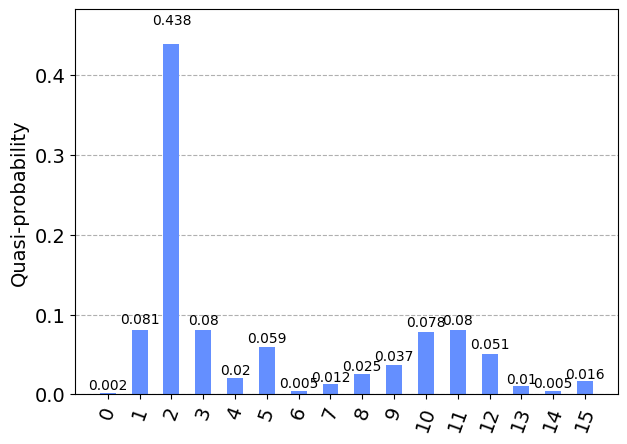

In [81]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

3) N Step Board Operator Containing Chutes & Ladders

>>> Job ID: cl7qbctfa6vtjv8rm6sg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
0
{0: 1.0}


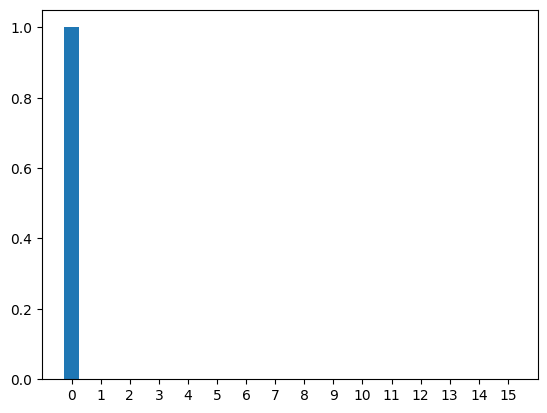



>>> Job ID: cl7qbdf75e3r3c6dl2hg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.49733, 0: 0.50267}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.49733, 0: 0.50267}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
1
{1: 0.49733, 0: 0.50267}


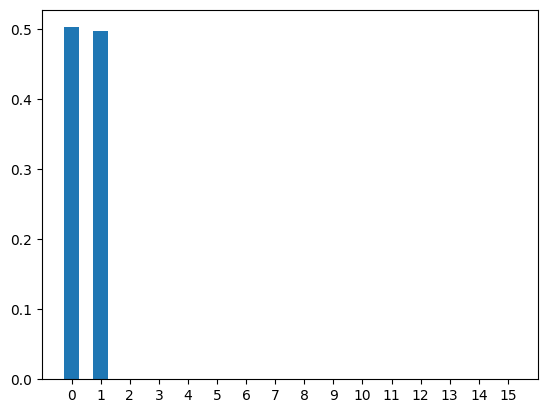



>>> Job ID: cl7qbdp6mcdhud4e7i4g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.49894, 2: 0.25127, 0: 0.24979}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.49894, 2: 0.25127, 0: 0.24979}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
2
{1: 0.49894, 2: 0.25127, 0: 0.24979}


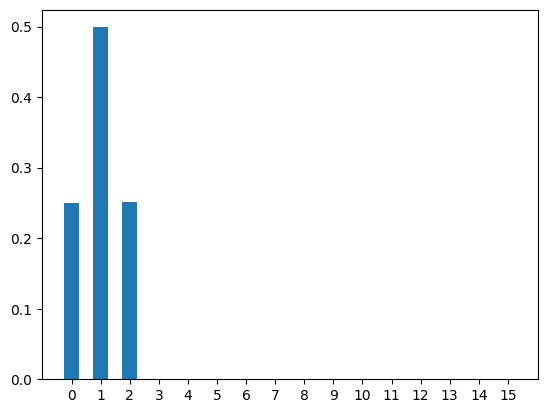



>>> Job ID: cl7qbelfa6vtjv8rm7l0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.12526, 1: 0.62642, 2: 0.12405, 0: 0.12427}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.12526, 1: 0.62642, 2: 0.12405, 0: 0.12427}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
3
{10: 0.12526, 1: 0.62642, 2: 0.12405, 0: 0.12427}


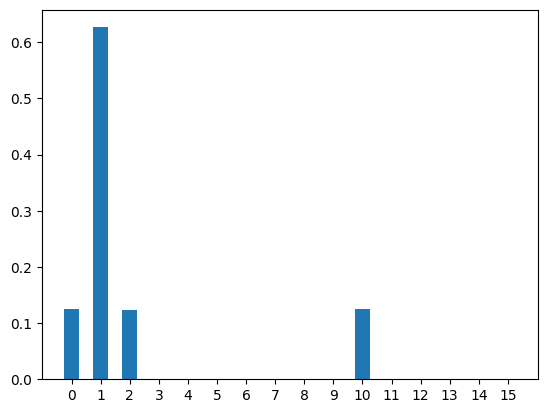



>>> Job ID: cl7qbgl7pau17fl19do0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.06267, 11: 0.06357, 3: 0.06195, 1: 0.62698, 0: 0.06147, 2: 0.12336}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.06267, 11: 0.06357, 3: 0.06195, 1: 0.62698, 0: 0.06147, 2: 0.12336}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
4
{10: 0.06267, 11: 0.06357, 3: 0.06195, 1: 0.62698, 0: 0.06147, 2: 0.12336}


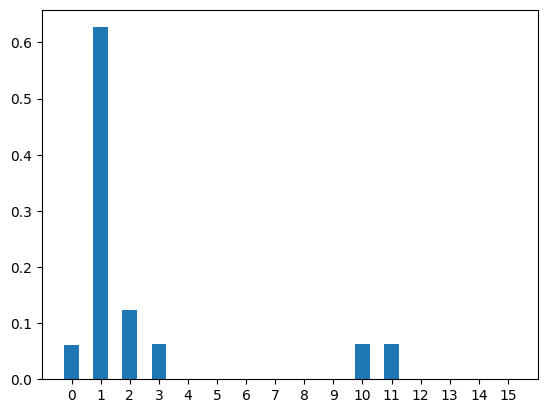



>>> Job ID: cl7qbh7l4q34kqgk6om0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.0617, 12: 0.03139, 2: 0.12633, 1: 0.5305, 10: 0.15515, 4: 0.0322, 0: 0.03128, 3: 0.03145}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.0617, 12: 0.03139, 2: 0.12633, 1: 0.5305, 10: 0.15515, 4: 0.0322, 0: 0.03128, 3: 0.03145}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
5
{11: 0.0617, 12: 0.03139, 2: 0.12633, 1: 0.5305, 10: 0.15515, 4: 0.0322, 0: 0.03128, 3: 0.03145}


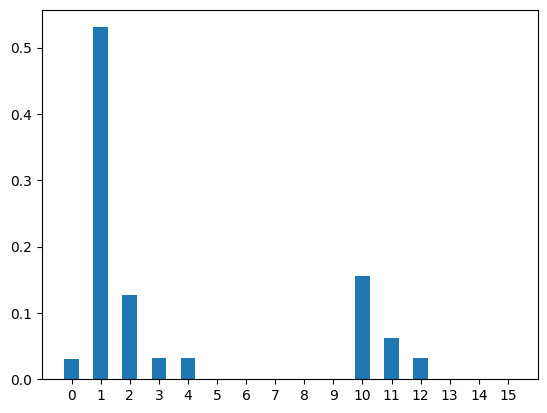



>>> Job ID: cl7qbhtfa6vtjv8rm9fg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.03096, 9: 0.01604, 0: 0.01491, 3: 0.01563, 1: 0.4051, 2: 0.20263, 11: 0.14252, 10: 0.07865, 5: 0.01536, 12: 0.0782}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.03096, 9: 0.01604, 0: 0.01491, 3: 0.01563, 1: 0.4051, 2: 0.20263, 11: 0.14252, 10: 0.07865, 5: 0.01536, 12: 0.0782}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
6
{4: 0.03096, 9: 0.01604, 0: 0.01491, 3: 0.01563, 1: 0.4051, 2: 0.20263, 11: 0.14252, 10: 0.07865, 5: 0.01536, 12: 0.0782}


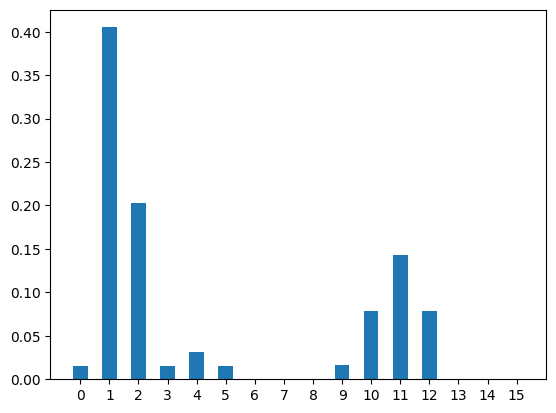



>>> Job ID: cl7qbif75e3r3c6dl520
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00811, 5: 0.03895, 12: 0.07854, 4: 0.00809, 6: 0.00811, 10: 0.01549, 9: 0.07035, 1: 0.2885, 2: 0.31962, 0: 0.00772, 3: 0.07797, 11: 0.07855}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00811, 5: 0.03895, 12: 0.07854, 4: 0.00809, 6: 0.00811, 10: 0.01549, 9: 0.07035, 1: 0.2885, 2: 0.31962, 0: 0.00772, 3: 0.07797, 11: 0.07855}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
7
{13: 0.00811, 5: 0.03895, 12: 0.07854, 4: 0.00809, 6: 0.00811, 10: 0.01549, 9: 0.07035, 1: 0.2885, 2: 0.31962, 0: 0.00772, 3: 0.07797, 11: 0.07855}


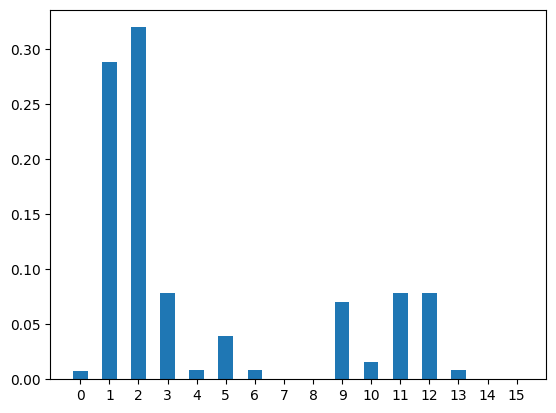



>>> Job ID: cl7qbj775e3r3c6dl5c0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00347, 13: 0.03497, 11: 0.06275, 10: 0.01926, 5: 0.00812, 12: 0.07834, 9: 0.01911, 2: 0.41374, 6: 0.03941, 4: 0.06531, 1: 0.19599, 7: 0.00416, 0: 0.0038, 3: 0.05157}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00347, 13: 0.03497, 11: 0.06275, 10: 0.01926, 5: 0.00812, 12: 0.07834, 9: 0.01911, 2: 0.41374, 6: 0.03941, 4: 0.06531, 1: 0.19599, 7: 0.00416, 0: 0.0038, 3: 0.05157}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
8
{14: 0.00347, 13: 0.03497, 11: 0.06275, 10: 0.01926, 5: 0.00812, 12: 0.07834, 9: 0.01911, 2: 0.41374, 6: 0.03941, 4: 0.06531, 1: 0.19599, 7: 0.00416, 0: 0.0038, 3: 0.05157}


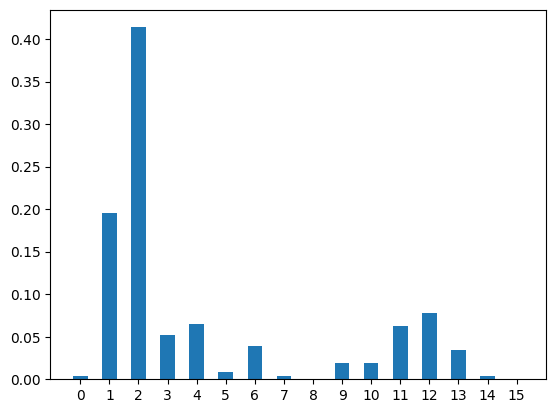



>>> Job ID: cl7qbjp6mcdhud4e7kvg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.00191, 13: 0.00202, 4: 0.05154, 6: 0.00748, 11: 0.04851, 9: 0.08754, 5: 0.0252, 12: 0.03923, 1: 0.12703, 2: 0.45142, 14: 0.01922, 15: 0.00185, 10: 0.08128, 0: 0.00212, 3: 0.02009, 7: 0.03356}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.00191, 13: 0.00202, 4: 0.05154, 6: 0.00748, 11: 0.04851, 9: 0.08754, 5: 0.0252, 12: 0.03923, 1: 0.12703, 2: 0.45142, 14: 0.01922, 15: 0.00185, 10: 0.08128, 0: 0.00212, 3: 0.02009, 7: 0.03356}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
9
{8: 0.00191, 13: 0.00202, 4: 0.05154, 6: 0.00748, 11: 0.04851, 9: 0.08754, 5: 0.0252, 12: 0.03923, 1: 0.12703, 2: 0.45142, 14: 0.01922, 15: 0.00185, 10: 0.08128, 0: 0.00212, 3: 0.02009, 7: 0.03356}


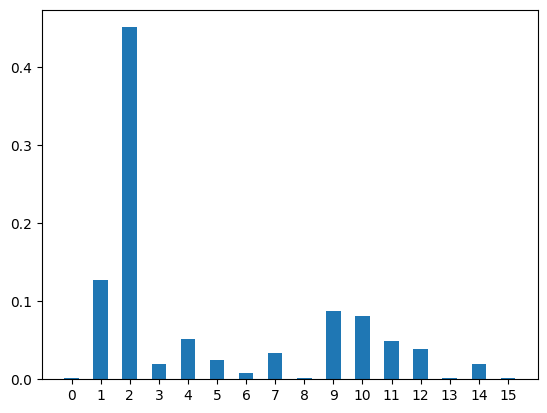



>>> Job ID: cl7qbkl7pau17fl19fc0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00506, 6: 0.00475, 4: 0.01965, 9: 0.0363, 13: 0.01048, 12: 0.05177, 5: 0.05932, 1: 0.08181, 8: 0.02538, 15: 0.01627, 10: 0.07861, 2: 0.43766, 0: 0.00173, 7: 0.01201, 3: 0.07939, 11: 0.07981}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00506, 6: 0.00475, 4: 0.01965, 9: 0.0363, 13: 0.01048, 12: 0.05177, 5: 0.05932, 1: 0.08181, 8: 0.02538, 15: 0.01627, 10: 0.07861, 2: 0.43766, 0: 0.00173, 7: 0.01201, 3: 0.07939, 11: 0.07981}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
10
{14: 0.00506, 6: 0.00475, 4: 0.01965, 9: 0.0363, 13: 0.01048, 12: 0.05177, 5: 0.05932, 1: 0.08181, 8: 0.02538, 15: 0.01627, 10: 0.07861, 2: 0.43766, 0: 0.00173, 7: 0.01201, 3: 0.07939, 11: 0.07981}


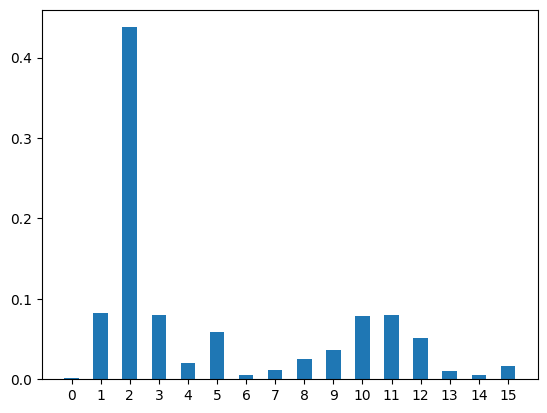



>>> Job ID: cl7qblfl4q34kqgk6qe0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00646, 13: 0.03034, 8: 0.01959, 7: 0.00098, 3: 0.03122, 0: 0.01199, 11: 0.10136, 15: 0.00474, 10: 0.11395, 5: 0.01819, 12: 0.08822, 9: 0.0209, 2: 0.38537, 1: 0.05049, 6: 0.06423, 4: 0.05197}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00646, 13: 0.03034, 8: 0.01959, 7: 0.00098, 3: 0.03122, 0: 0.01199, 11: 0.10136, 15: 0.00474, 10: 0.11395, 5: 0.01819, 12: 0.08822, 9: 0.0209, 2: 0.38537, 1: 0.05049, 6: 0.06423, 4: 0.05197}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
11
{14: 0.00646, 13: 0.03034, 8: 0.01959, 7: 0.00098, 3: 0.03122, 0: 0.01199, 11: 0.10136, 15: 0.00474, 10: 0.11395, 5: 0.01819, 12: 0.08822, 9: 0.0209, 2: 0.38537, 1: 0.05049, 6: 0.06423, 4: 0.05197}


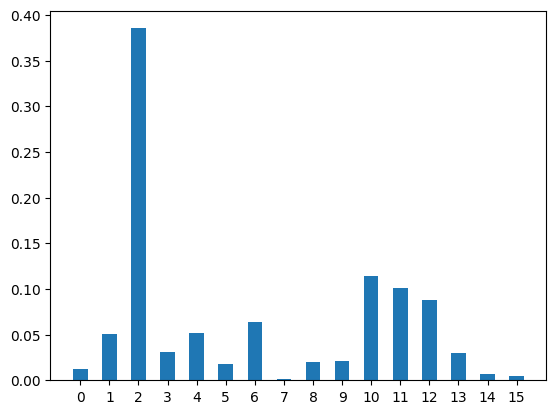



>>> Job ID: cl7qbm16mcdhud4e7ls0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00057, 1: 0.04089, 14: 0.02983, 8: 0.00128, 13: 0.03952, 11: 0.10383, 15: 0.00707, 10: 0.11691, 0: 0.00966, 3: 0.10885, 7: 0.0478, 5: 0.02692, 12: 0.09201, 2: 0.31609, 4: 0.03791, 6: 0.02086}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00057, 1: 0.04089, 14: 0.02983, 8: 0.00128, 13: 0.03952, 11: 0.10383, 15: 0.00707, 10: 0.11691, 0: 0.00966, 3: 0.10885, 7: 0.0478, 5: 0.02692, 12: 0.09201, 2: 0.31609, 4: 0.03791, 6: 0.02086}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
12
{9: 0.00057, 1: 0.04089, 14: 0.02983, 8: 0.00128, 13: 0.03952, 11: 0.10383, 15: 0.00707, 10: 0.11691, 0: 0.00966, 3: 0.10885, 7: 0.0478, 5: 0.02692, 12: 0.09201, 2: 0.31609, 4: 0.03791, 6: 0.02086}


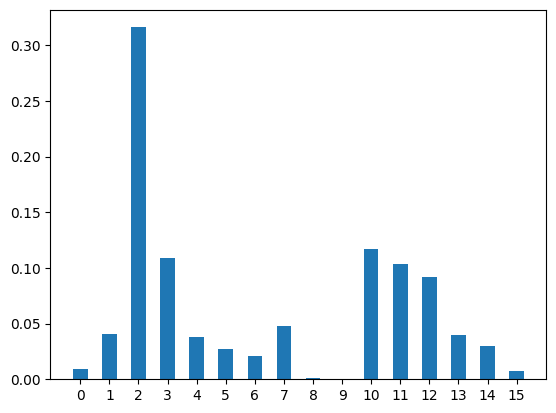



>>> Job ID: cl7qbmp5o5utp9bq6lu0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 2e-05, 8: 0.02511, 14: 0.01238, 9: 0.06625, 5: 0.00964, 12: 0.09312, 1: 0.01545, 2: 0.26232, 15: 0.01853, 10: 0.14991, 0: 0.00595, 7: 0.02511, 3: 0.11, 6: 0.04794, 4: 0.07531, 11: 0.08296}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 2e-05, 8: 0.02511, 14: 0.01238, 9: 0.06625, 5: 0.00964, 12: 0.09312, 1: 0.01545, 2: 0.26232, 15: 0.01853, 10: 0.14991, 0: 0.00595, 7: 0.02511, 3: 0.11, 6: 0.04794, 4: 0.07531, 11: 0.08296}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
13
{13: 2e-05, 8: 0.02511, 14: 0.01238, 9: 0.06625, 5: 0.00964, 12: 0.09312, 1: 0.01545, 2: 0.26232, 15: 0.01853, 10: 0.14991, 0: 0.00595, 7: 0.02511, 3: 0.11, 6: 0.04794, 4: 0.07531, 11: 0.08296}


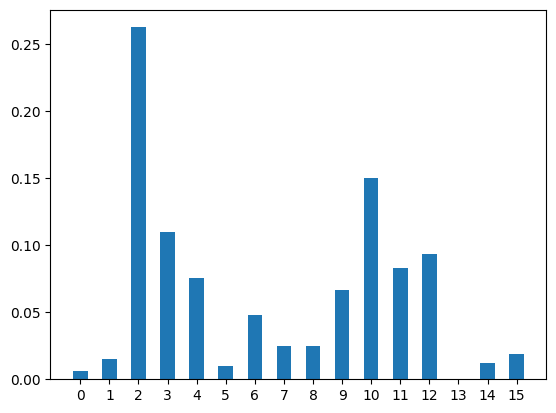



>>> Job ID: cl7qbnd7pau17fl19g50
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01998, 8: 0.03433, 15: 0.02011, 10: 0.1036, 11: 0.06832, 13: 0.00792, 0: 0.00791, 3: 0.21552, 7: 0.05391, 9: 0.08714, 6: 0.00632, 4: 0.04903, 2: 0.21904, 12: 0.02183, 5: 0.07921, 14: 0.00583}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01998, 8: 0.03433, 15: 0.02011, 10: 0.1036, 11: 0.06832, 13: 0.00792, 0: 0.00791, 3: 0.21552, 7: 0.05391, 9: 0.08714, 6: 0.00632, 4: 0.04903, 2: 0.21904, 12: 0.02183, 5: 0.07921, 14: 0.00583}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
14
{1: 0.01998, 8: 0.03433, 15: 0.02011, 10: 0.1036, 11: 0.06832, 13: 0.00792, 0: 0.00791, 3: 0.21552, 7: 0.05391, 9: 0.08714, 6: 0.00632, 4: 0.04903, 2: 0.21904, 12: 0.02183, 5: 0.07921, 14: 0.00583}


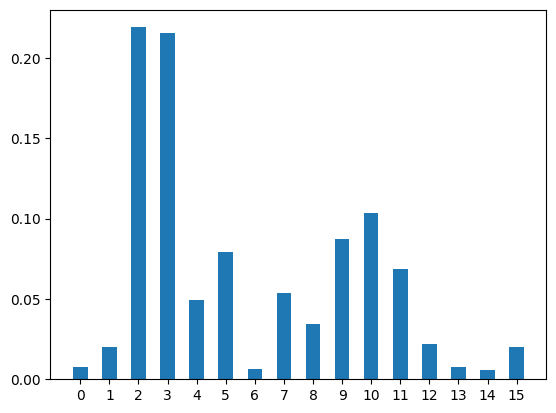



>>> Job ID: cl7qbof75e3r3c6dl7l0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01725, 8: 0.04726, 9: 0.02518, 15: 0.00486, 10: 0.12436, 12: 0.02633, 5: 0.07274, 14: 0.00426, 3: 0.1482, 7: 0.01297, 0: 0.0268, 2: 0.10464, 13: 0.0767, 6: 0.02442, 4: 0.23857, 11: 0.04546}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01725, 8: 0.04726, 9: 0.02518, 15: 0.00486, 10: 0.12436, 12: 0.02633, 5: 0.07274, 14: 0.00426, 3: 0.1482, 7: 0.01297, 0: 0.0268, 2: 0.10464, 13: 0.0767, 6: 0.02442, 4: 0.23857, 11: 0.04546}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
15
{1: 0.01725, 8: 0.04726, 9: 0.02518, 15: 0.00486, 10: 0.12436, 12: 0.02633, 5: 0.07274, 14: 0.00426, 3: 0.1482, 7: 0.01297, 0: 0.0268, 2: 0.10464, 13: 0.0767, 6: 0.02442, 4: 0.23857, 11: 0.04546}


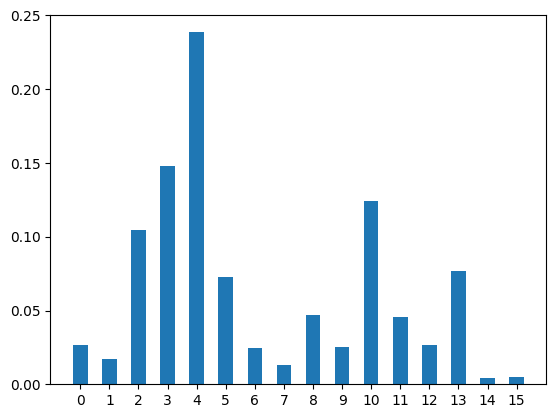



>>> Job ID: cl7qbp15o5utp9bq6mpg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00016, 8: 0.03528, 13: 0.0261, 1: 0.03558, 15: 0.00466, 10: 0.0444, 7: 0.00582, 0: 0.00529, 3: 0.11707, 9: 0.08201, 11: 0.04758, 4: 0.34308, 6: 0.02426, 2: 0.07443, 12: 0.05078, 5: 0.1035}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00016, 8: 0.03528, 13: 0.0261, 1: 0.03558, 15: 0.00466, 10: 0.0444, 7: 0.00582, 0: 0.00529, 3: 0.11707, 9: 0.08201, 11: 0.04758, 4: 0.34308, 6: 0.02426, 2: 0.07443, 12: 0.05078, 5: 0.1035}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
16
{14: 0.00016, 8: 0.03528, 13: 0.0261, 1: 0.03558, 15: 0.00466, 10: 0.0444, 7: 0.00582, 0: 0.00529, 3: 0.11707, 9: 0.08201, 11: 0.04758, 4: 0.34308, 6: 0.02426, 2: 0.07443, 12: 0.05078, 5: 0.1035}


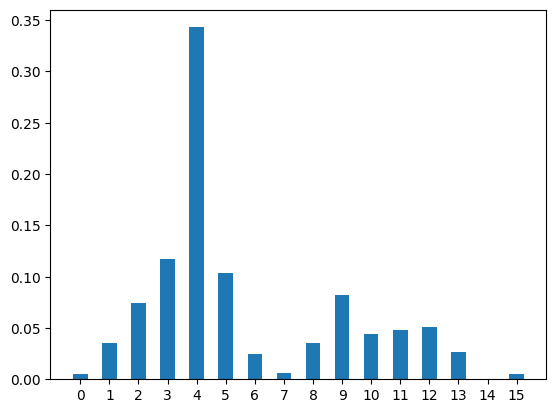



>>> Job ID: cl7qbpv75e3r3c6dl8dg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00607, 1: 0.00163, 11: 0.0548, 9: 0.01929, 8: 0.00516, 2: 0.09235, 13: 0.09516, 15: 0.00437, 10: 0.02726, 0: 0.00596, 3: 0.05712, 7: 0.02515, 6: 0.00426, 4: 0.44564, 12: 0.05278, 5: 0.103}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00607, 1: 0.00163, 11: 0.0548, 9: 0.01929, 8: 0.00516, 2: 0.09235, 13: 0.09516, 15: 0.00437, 10: 0.02726, 0: 0.00596, 3: 0.05712, 7: 0.02515, 6: 0.00426, 4: 0.44564, 12: 0.05278, 5: 0.103}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
17
{14: 0.00607, 1: 0.00163, 11: 0.0548, 9: 0.01929, 8: 0.00516, 2: 0.09235, 13: 0.09516, 15: 0.00437, 10: 0.02726, 0: 0.00596, 3: 0.05712, 7: 0.02515, 6: 0.00426, 4: 0.44564, 12: 0.05278, 5: 0.103}


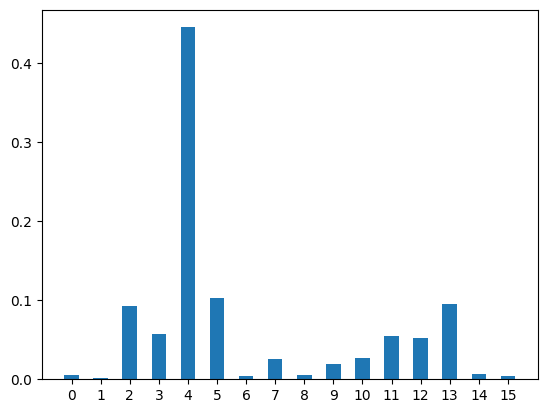



>>> Job ID: cl7qbqt7pau17fl19hag
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00237, 8: 0.01893, 15: 0.00616, 10: 0.05775, 11: 0.04589, 12: 0.02552, 5: 0.07041, 13: 0.01676, 2: 0.08899, 4: 0.41306, 6: 0.06866, 14: 0.09767, 0: 0.00654, 7: 0.0099, 3: 0.03459, 9: 0.0368}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00237, 8: 0.01893, 15: 0.00616, 10: 0.05775, 11: 0.04589, 12: 0.02552, 5: 0.07041, 13: 0.01676, 2: 0.08899, 4: 0.41306, 6: 0.06866, 14: 0.09767, 0: 0.00654, 7: 0.0099, 3: 0.03459, 9: 0.0368}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
18
{1: 0.00237, 8: 0.01893, 15: 0.00616, 10: 0.05775, 11: 0.04589, 12: 0.02552, 5: 0.07041, 13: 0.01676, 2: 0.08899, 4: 0.41306, 6: 0.06866, 14: 0.09767, 0: 0.00654, 7: 0.0099, 3: 0.03459, 9: 0.0368}


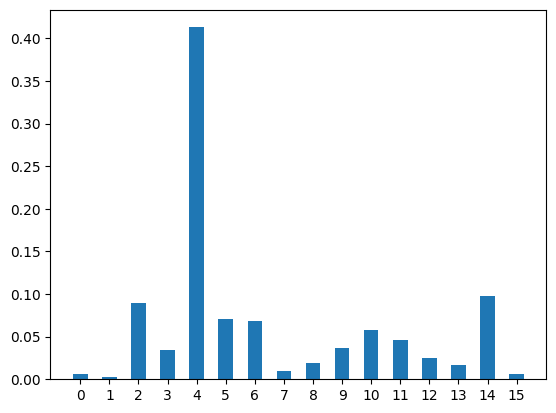



>>> Job ID: cl7qbrh6mcdhud4e7nog
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00198, 1: 0.00581, 13: 0.02427, 8: 0.00609, 14: 0.05068, 11: 0.04546, 6: 0.10279, 4: 0.23282, 10: 0.07981, 15: 0.06473, 12: 0.04383, 5: 0.1839, 2: 0.04411, 0: 0.00647, 7: 0.04164, 3: 0.06561}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00198, 1: 0.00581, 13: 0.02427, 8: 0.00609, 14: 0.05068, 11: 0.04546, 6: 0.10279, 4: 0.23282, 10: 0.07981, 15: 0.06473, 12: 0.04383, 5: 0.1839, 2: 0.04411, 0: 0.00647, 7: 0.04164, 3: 0.06561}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
19
{9: 0.00198, 1: 0.00581, 13: 0.02427, 8: 0.00609, 14: 0.05068, 11: 0.04546, 6: 0.10279, 4: 0.23282, 10: 0.07981, 15: 0.06473, 12: 0.04383, 5: 0.1839, 2: 0.04411, 0: 0.00647, 7: 0.04164, 3: 0.06561}


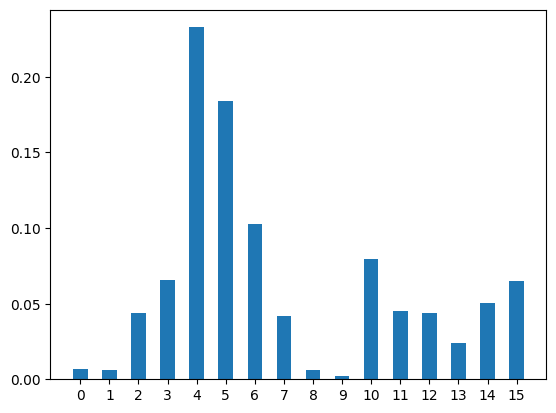



>>> Job ID: cl7qbsh5o5utp9bq6o50
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.0003, 13: 0.00391, 11: 0.00123, 8: 0.00536, 1: 0.0085, 2: 0.01504, 15: 0.03306, 10: 0.09491, 12: 0.09025, 5: 0.17845, 14: 0.07079, 6: 0.19594, 4: 0.14373, 0: 0.03498, 3: 0.08061, 7: 0.04294}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.0003, 13: 0.00391, 11: 0.00123, 8: 0.00536, 1: 0.0085, 2: 0.01504, 15: 0.03306, 10: 0.09491, 12: 0.09025, 5: 0.17845, 14: 0.07079, 6: 0.19594, 4: 0.14373, 0: 0.03498, 3: 0.08061, 7: 0.04294}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
20
{9: 0.0003, 13: 0.00391, 11: 0.00123, 8: 0.00536, 1: 0.0085, 2: 0.01504, 15: 0.03306, 10: 0.09491, 12: 0.09025, 5: 0.17845, 14: 0.07079, 6: 0.19594, 4: 0.14373, 0: 0.03498, 3: 0.08061, 7: 0.04294}


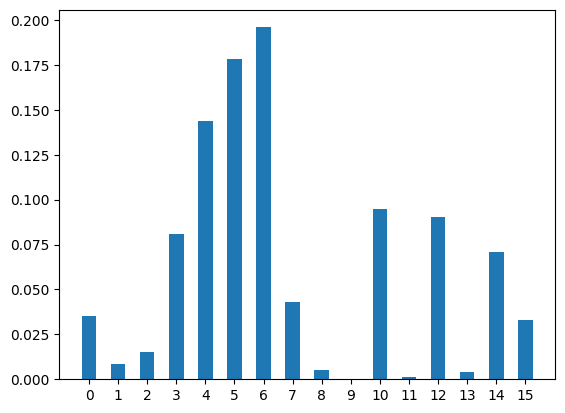



>>> Job ID: cl7qbth5o5utp9bq6oig
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00012, 9: 0.00181, 2: 0.0014, 8: 0.016, 11: 0.00399, 14: 0.00425, 1: 0.03242, 15: 0.07746, 10: 0.0668, 0: 0.03327, 7: 0.03216, 3: 0.09226, 12: 0.09012, 5: 0.24422, 6: 0.19478, 4: 0.10894}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00012, 9: 0.00181, 2: 0.0014, 8: 0.016, 11: 0.00399, 14: 0.00425, 1: 0.03242, 15: 0.07746, 10: 0.0668, 0: 0.03327, 7: 0.03216, 3: 0.09226, 12: 0.09012, 5: 0.24422, 6: 0.19478, 4: 0.10894}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
21
{13: 0.00012, 9: 0.00181, 2: 0.0014, 8: 0.016, 11: 0.00399, 14: 0.00425, 1: 0.03242, 15: 0.07746, 10: 0.0668, 0: 0.03327, 7: 0.03216, 3: 0.09226, 12: 0.09012, 5: 0.24422, 6: 0.19478, 4: 0.10894}


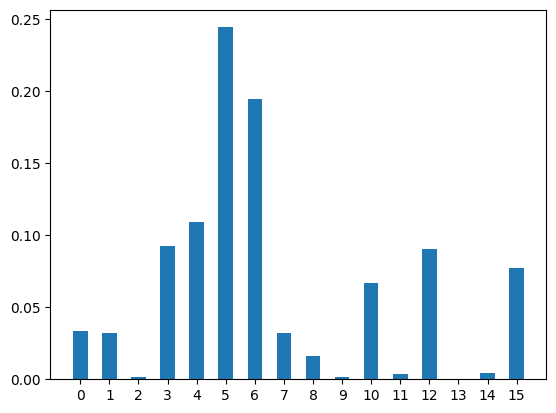



>>> Job ID: cl7qbulfa6vtjv8rmeg0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00438, 13: 0.01526, 11: 0.00623, 1: 0.03549, 2: 0.03027, 8: 0.01768, 5: 0.23579, 12: 0.04374, 9: 0.04848, 15: 0.01389, 10: 0.05186, 3: 0.06125, 0: 0.06375, 7: 0.11521, 6: 0.11151, 4: 0.14521}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00438, 13: 0.01526, 11: 0.00623, 1: 0.03549, 2: 0.03027, 8: 0.01768, 5: 0.23579, 12: 0.04374, 9: 0.04848, 15: 0.01389, 10: 0.05186, 3: 0.06125, 0: 0.06375, 7: 0.11521, 6: 0.11151, 4: 0.14521}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
22
{14: 0.00438, 13: 0.01526, 11: 0.00623, 1: 0.03549, 2: 0.03027, 8: 0.01768, 5: 0.23579, 12: 0.04374, 9: 0.04848, 15: 0.01389, 10: 0.05186, 3: 0.06125, 0: 0.06375, 7: 0.11521, 6: 0.11151, 4: 0.14521}


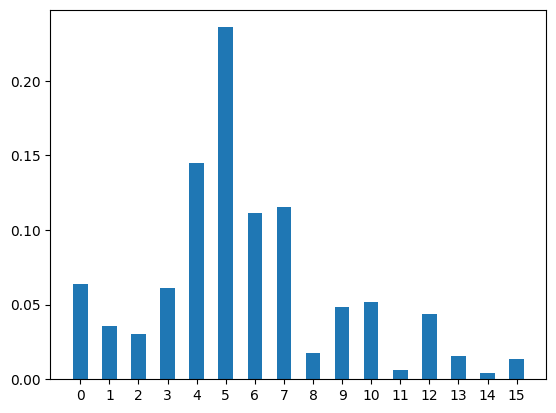



>>> Job ID: cl7qbvp5o5utp9bq6pi0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00574, 9: 0.02219, 11: 0.02127, 1: 0.03264, 10: 0.03596, 15: 0.00923, 2: 0.04349, 0: 0.04878, 3: 0.05937, 7: 0.11285, 8: 0.10686, 12: 0.03718, 5: 0.16291, 4: 0.17612, 6: 0.09619, 13: 0.02922}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00574, 9: 0.02219, 11: 0.02127, 1: 0.03264, 10: 0.03596, 15: 0.00923, 2: 0.04349, 0: 0.04878, 3: 0.05937, 7: 0.11285, 8: 0.10686, 12: 0.03718, 5: 0.16291, 4: 0.17612, 6: 0.09619, 13: 0.02922}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
23
{14: 0.00574, 9: 0.02219, 11: 0.02127, 1: 0.03264, 10: 0.03596, 15: 0.00923, 2: 0.04349, 0: 0.04878, 3: 0.05937, 7: 0.11285, 8: 0.10686, 12: 0.03718, 5: 0.16291, 4: 0.17612, 6: 0.09619, 13: 0.02922}


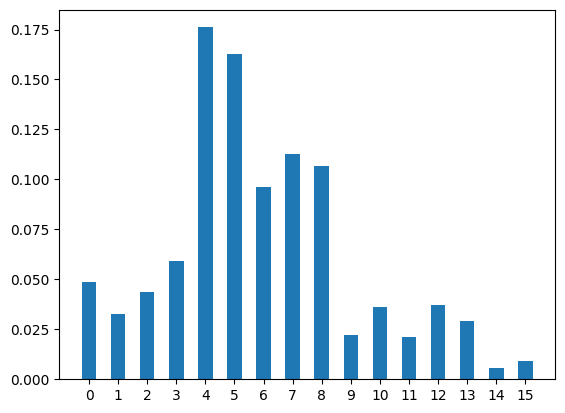



>>> Job ID: cl7qc0t7pau17fl19jrg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00228, 13: 0.04133, 14: 0.0083, 8: 0.09963, 11: 0.05562, 9: 0.03753, 1: 0.07317, 12: 0.02995, 5: 0.12908, 6: 0.06017, 4: 0.15729, 15: 0.00951, 10: 0.10431, 3: 0.00086, 0: 0.00802, 7: 0.18295}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00228, 13: 0.04133, 14: 0.0083, 8: 0.09963, 11: 0.05562, 9: 0.03753, 1: 0.07317, 12: 0.02995, 5: 0.12908, 6: 0.06017, 4: 0.15729, 15: 0.00951, 10: 0.10431, 3: 0.00086, 0: 0.00802, 7: 0.18295}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
24
{2: 0.00228, 13: 0.04133, 14: 0.0083, 8: 0.09963, 11: 0.05562, 9: 0.03753, 1: 0.07317, 12: 0.02995, 5: 0.12908, 6: 0.06017, 4: 0.15729, 15: 0.00951, 10: 0.10431, 3: 0.00086, 0: 0.00802, 7: 0.18295}


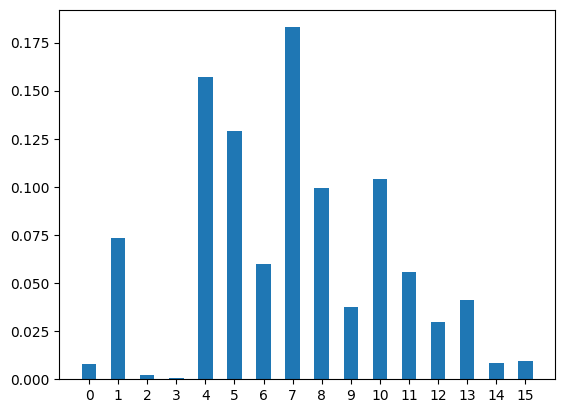



>>> Job ID: cl7qc296mcdhud4e7q3g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00037, 1: 0.00599, 10: 0.00046, 15: 0.01154, 13: 0.05001, 2: 0.07408, 8: 0.08578, 12: 0.02396, 5: 0.17762, 0: 0.008, 7: 0.19078, 3: 0.10467, 9: 0.04827, 11: 0.05519, 6: 0.0762, 4: 0.08708}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00037, 1: 0.00599, 10: 0.00046, 15: 0.01154, 13: 0.05001, 2: 0.07408, 8: 0.08578, 12: 0.02396, 5: 0.17762, 0: 0.008, 7: 0.19078, 3: 0.10467, 9: 0.04827, 11: 0.05519, 6: 0.0762, 4: 0.08708}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
25
{14: 0.00037, 1: 0.00599, 10: 0.00046, 15: 0.01154, 13: 0.05001, 2: 0.07408, 8: 0.08578, 12: 0.02396, 5: 0.17762, 0: 0.008, 7: 0.19078, 3: 0.10467, 9: 0.04827, 11: 0.05519, 6: 0.0762, 4: 0.08708}


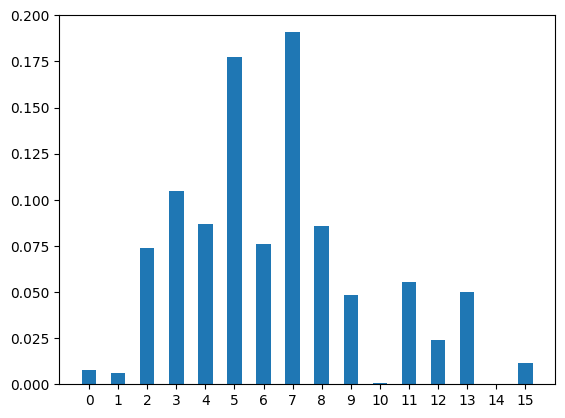



>>> Job ID: cl7qc3h5o5utp9bq6ra0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.02729, 14: 0.04843, 0: 0.001, 3: 0.00817, 7: 0.1343, 1: 0.01169, 6: 0.07307, 4: 0.11799, 9: 0.00809, 13: 0.08814, 11: 0.03347, 8: 0.09886, 12: 0.03722, 5: 0.21621, 15: 0.01051, 10: 0.08556}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.02729, 14: 0.04843, 0: 0.001, 3: 0.00817, 7: 0.1343, 1: 0.01169, 6: 0.07307, 4: 0.11799, 9: 0.00809, 13: 0.08814, 11: 0.03347, 8: 0.09886, 12: 0.03722, 5: 0.21621, 15: 0.01051, 10: 0.08556}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
26
{2: 0.02729, 14: 0.04843, 0: 0.001, 3: 0.00817, 7: 0.1343, 1: 0.01169, 6: 0.07307, 4: 0.11799, 9: 0.00809, 13: 0.08814, 11: 0.03347, 8: 0.09886, 12: 0.03722, 5: 0.21621, 15: 0.01051, 10: 0.08556}


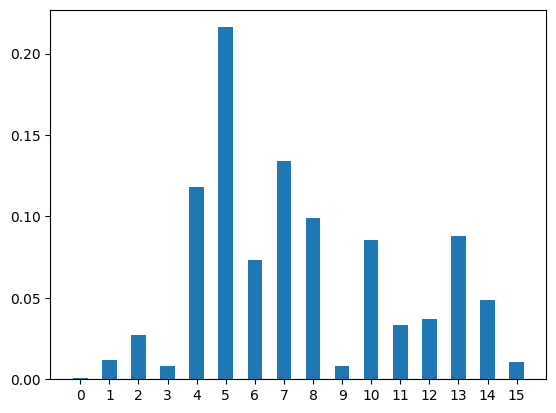



>>> Job ID: cl7qc5p6mcdhud4e7ru0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01309, 2: 0.01972, 8: 0.08919, 13: 0.10542, 12: 0.01612, 5: 0.1903, 6: 0.07467, 4: 0.12439, 11: 0.10139, 3: 0.00118, 7: 0.07134, 0: 0.0037, 14: 0.10909, 9: 0.03829, 10: 0.00914, 15: 0.03297}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01309, 2: 0.01972, 8: 0.08919, 13: 0.10542, 12: 0.01612, 5: 0.1903, 6: 0.07467, 4: 0.12439, 11: 0.10139, 3: 0.00118, 7: 0.07134, 0: 0.0037, 14: 0.10909, 9: 0.03829, 10: 0.00914, 15: 0.03297}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
27
{1: 0.01309, 2: 0.01972, 8: 0.08919, 13: 0.10542, 12: 0.01612, 5: 0.1903, 6: 0.07467, 4: 0.12439, 11: 0.10139, 3: 0.00118, 7: 0.07134, 0: 0.0037, 14: 0.10909, 9: 0.03829, 10: 0.00914, 15: 0.03297}


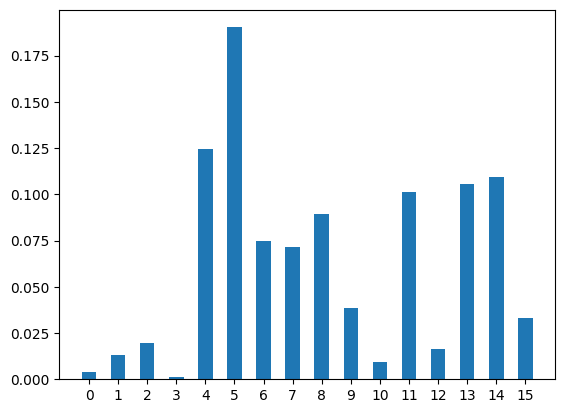



>>> Job ID: cl7qc757pau17fl19mtg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00498, 10: 0.00804, 15: 0.04118, 9: 0.03151, 7: 0.00277, 0: 0.00511, 3: 0.0225, 4: 0.09015, 6: 0.17625, 8: 0.12448, 11: 0.09675, 14: 0.18148, 5: 0.11905, 12: 0.02295, 13: 0.04974, 2: 0.02306}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00498, 10: 0.00804, 15: 0.04118, 9: 0.03151, 7: 0.00277, 0: 0.00511, 3: 0.0225, 4: 0.09015, 6: 0.17625, 8: 0.12448, 11: 0.09675, 14: 0.18148, 5: 0.11905, 12: 0.02295, 13: 0.04974, 2: 0.02306}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
28
{1: 0.00498, 10: 0.00804, 15: 0.04118, 9: 0.03151, 7: 0.00277, 0: 0.00511, 3: 0.0225, 4: 0.09015, 6: 0.17625, 8: 0.12448, 11: 0.09675, 14: 0.18148, 5: 0.11905, 12: 0.02295, 13: 0.04974, 2: 0.02306}


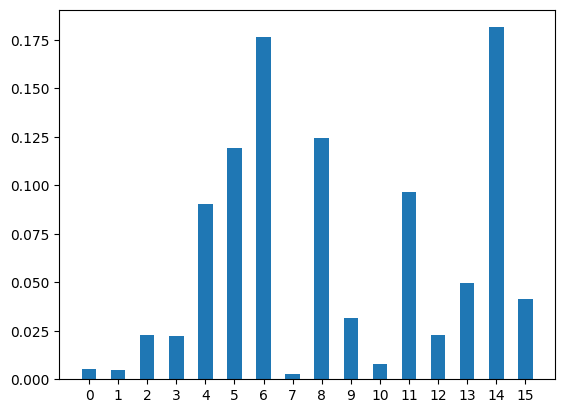



>>> Job ID: cl7qc857pau17fl19ncg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 3e-05, 13: 0.00339, 1: 0.0095, 11: 0.0249, 9: 0.02449, 12: 0.07512, 5: 0.16963, 4: 0.04228, 6: 0.1776, 10: 0.03768, 15: 0.03937, 14: 0.22906, 7: 0.0012, 0: 0.0026, 3: 0.03458, 8: 0.12857}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 3e-05, 13: 0.00339, 1: 0.0095, 11: 0.0249, 9: 0.02449, 12: 0.07512, 5: 0.16963, 4: 0.04228, 6: 0.1776, 10: 0.03768, 15: 0.03937, 14: 0.22906, 7: 0.0012, 0: 0.0026, 3: 0.03458, 8: 0.12857}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
29
{2: 3e-05, 13: 0.00339, 1: 0.0095, 11: 0.0249, 9: 0.02449, 12: 0.07512, 5: 0.16963, 4: 0.04228, 6: 0.1776, 10: 0.03768, 15: 0.03937, 14: 0.22906, 7: 0.0012, 0: 0.0026, 3: 0.03458, 8: 0.12857}


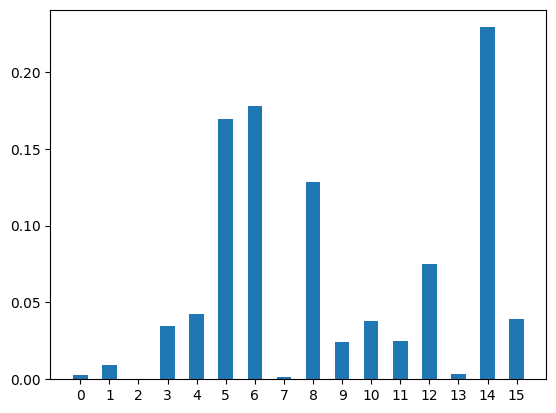



>>> Job ID: cl7qc9dfa6vtjv8rmip0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00156, 11: 0.00384, 2: 0.00985, 9: 0.04334, 15: 0.03422, 10: 0.02829, 4: 0.01017, 6: 0.12656, 12: 0.05669, 5: 0.20033, 8: 0.08408, 14: 0.21008, 0: 0.02488, 7: 0.06026, 3: 0.0428, 13: 0.06305}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00156, 11: 0.00384, 2: 0.00985, 9: 0.04334, 15: 0.03422, 10: 0.02829, 4: 0.01017, 6: 0.12656, 12: 0.05669, 5: 0.20033, 8: 0.08408, 14: 0.21008, 0: 0.02488, 7: 0.06026, 3: 0.0428, 13: 0.06305}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
30
{1: 0.00156, 11: 0.00384, 2: 0.00985, 9: 0.04334, 15: 0.03422, 10: 0.02829, 4: 0.01017, 6: 0.12656, 12: 0.05669, 5: 0.20033, 8: 0.08408, 14: 0.21008, 0: 0.02488, 7: 0.06026, 3: 0.0428, 13: 0.06305}


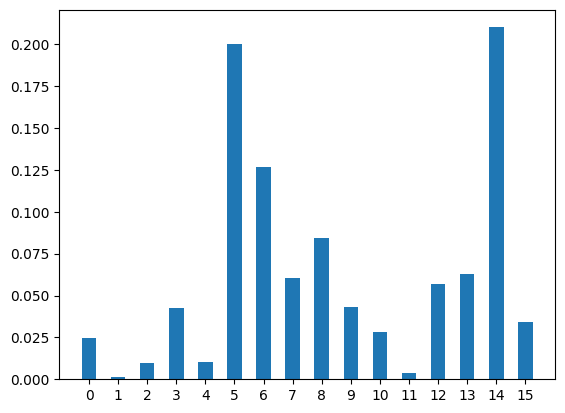



>>> Job ID: cl7qcanl4q34kqgk72n0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00362, 2: 0.0057, 1: 0.00869, 14: 0.15407, 13: 0.06133, 11: 0.0134, 10: 0.01067, 15: 0.11333, 3: 0.04893, 0: 0.05242, 7: 0.06235, 8: 0.06926, 12: 0.05911, 5: 0.18818, 4: 0.0372, 6: 0.11174}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00362, 2: 0.0057, 1: 0.00869, 14: 0.15407, 13: 0.06133, 11: 0.0134, 10: 0.01067, 15: 0.11333, 3: 0.04893, 0: 0.05242, 7: 0.06235, 8: 0.06926, 12: 0.05911, 5: 0.18818, 4: 0.0372, 6: 0.11174}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
31
{9: 0.00362, 2: 0.0057, 1: 0.00869, 14: 0.15407, 13: 0.06133, 11: 0.0134, 10: 0.01067, 15: 0.11333, 3: 0.04893, 0: 0.05242, 7: 0.06235, 8: 0.06926, 12: 0.05911, 5: 0.18818, 4: 0.0372, 6: 0.11174}


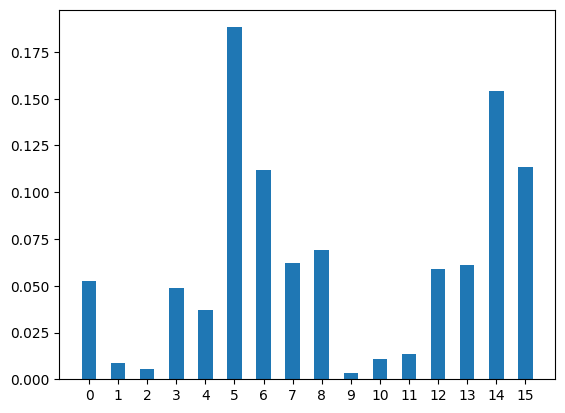



>>> Job ID: cl7qcbt7pau17fl19oh0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00036, 2: 0.00294, 14: 0.00885, 9: 0.06972, 11: 0.01028, 1: 0.00877, 15: 0.21496, 10: 0.05063, 8: 0.07164, 12: 0.04473, 5: 0.15542, 3: 0.01445, 7: 0.0725, 0: 0.10329, 6: 0.15177, 4: 0.01969}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00036, 2: 0.00294, 14: 0.00885, 9: 0.06972, 11: 0.01028, 1: 0.00877, 15: 0.21496, 10: 0.05063, 8: 0.07164, 12: 0.04473, 5: 0.15542, 3: 0.01445, 7: 0.0725, 0: 0.10329, 6: 0.15177, 4: 0.01969}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
32
{13: 0.00036, 2: 0.00294, 14: 0.00885, 9: 0.06972, 11: 0.01028, 1: 0.00877, 15: 0.21496, 10: 0.05063, 8: 0.07164, 12: 0.04473, 5: 0.15542, 3: 0.01445, 7: 0.0725, 0: 0.10329, 6: 0.15177, 4: 0.01969}


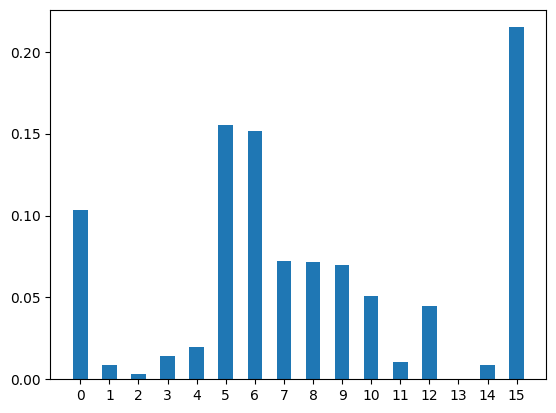



>>> Job ID: cl7qcdf75e3r3c6dlfl0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00089, 2: 0.00094, 9: 0.03524, 12: 0.0154, 5: 0.04392, 3: 0.07439, 7: 0.06472, 0: 0.1135, 10: 0.00376, 15: 0.21237, 13: 0.03373, 4: 0.01842, 6: 0.27484, 11: 0.04671, 8: 0.05267, 1: 0.0085}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00089, 2: 0.00094, 9: 0.03524, 12: 0.0154, 5: 0.04392, 3: 0.07439, 7: 0.06472, 0: 0.1135, 10: 0.00376, 15: 0.21237, 13: 0.03373, 4: 0.01842, 6: 0.27484, 11: 0.04671, 8: 0.05267, 1: 0.0085}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
33
{14: 0.00089, 2: 0.00094, 9: 0.03524, 12: 0.0154, 5: 0.04392, 3: 0.07439, 7: 0.06472, 0: 0.1135, 10: 0.00376, 15: 0.21237, 13: 0.03373, 4: 0.01842, 6: 0.27484, 11: 0.04671, 8: 0.05267, 1: 0.0085}


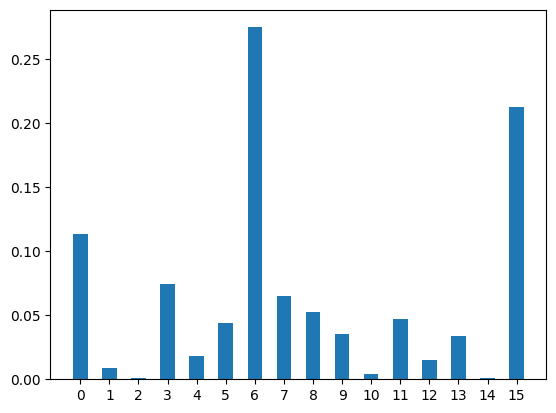



>>> Job ID: cl7qcenl4q34kqgk7440
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00358, 8: 0.02315, 11: 0.04301, 1: 0.02847, 9: 0.03101, 13: 0.06302, 3: 0.0205, 7: 0.04926, 0: 0.15503, 4: 0.07965, 6: 0.27463, 14: 0.00452, 10: 0.01155, 15: 0.14618, 12: 0.02233, 5: 0.04411}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00358, 8: 0.02315, 11: 0.04301, 1: 0.02847, 9: 0.03101, 13: 0.06302, 3: 0.0205, 7: 0.04926, 0: 0.15503, 4: 0.07965, 6: 0.27463, 14: 0.00452, 10: 0.01155, 15: 0.14618, 12: 0.02233, 5: 0.04411}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
34
{2: 0.00358, 8: 0.02315, 11: 0.04301, 1: 0.02847, 9: 0.03101, 13: 0.06302, 3: 0.0205, 7: 0.04926, 0: 0.15503, 4: 0.07965, 6: 0.27463, 14: 0.00452, 10: 0.01155, 15: 0.14618, 12: 0.02233, 5: 0.04411}


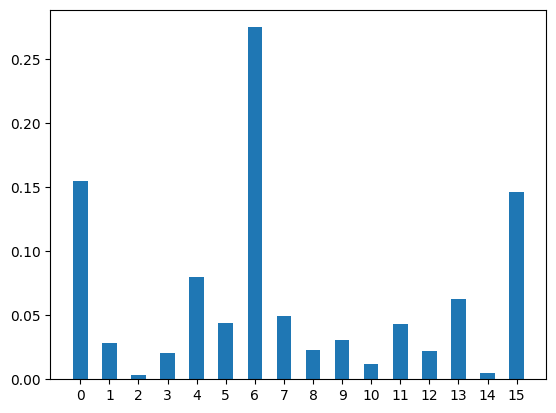



>>> Job ID: cl7qcfl7pau17fl19q50
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{12: 0.01078, 5: 0.02263, 9: 0.02633, 10: 0.01294, 15: 0.06161, 2: 0.02724, 13: 0.03168, 1: 0.15617, 11: 0.04345, 4: 0.07868, 6: 0.1811, 14: 0.06082, 3: 0.02343, 0: 0.08728, 7: 0.15298, 8: 0.02288}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {12: 0.01078, 5: 0.02263, 9: 0.02633, 10: 0.01294, 15: 0.06161, 2: 0.02724, 13: 0.03168, 1: 0.15617, 11: 0.04345, 4: 0.07868, 6: 0.1811, 14: 0.06082, 3: 0.02343, 0: 0.08728, 7: 0.15298, 8: 0.02288}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
35
{12: 0.01078, 5: 0.02263, 9: 0.02633, 10: 0.01294, 15: 0.06161, 2: 0.02724, 13: 0.03168, 1: 0.15617, 11: 0.04345, 4: 0.07868, 6: 0.1811, 14: 0.06082, 3: 0.02343, 0: 0.08728, 7: 0.15298, 8: 0.02288}


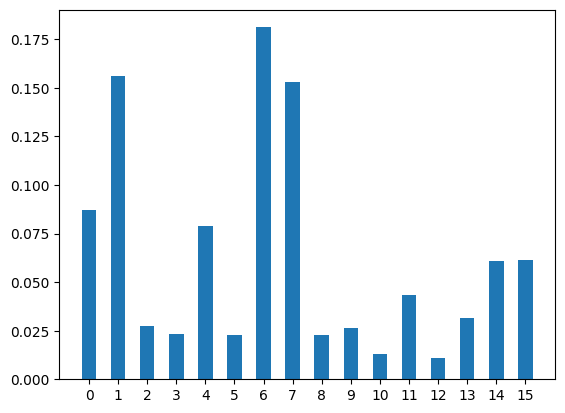



>>> Job ID: cl7qchfl4q34kqgk7580
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00912, 2: 0.07526, 10: 0.02364, 15: 0.06062, 8: 0.0329, 0: 0.05681, 3: 0.02525, 7: 0.15984, 1: 0.15581, 9: 0.03389, 5: 0.01656, 12: 0.04585, 14: 0.04419, 4: 0.06739, 6: 0.17908, 11: 0.01379}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00912, 2: 0.07526, 10: 0.02364, 15: 0.06062, 8: 0.0329, 0: 0.05681, 3: 0.02525, 7: 0.15984, 1: 0.15581, 9: 0.03389, 5: 0.01656, 12: 0.04585, 14: 0.04419, 4: 0.06739, 6: 0.17908, 11: 0.01379}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
36
{13: 0.00912, 2: 0.07526, 10: 0.02364, 15: 0.06062, 8: 0.0329, 0: 0.05681, 3: 0.02525, 7: 0.15984, 1: 0.15581, 9: 0.03389, 5: 0.01656, 12: 0.04585, 14: 0.04419, 4: 0.06739, 6: 0.17908, 11: 0.01379}


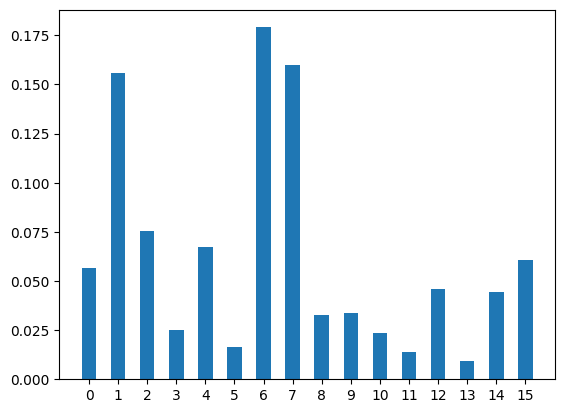



>>> Job ID: cl7qcilfa6vtjv8rmmg0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.02106, 11: 0.02329, 5: 0.02977, 12: 0.05186, 1: 0.15221, 14: 0.03649, 13: 0.05917, 9: 0.00644, 2: 0.07687, 10: 0.02496, 15: 0.07312, 6: 0.15392, 4: 0.05302, 3: 0.00929, 0: 0.05938, 7: 0.16915}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.02106, 11: 0.02329, 5: 0.02977, 12: 0.05186, 1: 0.15221, 14: 0.03649, 13: 0.05917, 9: 0.00644, 2: 0.07687, 10: 0.02496, 15: 0.07312, 6: 0.15392, 4: 0.05302, 3: 0.00929, 0: 0.05938, 7: 0.16915}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
37
{8: 0.02106, 11: 0.02329, 5: 0.02977, 12: 0.05186, 1: 0.15221, 14: 0.03649, 13: 0.05917, 9: 0.00644, 2: 0.07687, 10: 0.02496, 15: 0.07312, 6: 0.15392, 4: 0.05302, 3: 0.00929, 0: 0.05938, 7: 0.16915}


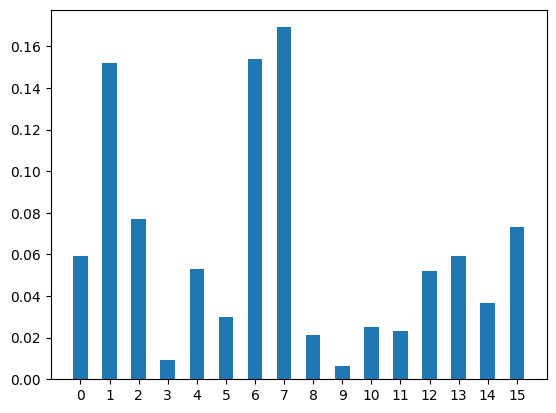



>>> Job ID: cl7qcjt7pau17fl19rqg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00396, 11: 0.03656, 8: 0.02943, 4: 0.04426, 6: 0.0479, 1: 0.08246, 13: 0.01564, 10: 0.06525, 15: 0.00873, 3: 0.00581, 7: 0.25362, 0: 0.10878, 2: 0.10678, 12: 0.05611, 5: 0.03997, 14: 0.09474}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00396, 11: 0.03656, 8: 0.02943, 4: 0.04426, 6: 0.0479, 1: 0.08246, 13: 0.01564, 10: 0.06525, 15: 0.00873, 3: 0.00581, 7: 0.25362, 0: 0.10878, 2: 0.10678, 12: 0.05611, 5: 0.03997, 14: 0.09474}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
38
{9: 0.00396, 11: 0.03656, 8: 0.02943, 4: 0.04426, 6: 0.0479, 1: 0.08246, 13: 0.01564, 10: 0.06525, 15: 0.00873, 3: 0.00581, 7: 0.25362, 0: 0.10878, 2: 0.10678, 12: 0.05611, 5: 0.03997, 14: 0.09474}


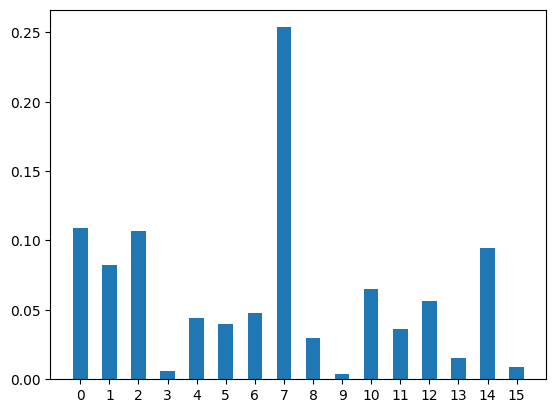



>>> Job ID: cl7qcn16mcdhud4e82mg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0097, 13: 0.00325, 14: 0.00277, 11: 0.04637, 9: 0.02358, 6: 0.0217, 4: 0.03388, 12: 0.04781, 5: 0.05672, 8: 0.03241, 2: 0.08482, 3: 0.05515, 7: 0.27916, 0: 0.11514, 10: 0.09569, 15: 0.09185}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0097, 13: 0.00325, 14: 0.00277, 11: 0.04637, 9: 0.02358, 6: 0.0217, 4: 0.03388, 12: 0.04781, 5: 0.05672, 8: 0.03241, 2: 0.08482, 3: 0.05515, 7: 0.27916, 0: 0.11514, 10: 0.09569, 15: 0.09185}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
39
{1: 0.0097, 13: 0.00325, 14: 0.00277, 11: 0.04637, 9: 0.02358, 6: 0.0217, 4: 0.03388, 12: 0.04781, 5: 0.05672, 8: 0.03241, 2: 0.08482, 3: 0.05515, 7: 0.27916, 0: 0.11514, 10: 0.09569, 15: 0.09185}


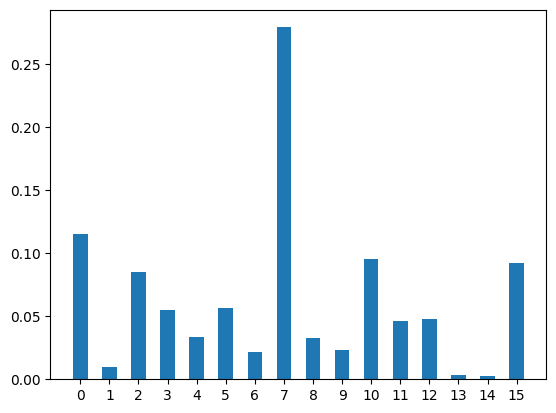



>>> Job ID: cl7qcov75e3r3c6dlk40
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00251, 13: 0.00829, 1: 0.0342, 11: 0.04991, 9: 0.02133, 12: 0.06831, 5: 0.08066, 8: 0.07822, 4: 0.02453, 6: 0.01962, 2: 0.07599, 10: 0.04915, 15: 0.04206, 0: 0.14111, 3: 0.07237, 7: 0.23174}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00251, 13: 0.00829, 1: 0.0342, 11: 0.04991, 9: 0.02133, 12: 0.06831, 5: 0.08066, 8: 0.07822, 4: 0.02453, 6: 0.01962, 2: 0.07599, 10: 0.04915, 15: 0.04206, 0: 0.14111, 3: 0.07237, 7: 0.23174}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
40
{14: 0.00251, 13: 0.00829, 1: 0.0342, 11: 0.04991, 9: 0.02133, 12: 0.06831, 5: 0.08066, 8: 0.07822, 4: 0.02453, 6: 0.01962, 2: 0.07599, 10: 0.04915, 15: 0.04206, 0: 0.14111, 3: 0.07237, 7: 0.23174}


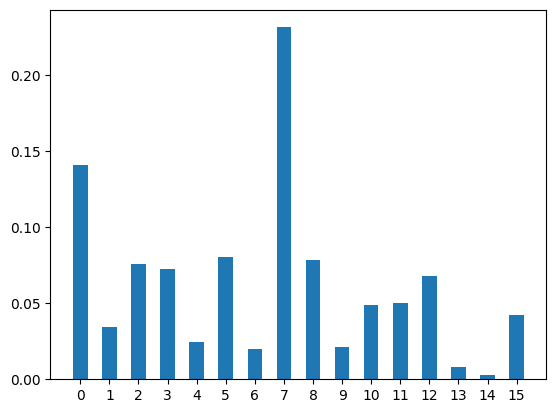



>>> Job ID: cl7qcqlfa6vtjv8rmq5g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.00593, 6: 0.01808, 11: 0.01403, 14: 0.0069, 1: 0.005, 13: 0.01726, 5: 0.09905, 12: 0.03919, 15: 0.013, 10: 0.09641, 3: 0.05586, 7: 0.152, 0: 0.1704, 2: 0.0778, 8: 0.15726, 9: 0.07183}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.00593, 6: 0.01808, 11: 0.01403, 14: 0.0069, 1: 0.005, 13: 0.01726, 5: 0.09905, 12: 0.03919, 15: 0.013, 10: 0.09641, 3: 0.05586, 7: 0.152, 0: 0.1704, 2: 0.0778, 8: 0.15726, 9: 0.07183}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
41
{4: 0.00593, 6: 0.01808, 11: 0.01403, 14: 0.0069, 1: 0.005, 13: 0.01726, 5: 0.09905, 12: 0.03919, 15: 0.013, 10: 0.09641, 3: 0.05586, 7: 0.152, 0: 0.1704, 2: 0.0778, 8: 0.15726, 9: 0.07183}


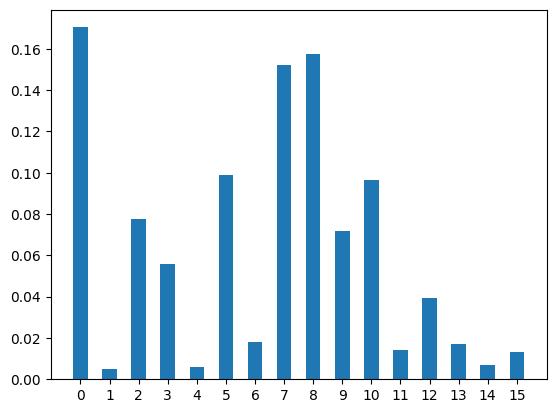



>>> Job ID: cl7qcs7l4q34kqgk79p0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.01408, 6: 0.02375, 15: 0.00881, 10: 0.04594, 2: 0.07657, 1: 0.15485, 13: 0.04909, 8: 0.21238, 12: 0.03834, 5: 0.08967, 0: 0.03101, 3: 0.02624, 7: 0.1023, 14: 0.01611, 11: 0.09514, 9: 0.01572}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.01408, 6: 0.02375, 15: 0.00881, 10: 0.04594, 2: 0.07657, 1: 0.15485, 13: 0.04909, 8: 0.21238, 12: 0.03834, 5: 0.08967, 0: 0.03101, 3: 0.02624, 7: 0.1023, 14: 0.01611, 11: 0.09514, 9: 0.01572}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
42
{4: 0.01408, 6: 0.02375, 15: 0.00881, 10: 0.04594, 2: 0.07657, 1: 0.15485, 13: 0.04909, 8: 0.21238, 12: 0.03834, 5: 0.08967, 0: 0.03101, 3: 0.02624, 7: 0.1023, 14: 0.01611, 11: 0.09514, 9: 0.01572}


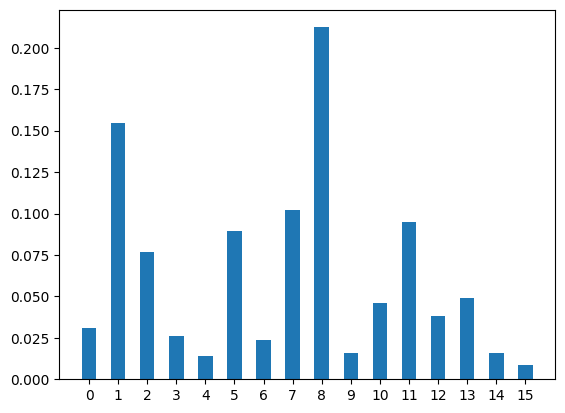



>>> Job ID: cl7qcttfa6vtjv8rmrh0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.03108, 2: 0.08742, 15: 0.01924, 10: 0.06345, 4: 0.01708, 6: 0.07148, 11: 0.06292, 1: 0.136, 8: 0.23013, 12: 0.05993, 5: 0.0447, 9: 0.05814, 13: 0.02629, 0: 0.001, 3: 0.02121, 7: 0.06993}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.03108, 2: 0.08742, 15: 0.01924, 10: 0.06345, 4: 0.01708, 6: 0.07148, 11: 0.06292, 1: 0.136, 8: 0.23013, 12: 0.05993, 5: 0.0447, 9: 0.05814, 13: 0.02629, 0: 0.001, 3: 0.02121, 7: 0.06993}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
43
{14: 0.03108, 2: 0.08742, 15: 0.01924, 10: 0.06345, 4: 0.01708, 6: 0.07148, 11: 0.06292, 1: 0.136, 8: 0.23013, 12: 0.05993, 5: 0.0447, 9: 0.05814, 13: 0.02629, 0: 0.001, 3: 0.02121, 7: 0.06993}


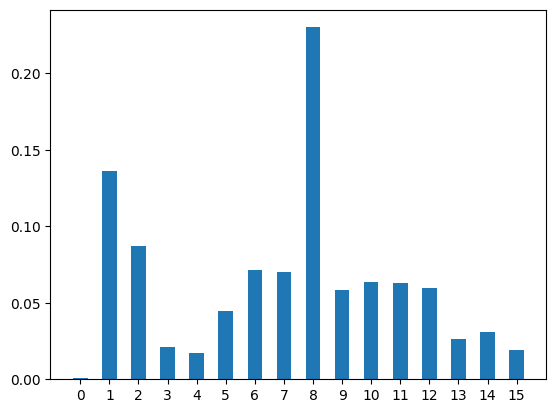



>>> Job ID: cl7qcvdfa6vtjv8rms50
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{12: 0.02255, 5: 0.03934, 14: 0.02578, 2: 0.09947, 13: 0.03657, 10: 0.01784, 15: 0.00515, 4: 0.00484, 6: 0.08908, 7: 0.04087, 3: 0.05814, 0: 0.01974, 1: 0.12369, 8: 0.22709, 11: 0.12586, 9: 0.06399}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {12: 0.02255, 5: 0.03934, 14: 0.02578, 2: 0.09947, 13: 0.03657, 10: 0.01784, 15: 0.00515, 4: 0.00484, 6: 0.08908, 7: 0.04087, 3: 0.05814, 0: 0.01974, 1: 0.12369, 8: 0.22709, 11: 0.12586, 9: 0.06399}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
44
{12: 0.02255, 5: 0.03934, 14: 0.02578, 2: 0.09947, 13: 0.03657, 10: 0.01784, 15: 0.00515, 4: 0.00484, 6: 0.08908, 7: 0.04087, 3: 0.05814, 0: 0.01974, 1: 0.12369, 8: 0.22709, 11: 0.12586, 9: 0.06399}


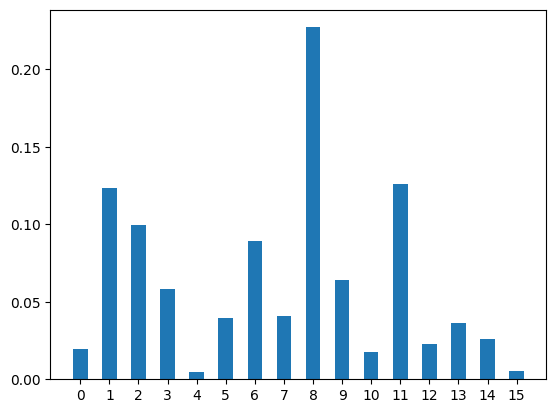



>>> Job ID: cl7qd0p5o5utp9bq76kg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.02738, 6: 0.11822, 5: 0.00073, 12: 0.00861, 2: 0.07958, 9: 0.02553, 13: 0.03516, 15: 0.01743, 10: 0.11707, 0: 0.00641, 7: 0.01892, 3: 0.07694, 14: 0.03644, 1: 0.07583, 8: 0.22429, 11: 0.13146}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.02738, 6: 0.11822, 5: 0.00073, 12: 0.00861, 2: 0.07958, 9: 0.02553, 13: 0.03516, 15: 0.01743, 10: 0.11707, 0: 0.00641, 7: 0.01892, 3: 0.07694, 14: 0.03644, 1: 0.07583, 8: 0.22429, 11: 0.13146}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
45
{4: 0.02738, 6: 0.11822, 5: 0.00073, 12: 0.00861, 2: 0.07958, 9: 0.02553, 13: 0.03516, 15: 0.01743, 10: 0.11707, 0: 0.00641, 7: 0.01892, 3: 0.07694, 14: 0.03644, 1: 0.07583, 8: 0.22429, 11: 0.13146}


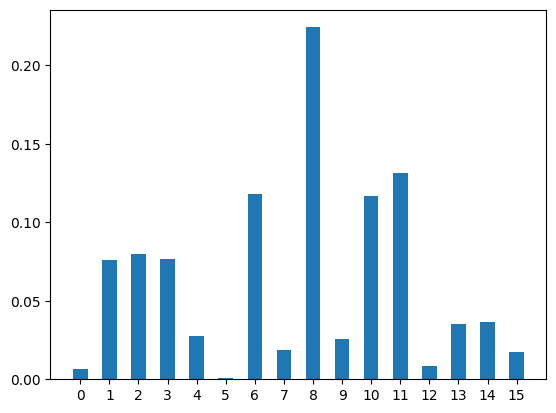



>>> Job ID: cl7qd25fa6vtjv8rmt8g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01792, 2: 0.01501, 14: 0.02315, 5: 0.00313, 12: 0.04274, 13: 0.05991, 1: 0.07079, 8: 0.18356, 11: 0.09965, 6: 0.11603, 4: 0.08985, 7: 0.02268, 0: 0.02206, 3: 0.11282, 10: 0.0846, 15: 0.0361}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01792, 2: 0.01501, 14: 0.02315, 5: 0.00313, 12: 0.04274, 13: 0.05991, 1: 0.07079, 8: 0.18356, 11: 0.09965, 6: 0.11603, 4: 0.08985, 7: 0.02268, 0: 0.02206, 3: 0.11282, 10: 0.0846, 15: 0.0361}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
46
{9: 0.01792, 2: 0.01501, 14: 0.02315, 5: 0.00313, 12: 0.04274, 13: 0.05991, 1: 0.07079, 8: 0.18356, 11: 0.09965, 6: 0.11603, 4: 0.08985, 7: 0.02268, 0: 0.02206, 3: 0.11282, 10: 0.0846, 15: 0.0361}


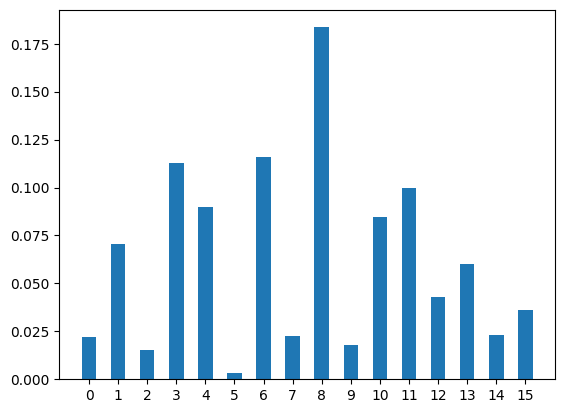



>>> Job ID: cl7qd3tfa6vtjv8rmu6g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0487, 14: 0.01574, 13: 0.10147, 11: 0.08358, 2: 0.05551, 15: 0.03225, 10: 0.05568, 9: 0.09543, 5: 0.00821, 12: 0.03814, 8: 0.10199, 4: 0.14458, 6: 0.06206, 0: 0.01192, 7: 0.07482, 3: 0.06992}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0487, 14: 0.01574, 13: 0.10147, 11: 0.08358, 2: 0.05551, 15: 0.03225, 10: 0.05568, 9: 0.09543, 5: 0.00821, 12: 0.03814, 8: 0.10199, 4: 0.14458, 6: 0.06206, 0: 0.01192, 7: 0.07482, 3: 0.06992}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
47
{1: 0.0487, 14: 0.01574, 13: 0.10147, 11: 0.08358, 2: 0.05551, 15: 0.03225, 10: 0.05568, 9: 0.09543, 5: 0.00821, 12: 0.03814, 8: 0.10199, 4: 0.14458, 6: 0.06206, 0: 0.01192, 7: 0.07482, 3: 0.06992}


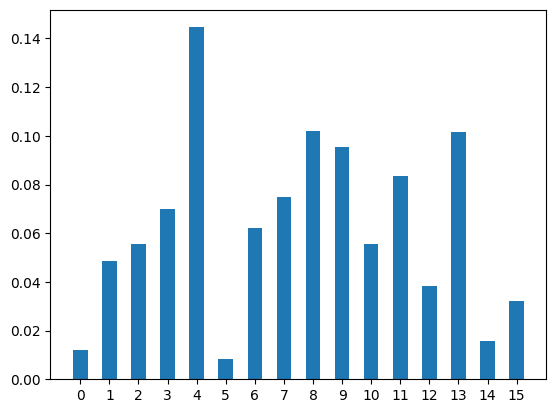



>>> Job ID: cl7qd5lfa6vtjv8rmusg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00279, 14: 0.0232, 2: 0.10094, 9: 0.09229, 10: 0.04715, 15: 0.03523, 11: 0.09992, 8: 0.07297, 13: 0.12682, 12: 0.04578, 5: 0.14628, 3: 0.03194, 0: 0.0118, 7: 0.10805, 6: 0.02642, 4: 0.02842}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00279, 14: 0.0232, 2: 0.10094, 9: 0.09229, 10: 0.04715, 15: 0.03523, 11: 0.09992, 8: 0.07297, 13: 0.12682, 12: 0.04578, 5: 0.14628, 3: 0.03194, 0: 0.0118, 7: 0.10805, 6: 0.02642, 4: 0.02842}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
48
{1: 0.00279, 14: 0.0232, 2: 0.10094, 9: 0.09229, 10: 0.04715, 15: 0.03523, 11: 0.09992, 8: 0.07297, 13: 0.12682, 12: 0.04578, 5: 0.14628, 3: 0.03194, 0: 0.0118, 7: 0.10805, 6: 0.02642, 4: 0.02842}


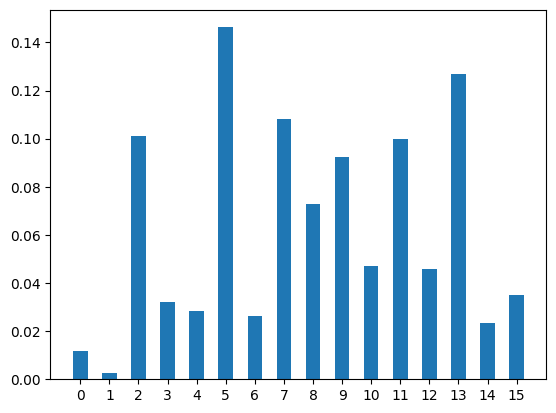



>>> Job ID: cl7qd7tfa6vtjv8rn060
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01211, 8: 0.02188, 11: 0.01717, 15: 0.00481, 10: 0.02287, 2: 0.10305, 14: 0.0308, 13: 0.11544, 5: 0.061, 12: 0.1347, 9: 0.1219, 0: 0.03229, 3: 0.0653, 7: 0.12033, 6: 0.11991, 4: 0.01644}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01211, 8: 0.02188, 11: 0.01717, 15: 0.00481, 10: 0.02287, 2: 0.10305, 14: 0.0308, 13: 0.11544, 5: 0.061, 12: 0.1347, 9: 0.1219, 0: 0.03229, 3: 0.0653, 7: 0.12033, 6: 0.11991, 4: 0.01644}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
49
{1: 0.01211, 8: 0.02188, 11: 0.01717, 15: 0.00481, 10: 0.02287, 2: 0.10305, 14: 0.0308, 13: 0.11544, 5: 0.061, 12: 0.1347, 9: 0.1219, 0: 0.03229, 3: 0.0653, 7: 0.12033, 6: 0.11991, 4: 0.01644}


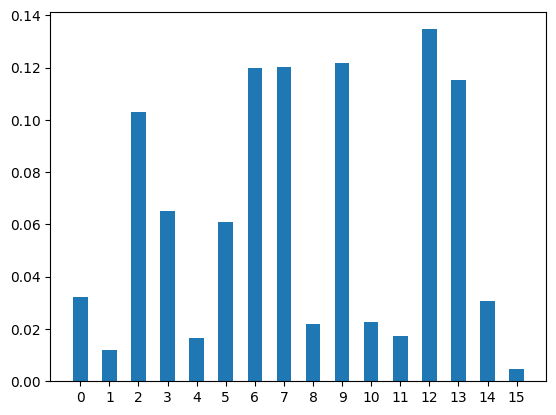

In [82]:
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

    qc1 = QuantumCircuit(2)
    qc1.swap(0,1)
    CSwapgate = qc1.to_gate().control(2)

    circuit.x(p2)
    circuit.append(CSwapgate, [p1,p2,p0,p3])
    circuit.x(p2)
    circuit.x(p1)
    circuit.append(C3XGate(), [p0,p1,p3,p2])
    circuit.x(p1)

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  job = sampler.run(circuit, shots=100000)
  print(f">>> Job ID: {job.job_id()}")
  print(f">>> Job Status: {job.status()}")

  result = job.result()
  print(f">>> {result}")
  print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
  print(f"  > Metadata: {result.metadata[0]}")

  print(N)
  cnts = dict(result.quasi_dists[0])
  print(cnts)

  board = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  prob = []
  for i in range(16):
    prob.append(cnts.get(i, 0))

  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()